# Error analysis on Swap Test circuits
$\textit{by Adriano Mauricio Lusso}$

$\textit{contact email: lussoadriano@gmail.com}$

## Abstract

The objective of this notebook is making an error analysis of different Swap Tests applied in different quantum states: 

1st states to compare: $ \begin{bmatrix} 
\sqrt{0.3}  \\
\sqrt{0.7} \\
\end{bmatrix} $ ,
$ \begin{bmatrix} 
\sqrt{0.6}  \\
\sqrt{0.4} \\
\end{bmatrix} $

2nd states to compare: $\begin{bmatrix} 
\sqrt{0.1}  \\
\sqrt{0.2} \\
\sqrt{0.6} \\
\sqrt{0.1} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0 \\
\sqrt{0.5} \\
\sqrt{0.1} \\
\sqrt{0.4} \\
\end{bmatrix} $

3rd states to compare: $ \begin{bmatrix} 
\sqrt{0.01}  \\
\sqrt{0.10} \\
\sqrt{0.12} \\
\sqrt{0.13} \\
\sqrt{0.04} \\
0 \\
\sqrt{0.35} \\
\sqrt{0.25} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0  \\
\sqrt{0.2} \\
\sqrt{0.2} \\
\sqrt{0.1} \\
\sqrt{0.2} \\
\sqrt{0.05} \\
\sqrt{0.05} \\
\sqrt{0.2}
\end{bmatrix} $

For each pair of states, we are going to introduce a depolarization error from 0 up to 0.5 in three different ways:

1. Error in 1 qubit gates.
2. Error in 2 qubit gates.

This will result in a total of 6 experiments. We will then make some final comparisons with the different parameters observed in each experiment, to finish drawing conclusions on how to ,possibly, improve error mitigation in a swapping test circuit.

## 1.   Imports and common functions

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister,transpile
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram
from math import sqrt
import matplotlib.pyplot as plt
from PIL import Image


# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

In [2]:
def get_swap_test(numQubits,state1,state2):
    """
    This function returns a personalized Swap Gate circuit for comparing 2 different states of N qubits each one.
    
    Parameters:
    numQubits: the number N of qubits per state.
    state1: a list of amplitudes of the state 1 to compare.
    state2: a list of amplitudes of the state 2 to compare.
    """
    
    #registers
    result= QuantumRegister(1,'result')
    elem1 = QuantumRegister(numQubits,'elem1')
    elem2=  QuantumRegister(numQubits,'elem2')
    cr = ClassicalRegister(1)

    #initializing the circuit
    swap_test = QuantumCircuit(result,elem1,elem2,cr)
    swap_test.initialize(state1,elem1)
    swap_test.initialize(state2,elem2)
    
    #anexing the gates
    swap_test.h(0)
    
    for i in range(numQubits):
        swap_test.cswap(0,elem1[i],elem2[i])
    swap_test.h(0)
    swap_test.measure(result,cr)
    
    #display(swap_test.draw('mpl'))
    return swap_test

In [3]:
def add_depolarization_error(noiseModel,depParam,numQubits,gates):
    #create a depolarization error channel for N qubit
    error = depolarizing_error(depParam,numQubits)
    print(error)
    
    noiseModel.add_all_qubit_quantum_error(error,gates)
    return noiseModel
    
#noise_model = NoiseModel()
#noise_model = add_depolarization_error(noise_model,0.5,1,['h'])
#print(noise_model)

In [4]:
#GLOBAL VARIABLES
#Consider that, if maxErrorRate is 51 it represents 0.51. If maxErrorRate is 7, it represents 0.07.
#Remember that if maxError is 51, the for iteration will be from 0 to 50 (for upper limit is exclude from the iterations)
maxErrorRate = 51
shots=10000
one_qubit_gates_list=[]
two_qubits_gates_list=[]

## 2.   Running Swap Tests with real hardware

Before proceeding to the experiments, we will show the results of running the three swap tests on a IBM quantum system. The circuits were run on ibm_brisbane hardware.

### 2.1.   Swap test in real hardware with 1st pair of states

The states to compare are
 $ \begin{bmatrix} 
\sqrt{0.3}  \\
\sqrt{0.7} \\
\end{bmatrix} $ ,
$ \begin{bmatrix} 
\sqrt{0.6}  \\
\sqrt{0.4} \\
\end{bmatrix} $. Each one with 1 qubit.

Output:


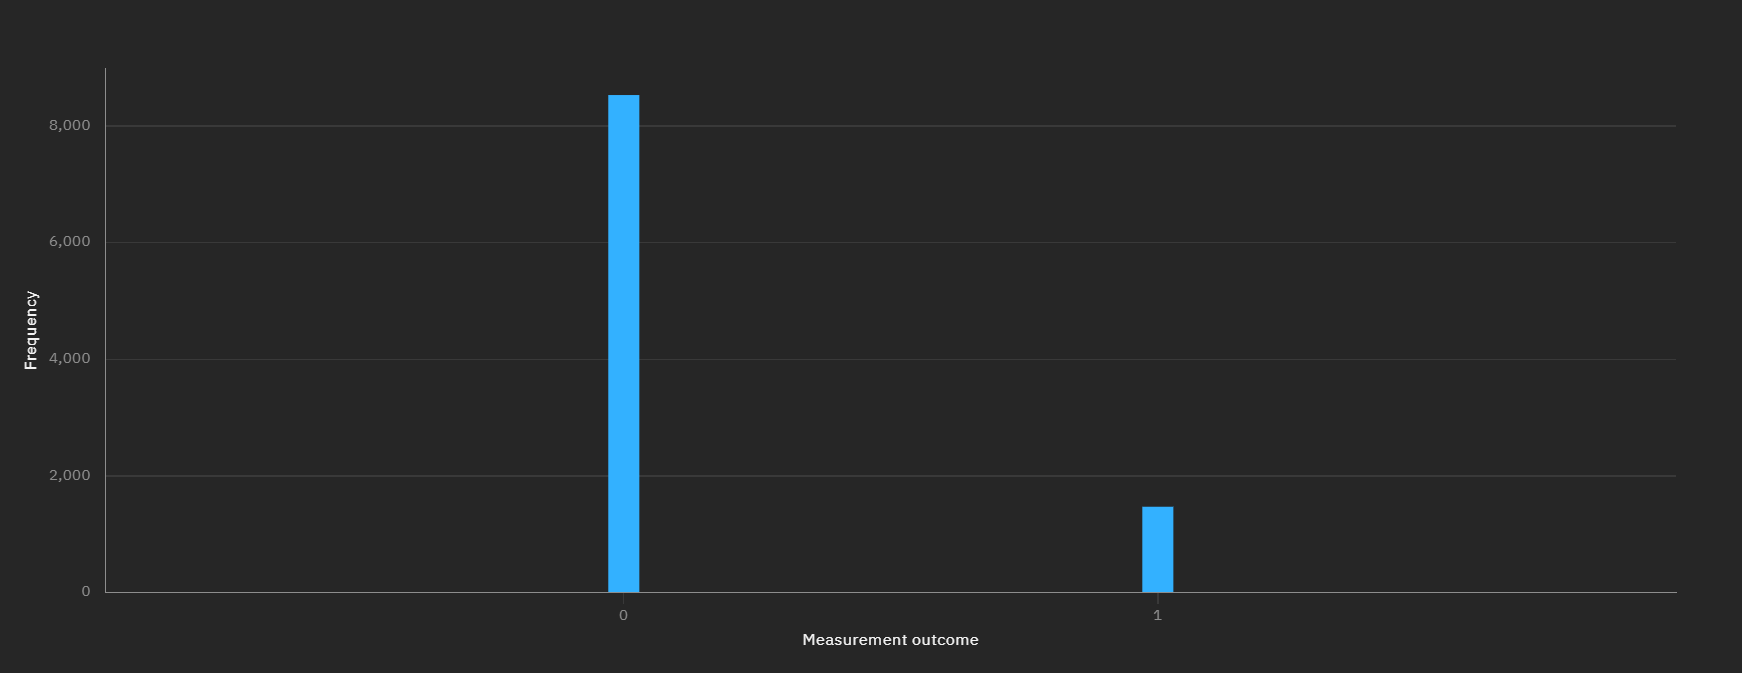

In [5]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QOSF\first_states_pair_histogram.png')
print('Output:')
display(img)

### 2.2   Swap test in real hardware with 2nd pair of states

The states to compare are $\begin{bmatrix} 
\sqrt{0.1}  \\
\sqrt{0.2} \\
\sqrt{0.6} \\
\sqrt{0.1} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0 \\
\sqrt{0.5} \\
\sqrt{0.1} \\
\sqrt{0.4} \\
\end{bmatrix} $ . Each one of 2 qubits.

Output:


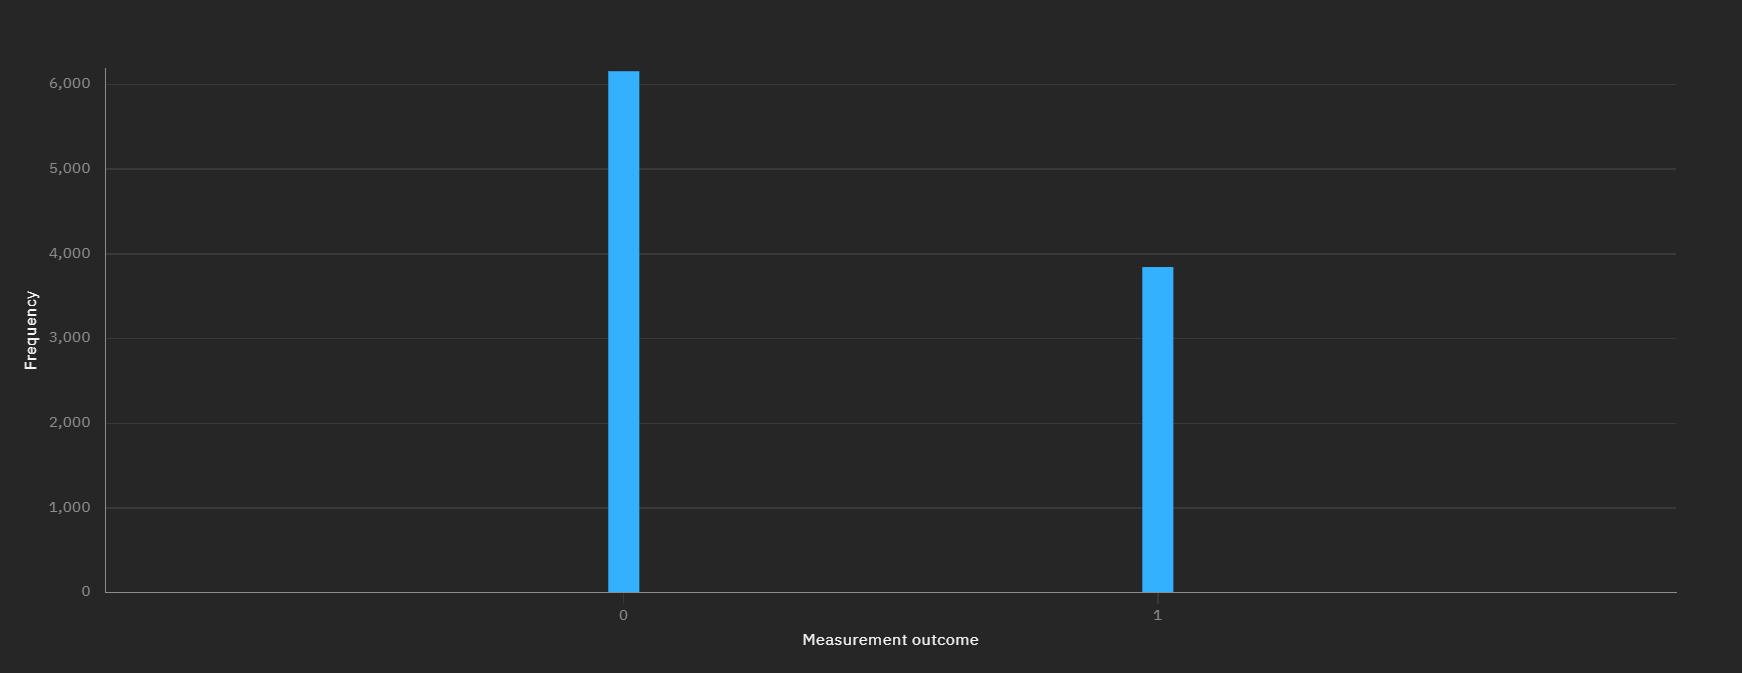

In [6]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QOSF\second_states_pair_histogram.png')
print('Output:')
display(img)

### 2.3.   Swap test in real hardware with 3rd pair of states

The states to compare are $ \begin{bmatrix} 
\sqrt{0.01}  \\
\sqrt{0.10} \\
\sqrt{0.12} \\
\sqrt{0.13} \\
\sqrt{0.04} \\
0 \\
\sqrt{0.35} \\
\sqrt{0.25} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0  \\
\sqrt{0.2} \\
\sqrt{0.2} \\
\sqrt{0.1} \\
\sqrt{0.2} \\
\sqrt{0.05} \\
\sqrt{0.05} \\
\sqrt{0.2}
\end{bmatrix} $ . Each one of 3 qubits. 

Output:


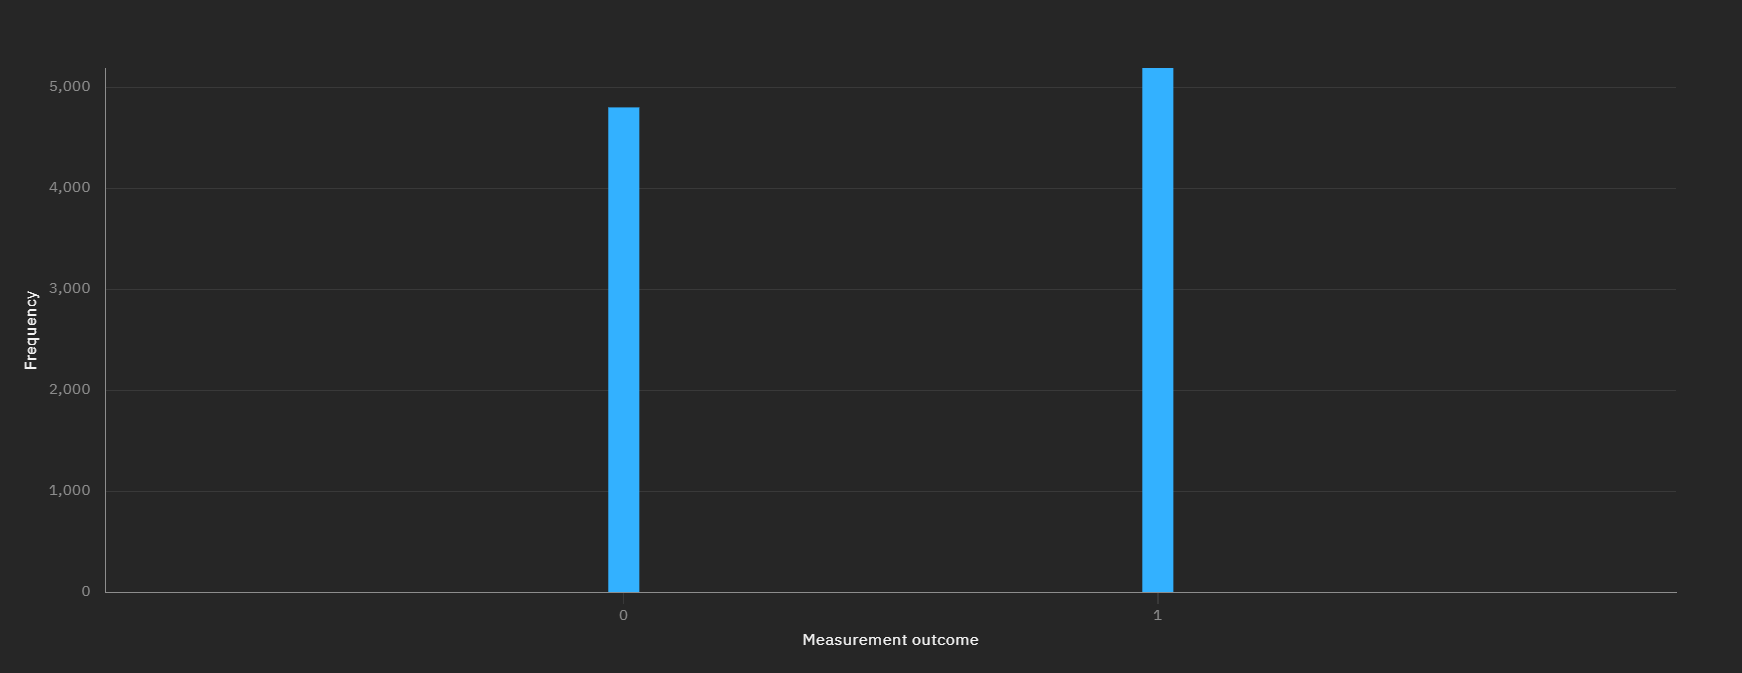

In [7]:
img = Image.open(r'C:\Users\54299\Desktop\Facultad\Trabajos\QOSF\third_states_pair_histogram.png')
print('Output:')
display(img)

## 3.   Similarity rate

The Swap Test results give us an orientation about how similar are the two states that are compared. When analyzing a a sample of results, the greater the number of $0$s measured, the greater similarity between states. For that, we create this $\textbf{similarity rate}$ that will help us to compare the results during the experiments:

$\text{similarity rate} = (\text{amount of 0s measured} - \text{amount of 1s measured}) \div 100 $.

Considering a sample size of $10000$ shots ...

* In case the states are completely equal, the result will be $(10000-0)\div 100 = 100\% \text{ of similarity}$.

* In case the states are partially similar, the result will be $(7500-2500)\div 100 = 50\% \text{ of similarity}$.

* In case the states are completely different, the result will be $(5000-5000)\div 100 = 0\% \text{ of similarity}$.

For the rest of situations ($70\%$ against $30\%$, $65\%$ against $35\%$,...), the equation will work the same way.


While adding error probability through the experiments, it could happens that the similarity rate obtained is under $0/%$. Although this is impossible due to the own definition of this parameter, you must remember that adding noise in a circuit will cause exactly that:

$\textbf{The result of a noisy circuit could not only be incorrect, but also could have no sense with the range of possible results.}$

## 4.   Error Simulation Experiments

### 4.1.   First experiment - 1st pair of states with 1 qubit error rate

The states to compare are
 $ \begin{bmatrix} 
\sqrt{0.3}  \\
\sqrt{0.7} \\
\end{bmatrix} $ ,
$ \begin{bmatrix} 
\sqrt{0.6}  \\
\sqrt{0.4} \\
\end{bmatrix} $. Each one with 1 qubit.

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
First experiment Swap Test:


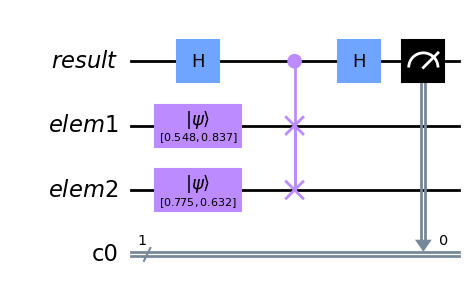

First experiment TRANSPILED Swap Test:


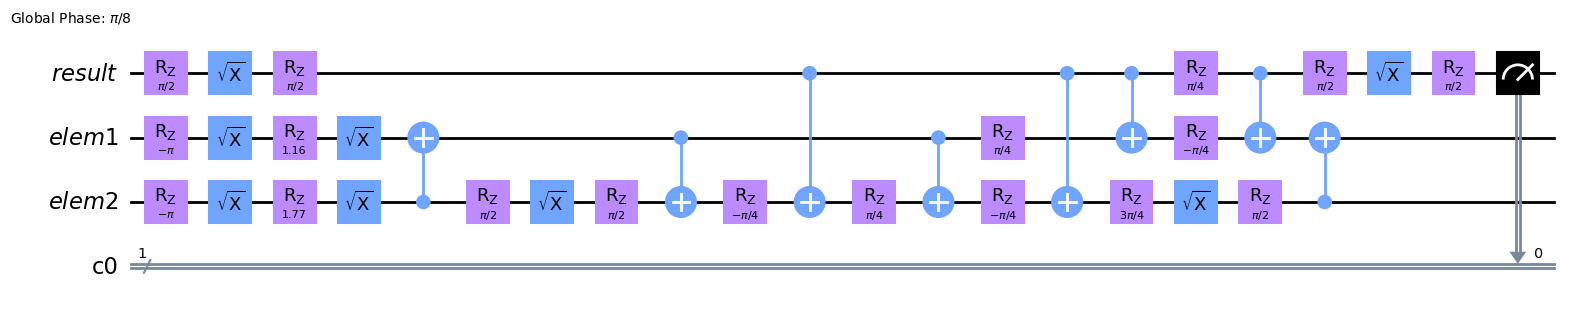

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
NoiseModel: Ideal
First Experiment Counts:


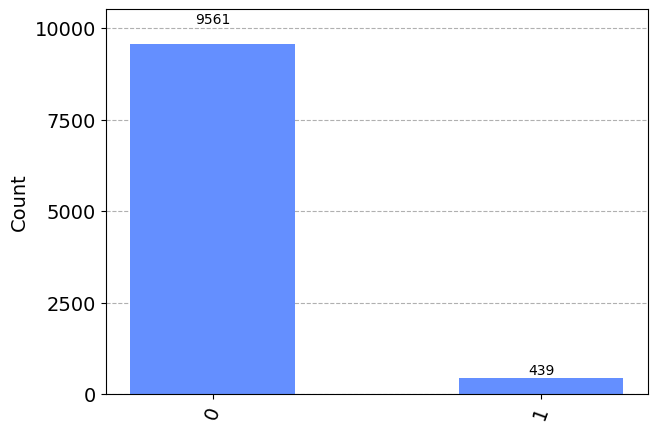

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9925000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


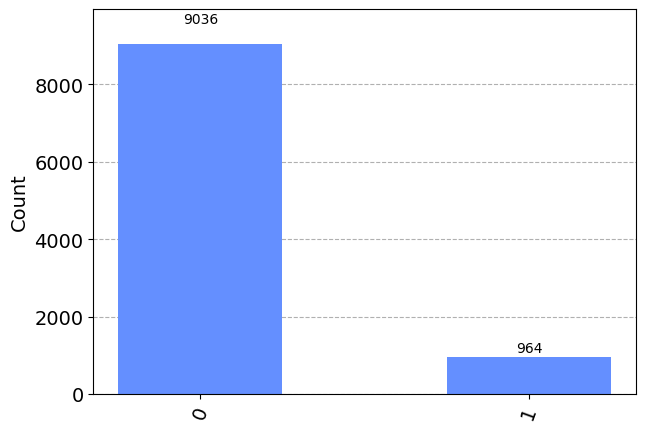

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


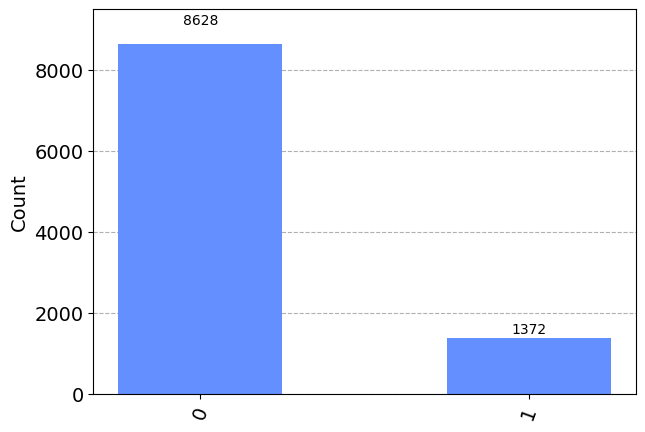

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9775000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


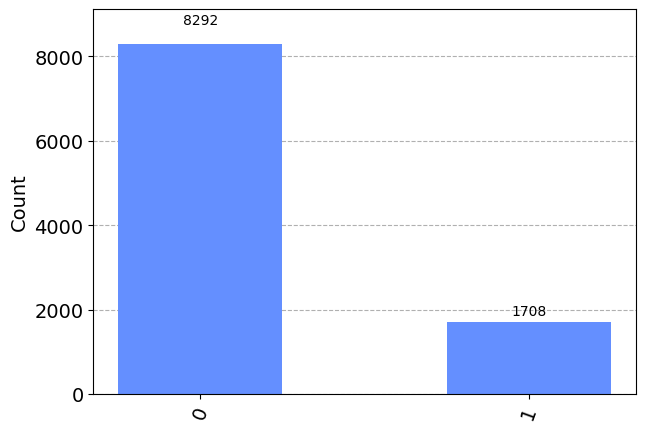

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.97, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.01, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.01, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.01, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


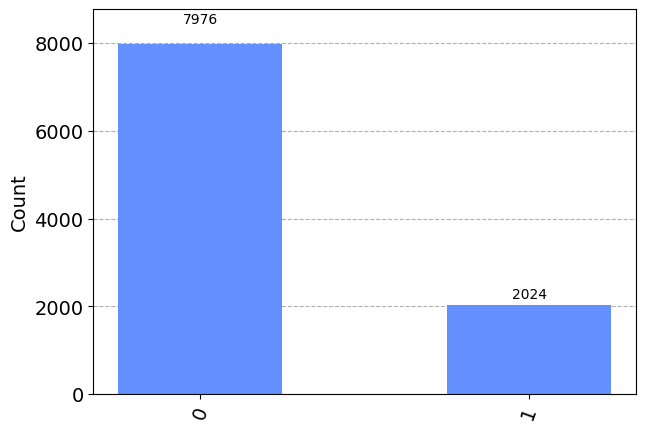

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9625000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


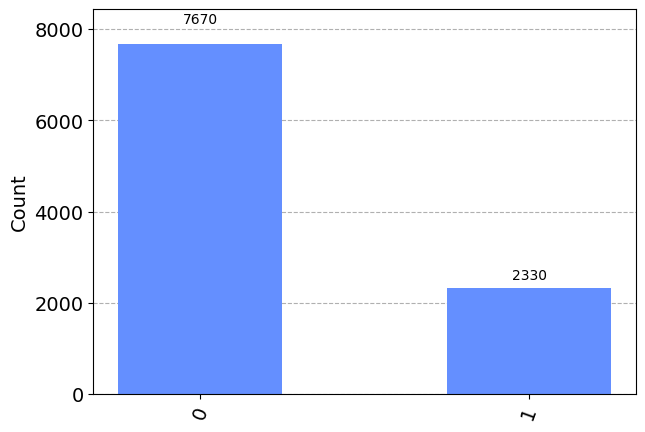

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.955, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.015, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.015, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.015, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


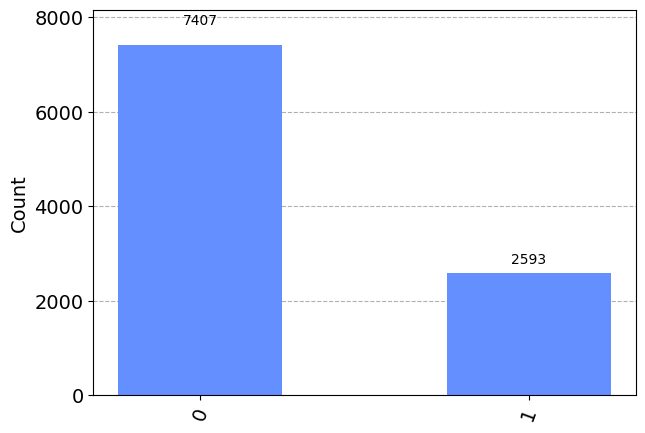

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


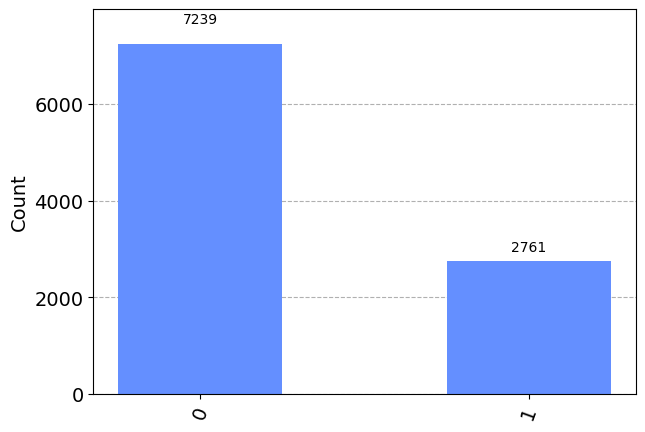

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.94, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.02, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.02, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.02, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


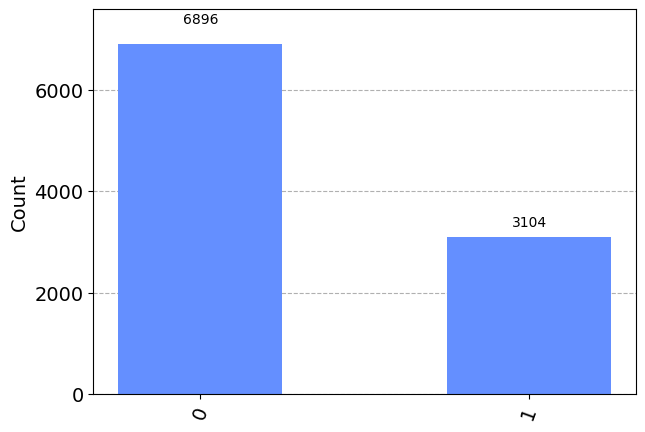

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9325000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


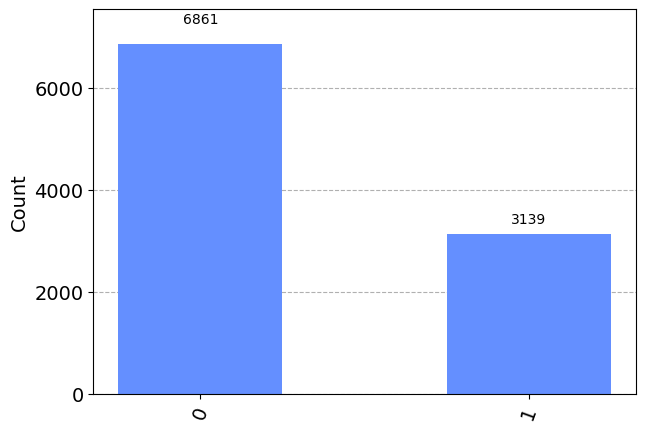

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


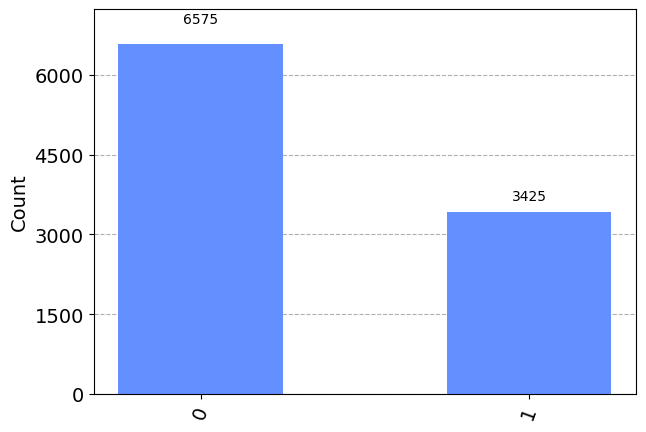

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9175000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


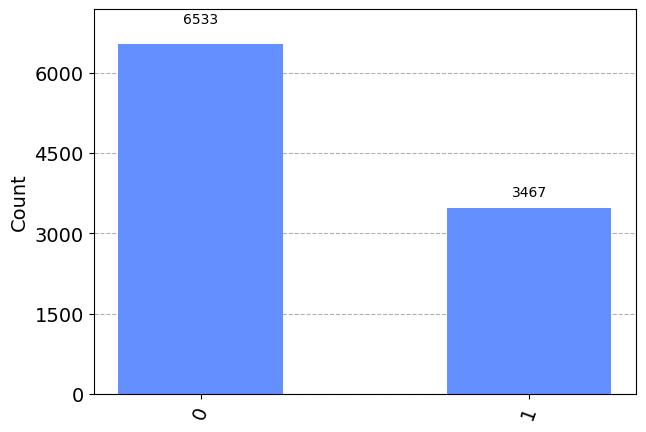

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.91, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


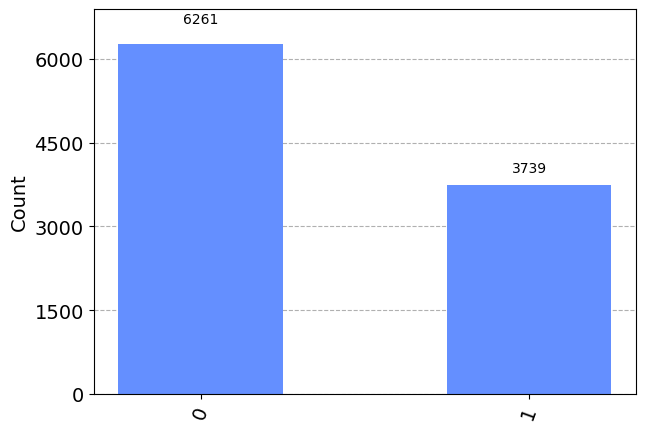

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9025000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


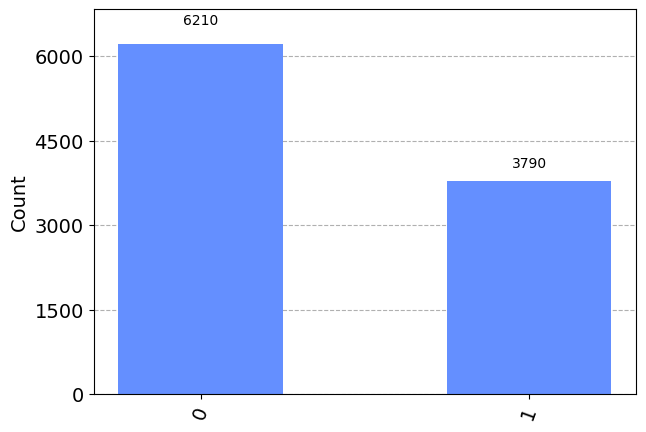

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.895, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.035, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.035, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.035, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


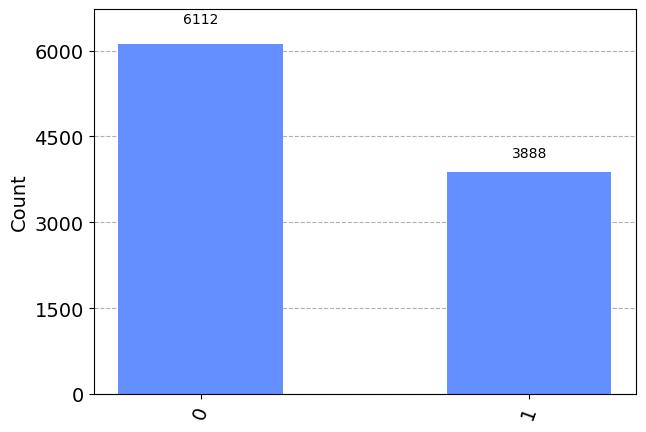

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8875000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


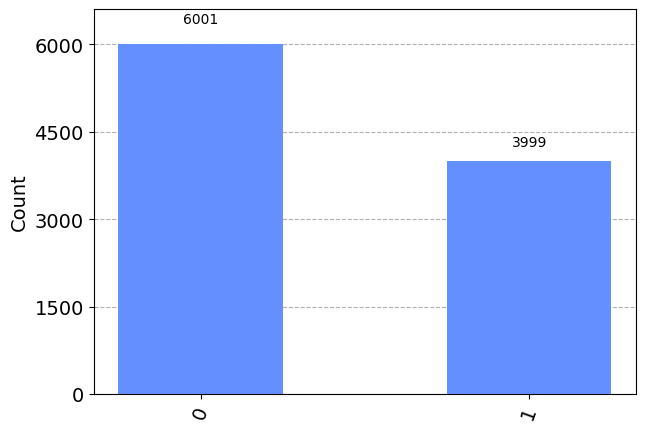

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.88, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


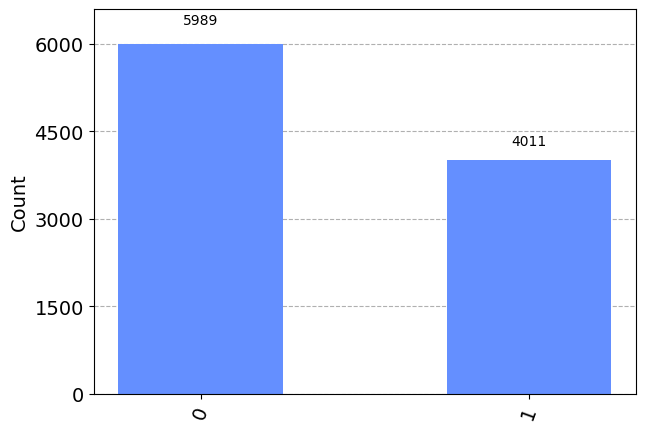

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8725, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


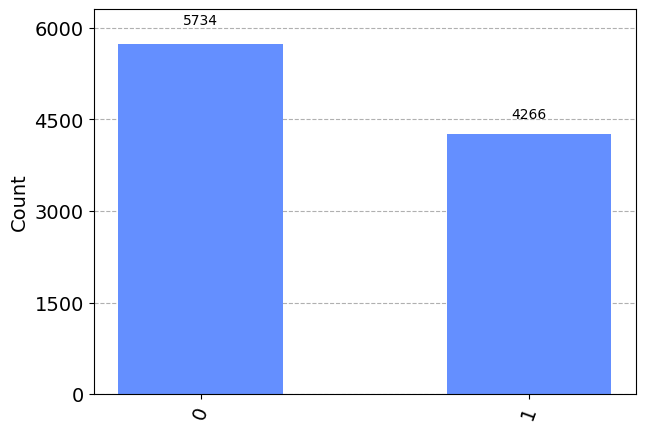

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.865, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.045, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.045, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.045, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


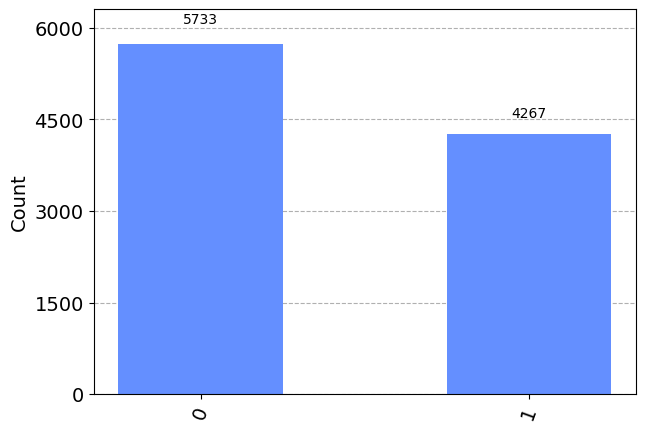

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8575, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


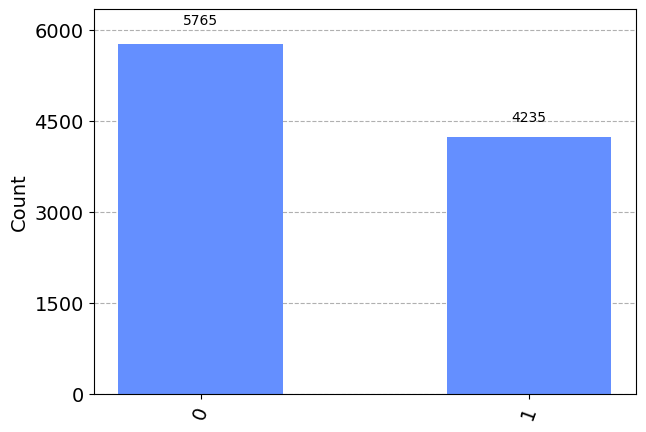

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.05, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


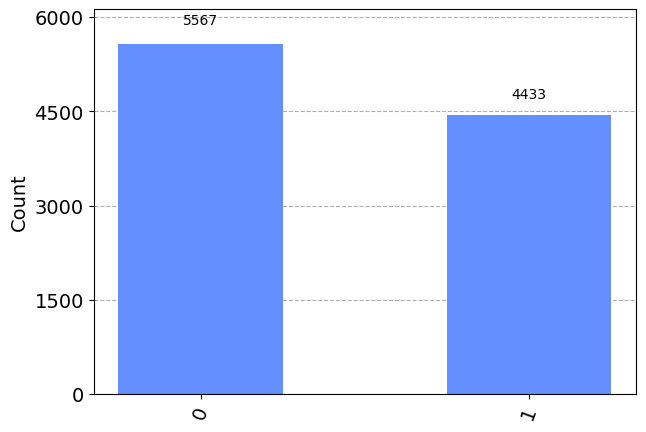

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8425, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0525, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


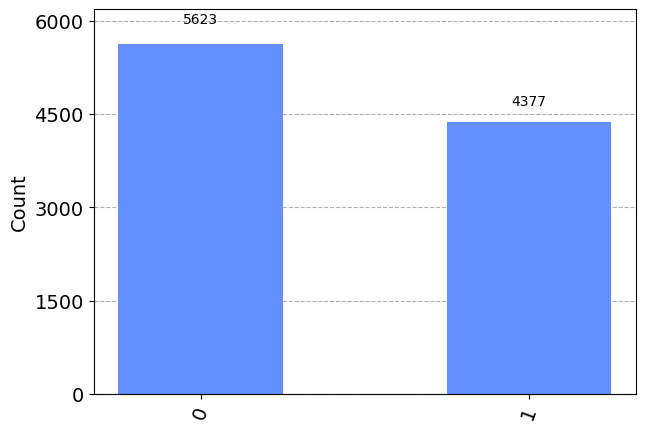

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.835, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.055, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.055, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.055, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


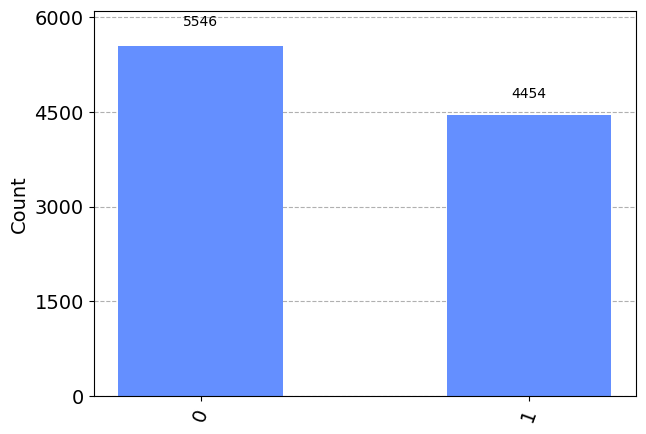

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8275, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0575, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


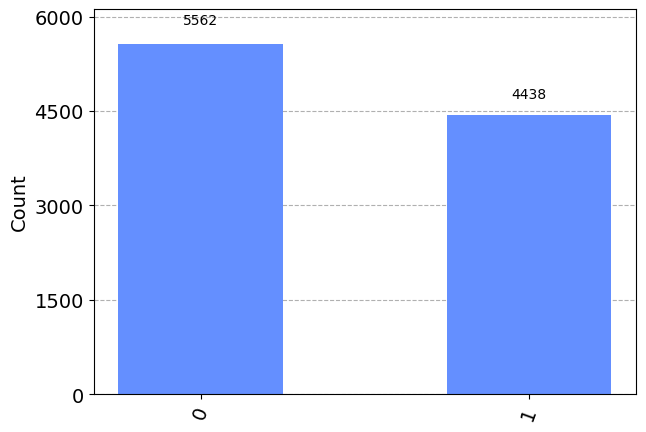

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8199999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


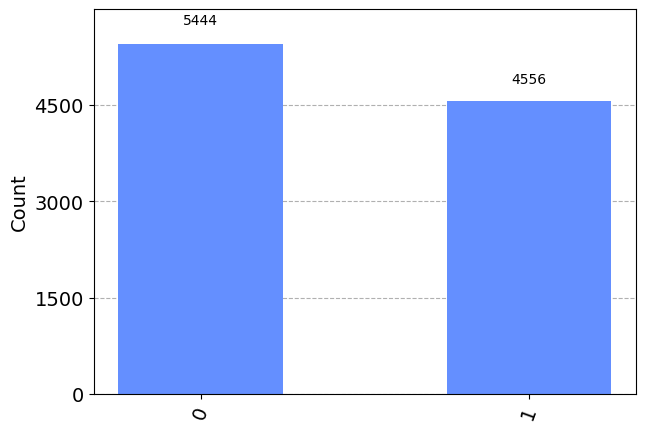

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8125, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0625, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


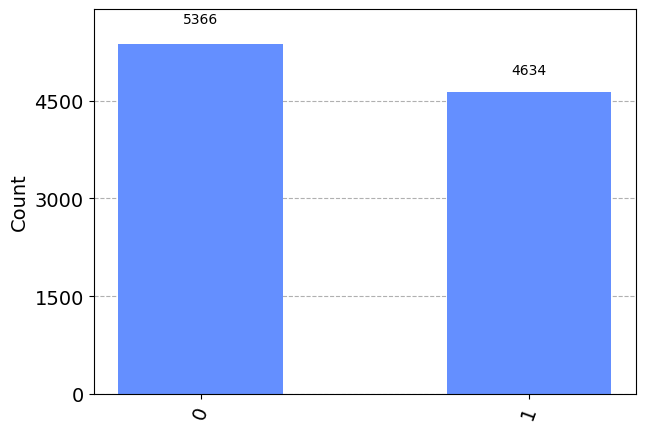

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8050000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


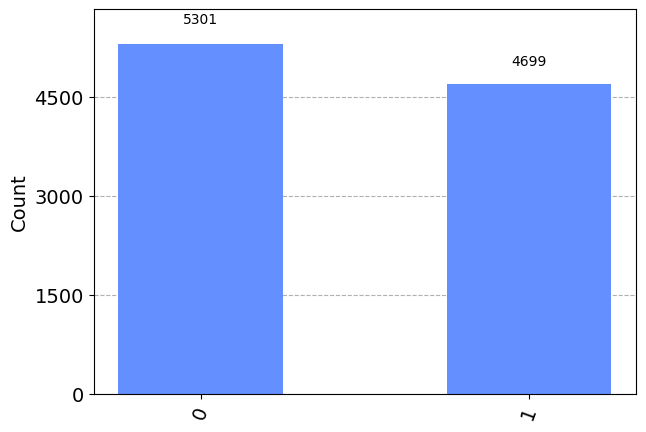

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7975, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0675, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


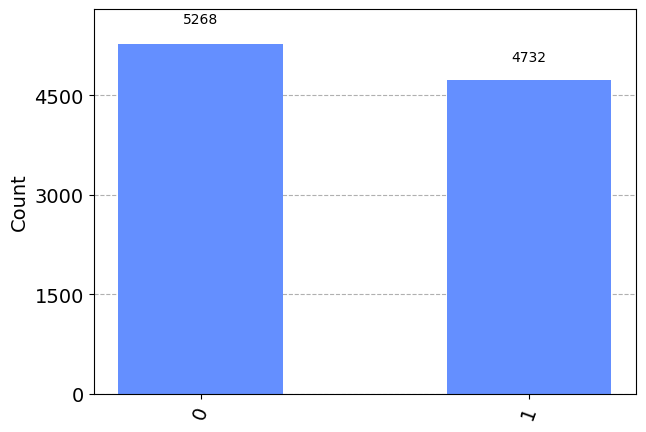

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7899999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


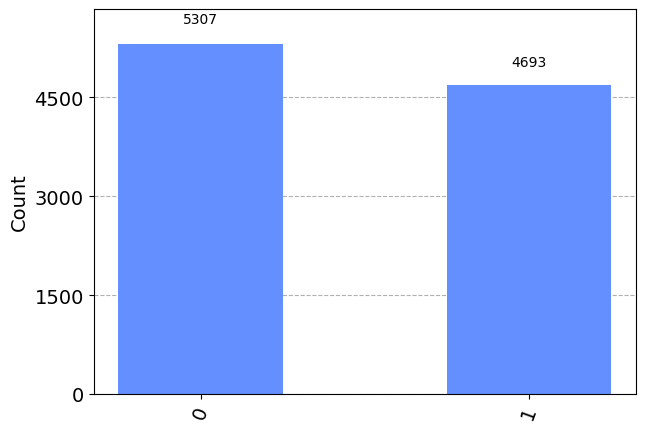

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7825, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0725, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


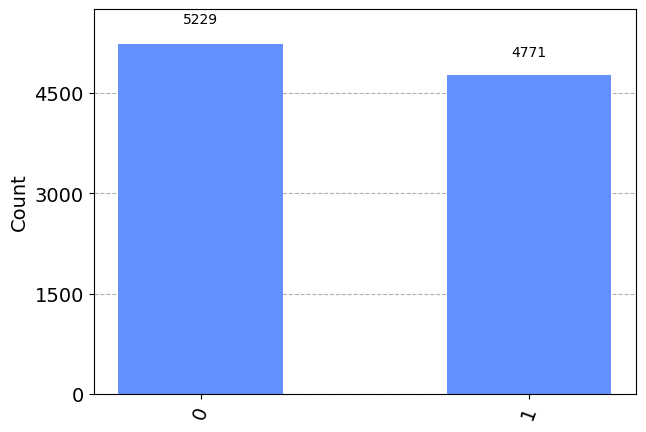

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7750000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


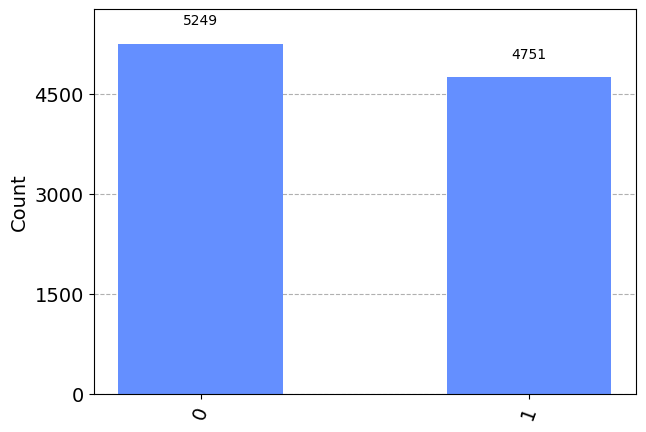

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7675, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0775, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


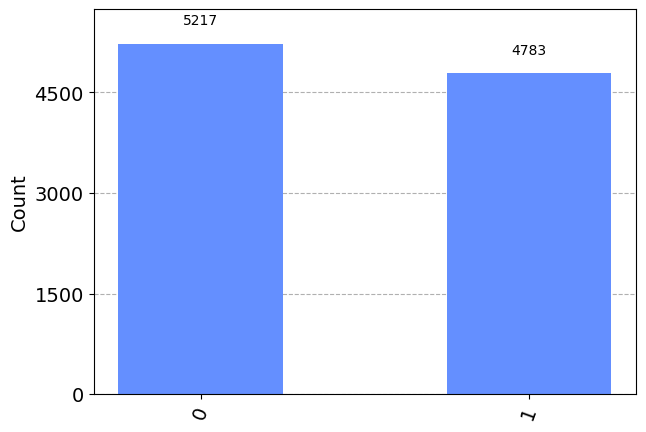

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7600000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


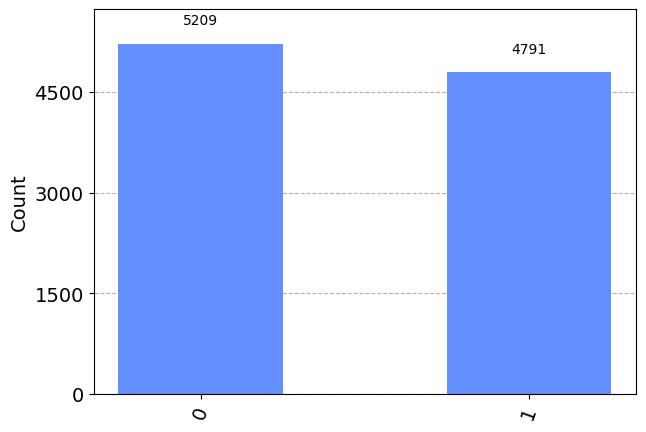

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7525, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0825, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


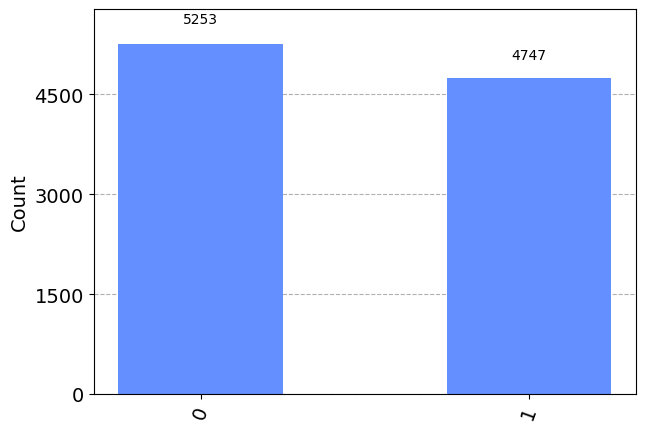

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.745, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


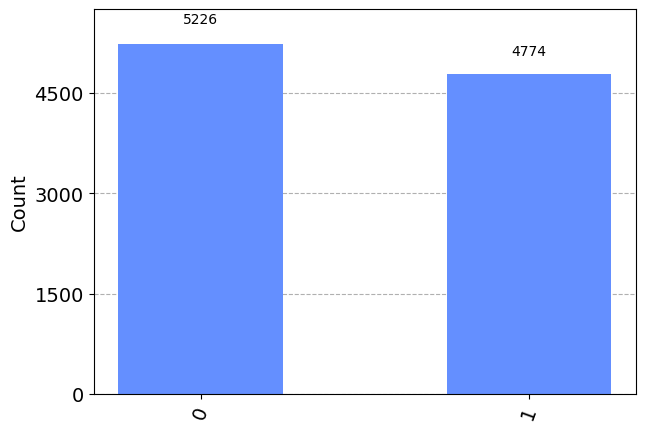

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7375, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0875, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


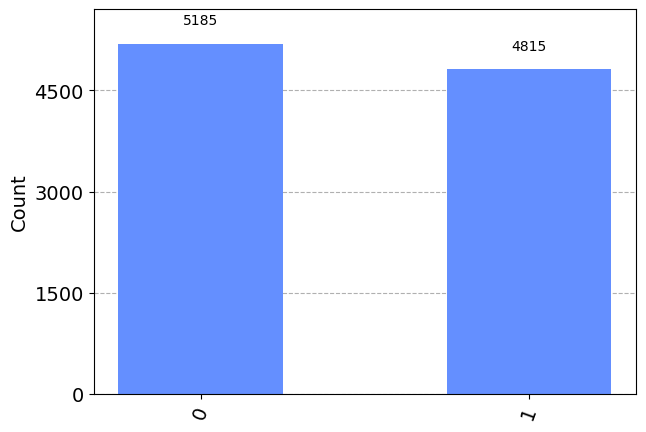

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7300000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


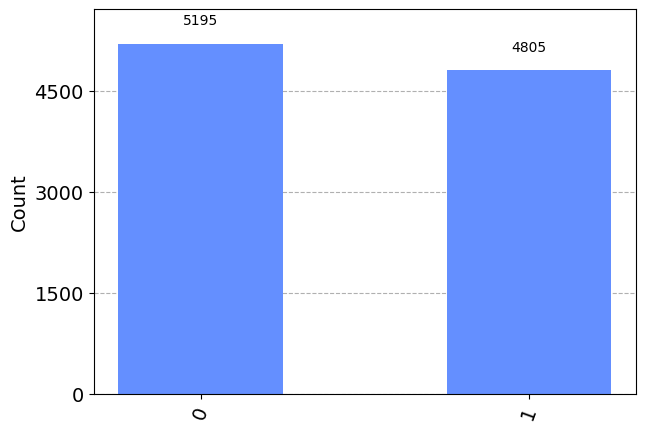

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7224999999999999, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0925, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


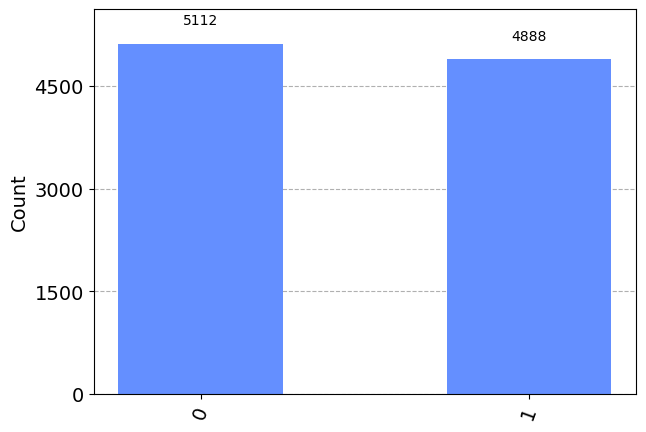

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7150000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


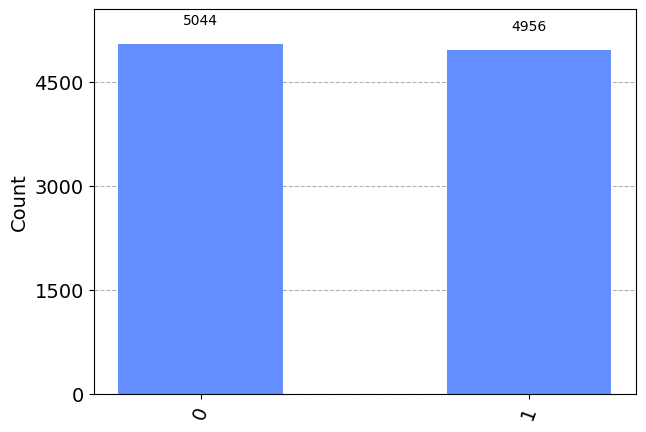

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7075, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0975, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


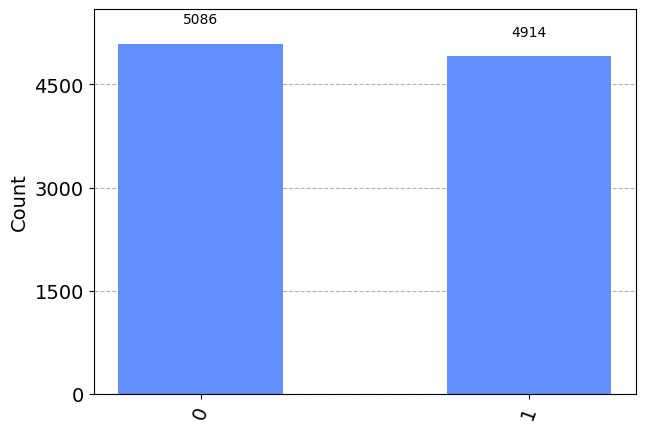

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7000000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


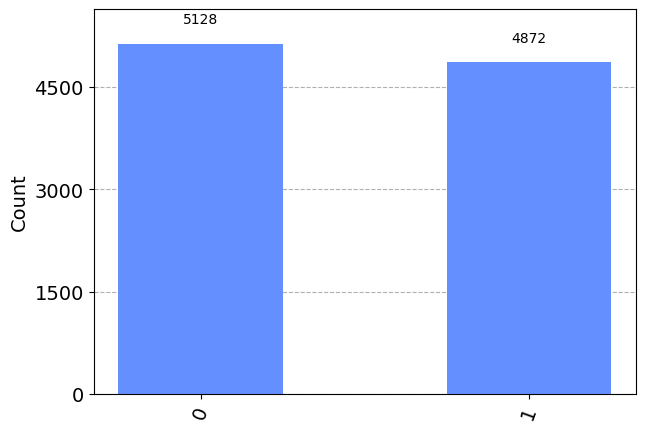

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


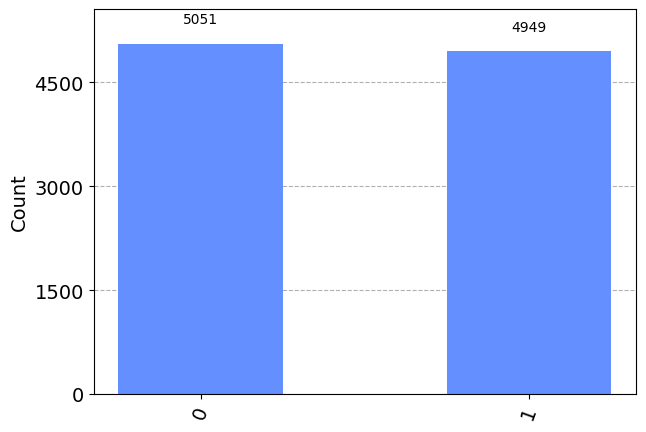

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.685, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.105, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.105, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.105, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


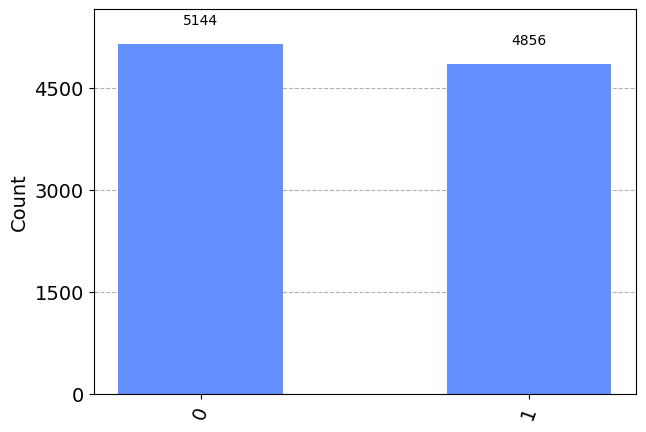

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6775, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1075, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


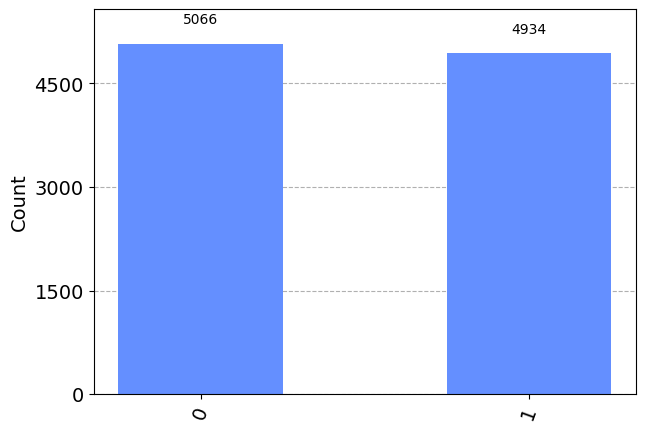

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.67, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


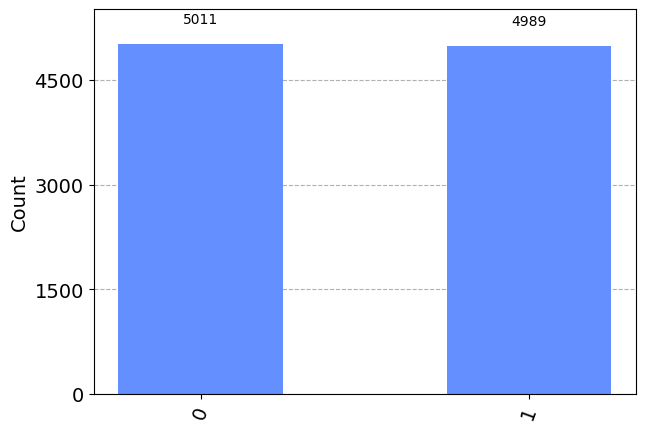

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


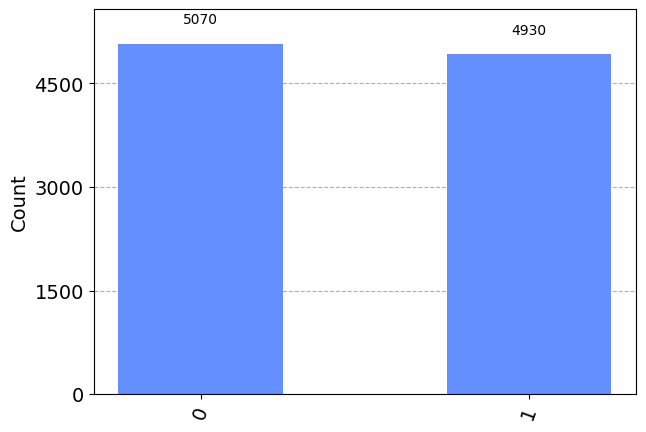

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.655, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.115, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.115, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.115, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


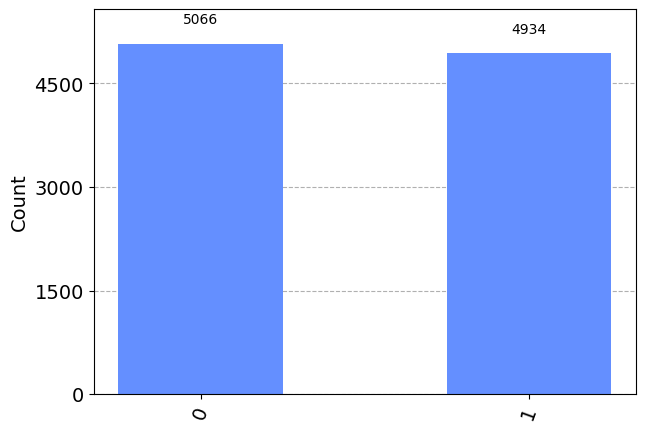

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


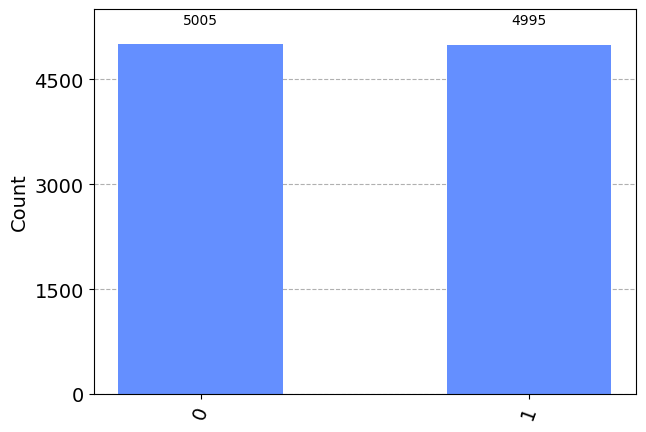

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.64, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


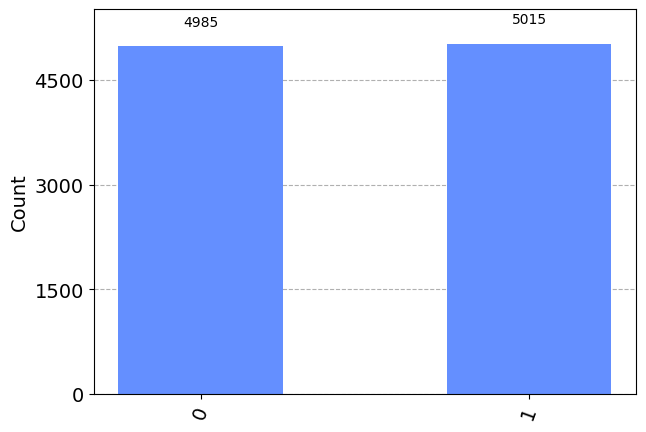

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6325, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


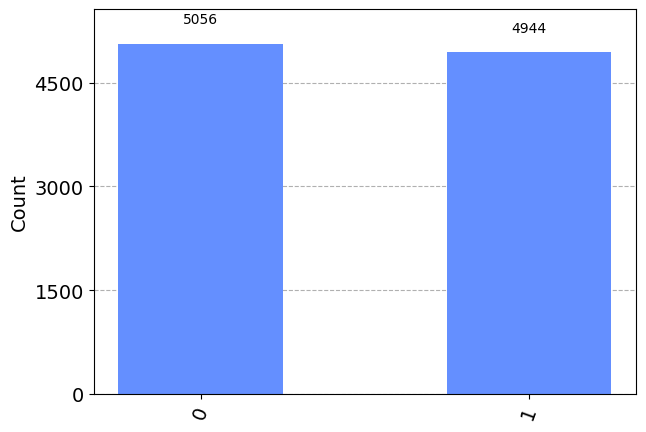

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
First Experiment Counts:


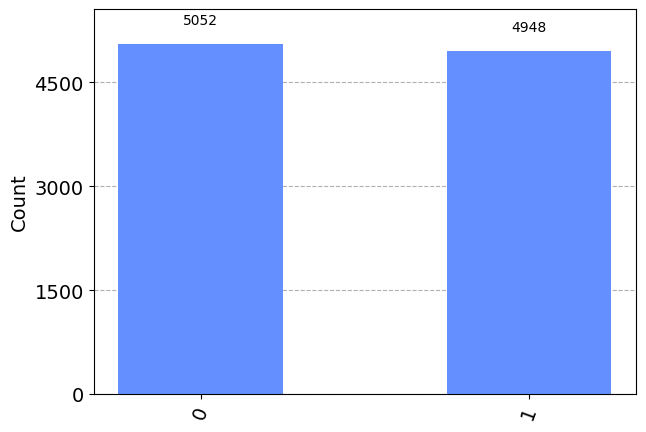

--------------------------------------------------------------------------------------------------------------


In [8]:
results = []
    
#First experiment Swap Test
noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,1,['id','h','rz','sx'])

swap_test = get_swap_test(1,[sqrt(0.3),sqrt(0.7)],[sqrt(0.6),sqrt(0.4)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('First experiment Swap Test:')
display(swap_test.draw('mpl'))
print('First experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,1,['id','h','rz','sx'])
    print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    #display(circ_tnoise.draw('mpl'))
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('First Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')


In [9]:
#SIMILARITIES RATE CALCULATIONS FOR EACH SIMULATION
successCounts1=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts1.append(count)
#print(results)
#print(successCounts1)

In [10]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']+ops['h']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 11), ('cx', 8), ('h', 4), ('sx', 4), ('measure', 1)])


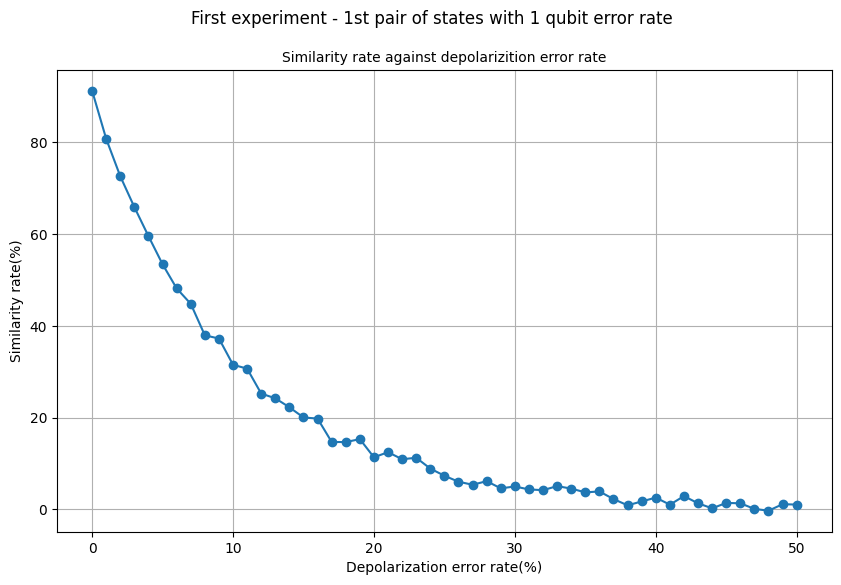

In [11]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts1, marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('First experiment - 1st pair of states with 1 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Displaying plot
plt.grid(True)
plt.show()

### 4.2.   Second experiment - 1st pair of states with 2 qubit error rate

QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
Second experiment Swap Test:


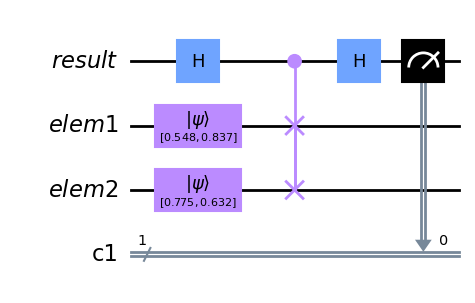

Second experiment TRANSPILED Swap Test:


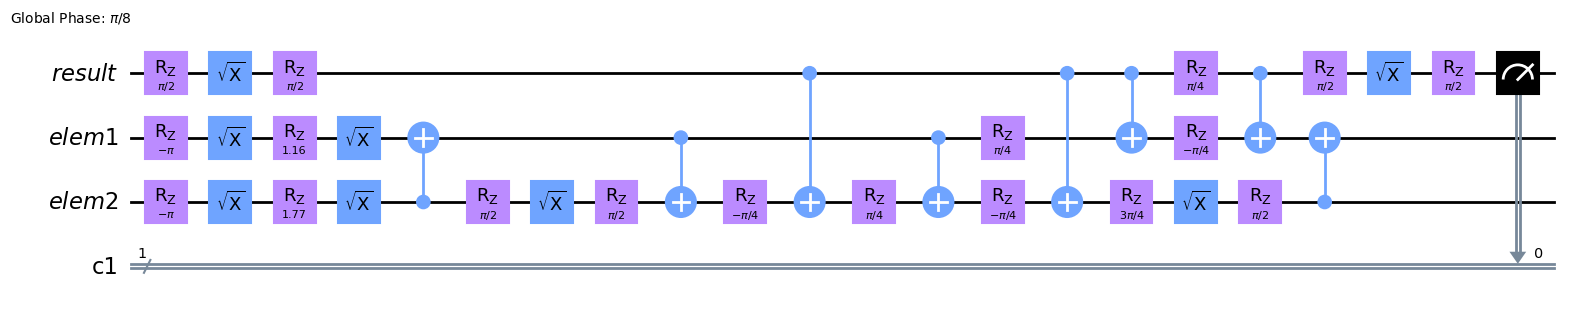

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
First Experiment Counts:


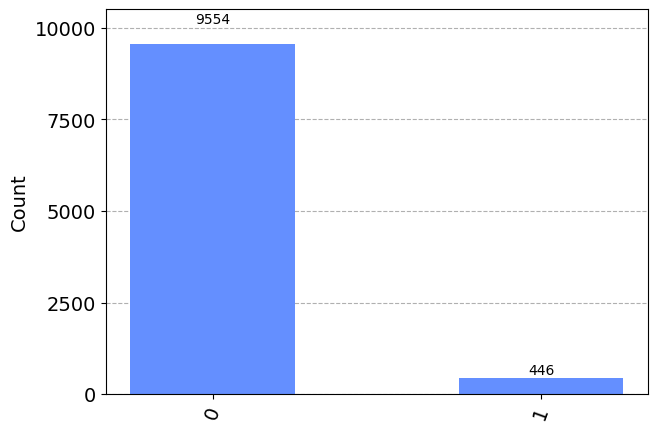

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9906250000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

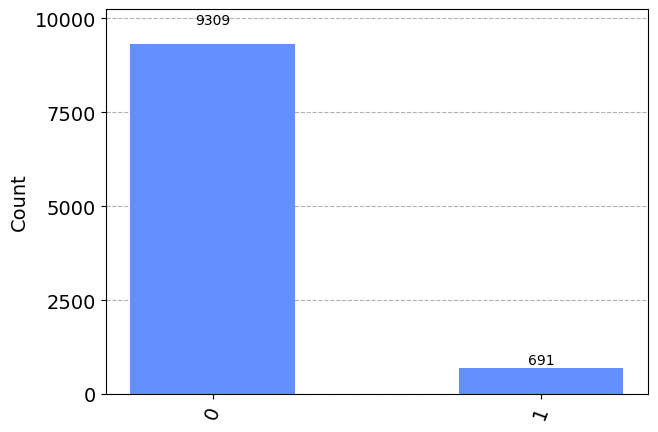

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9812500000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

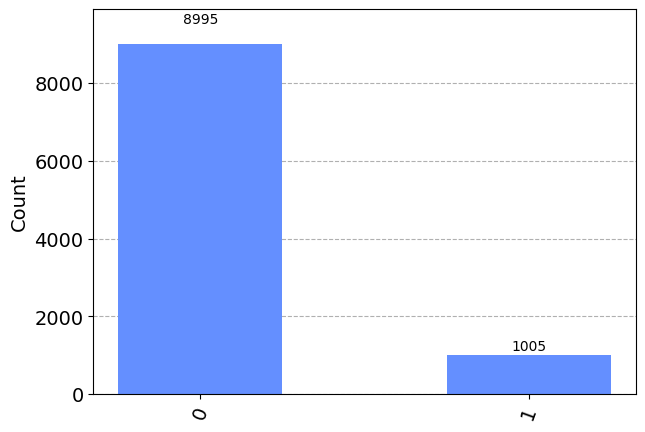

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9718750000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

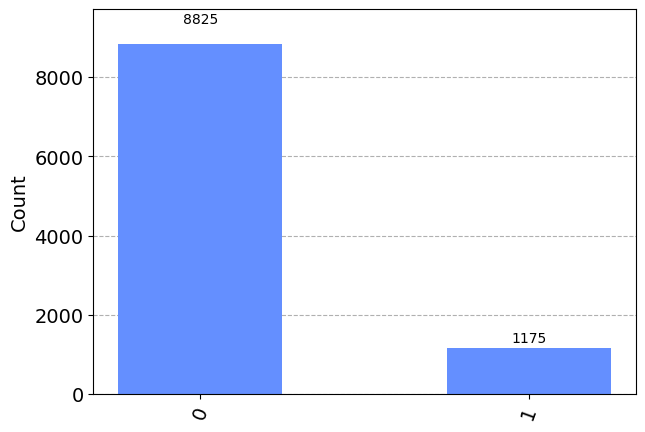

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9625000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

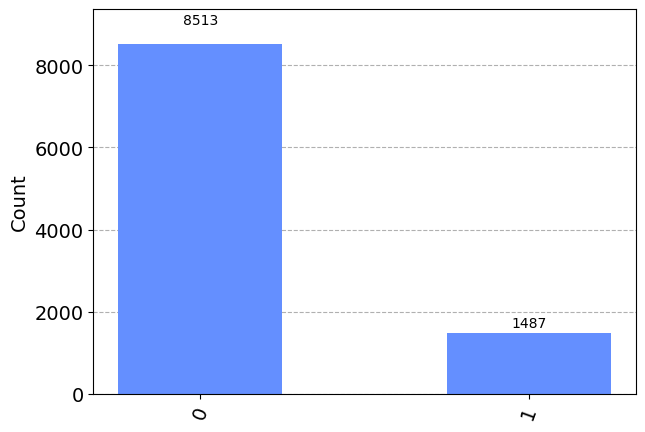

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9531249999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

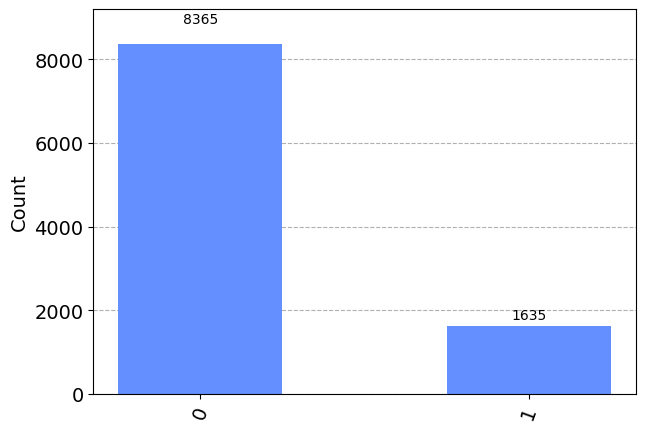

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9437499999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

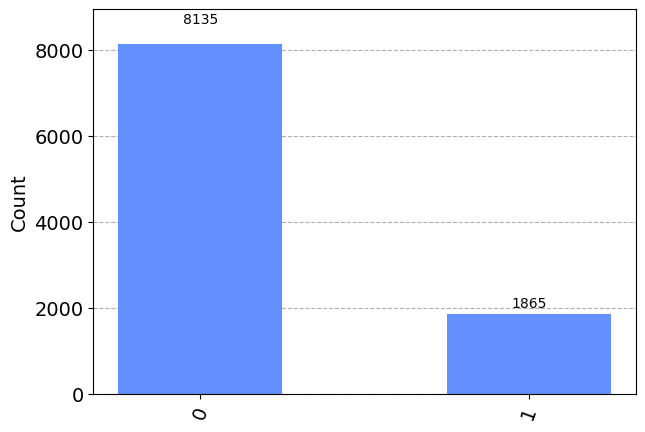

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9343749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

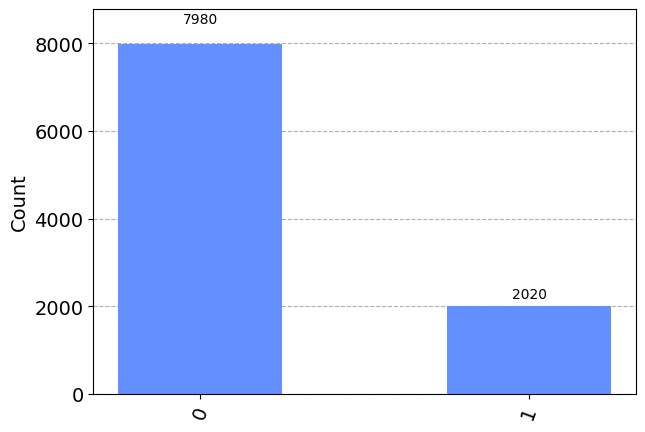

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.005, Circuit = 
     ┌───────────

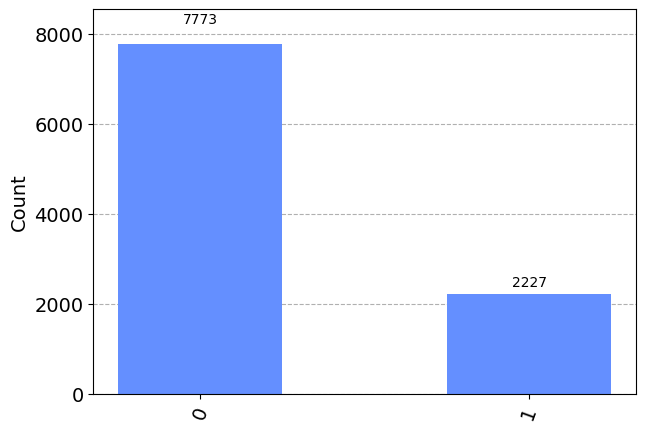

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9156250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

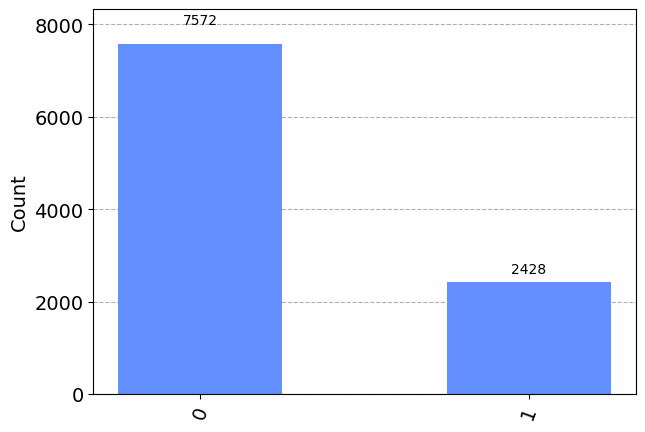

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9062500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

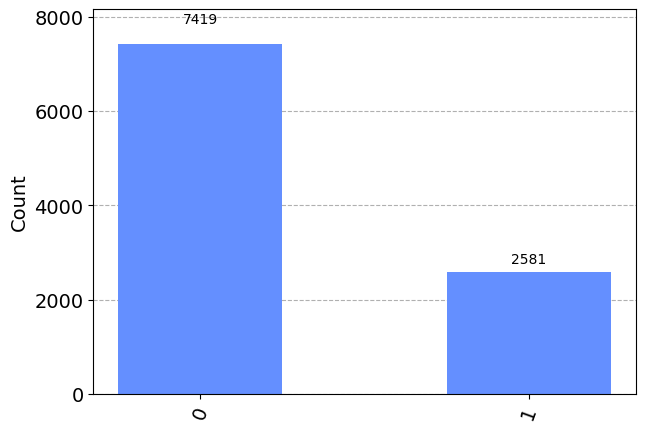

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8968750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

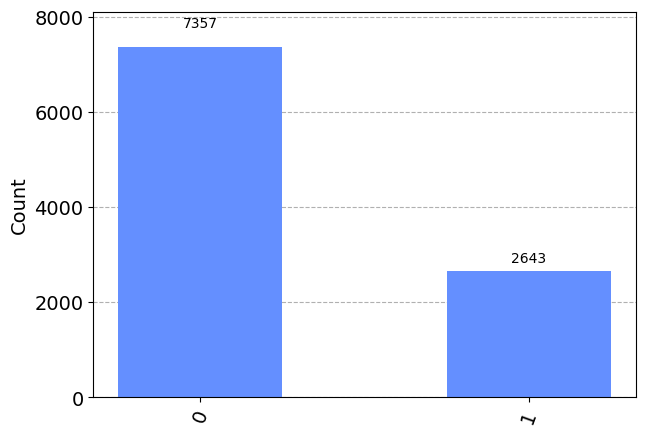

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

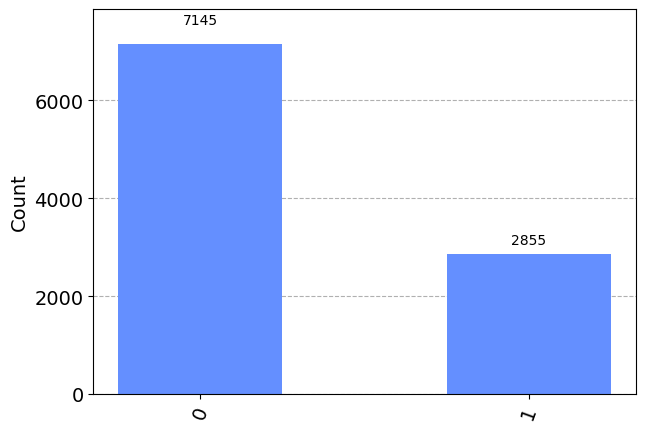

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8781249999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

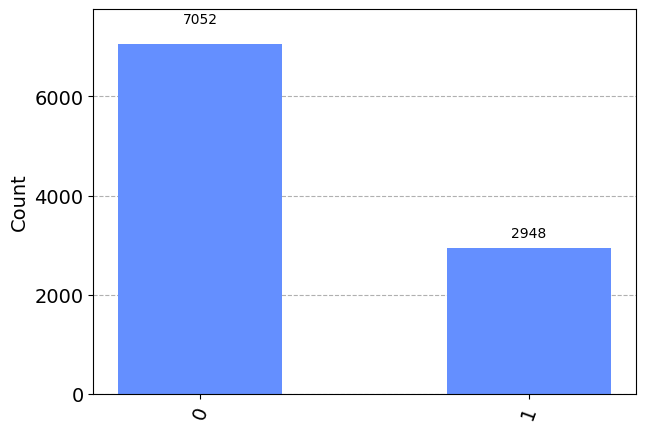

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8687499999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

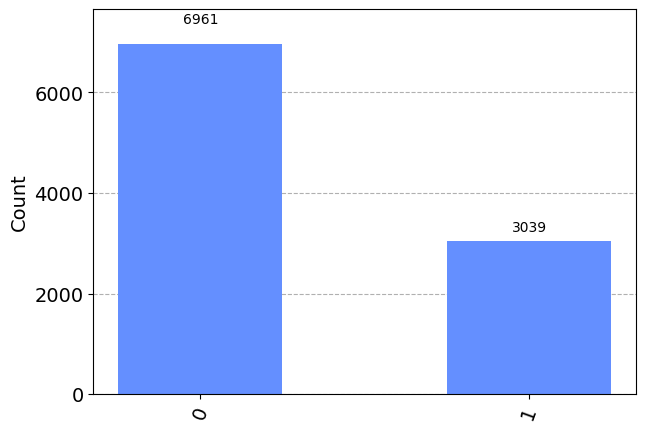

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8593749999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

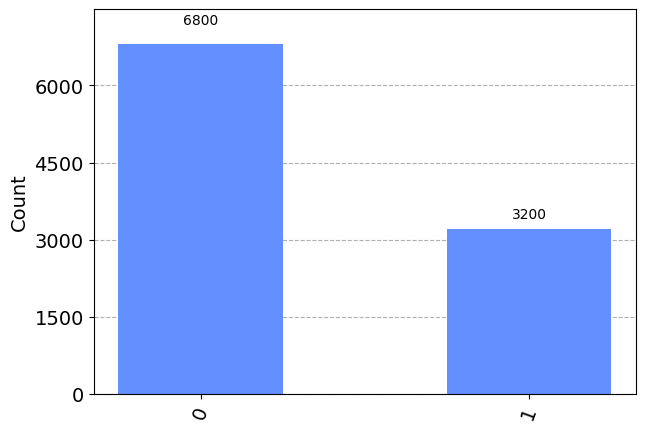

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.01, Circuit = 
     ┌────────────┐
q_0:

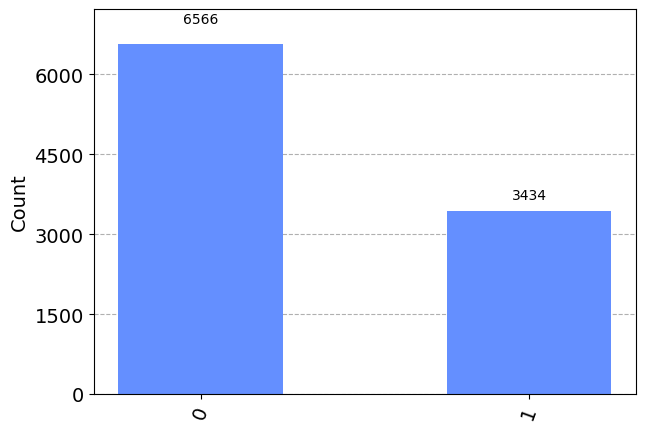

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8406250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

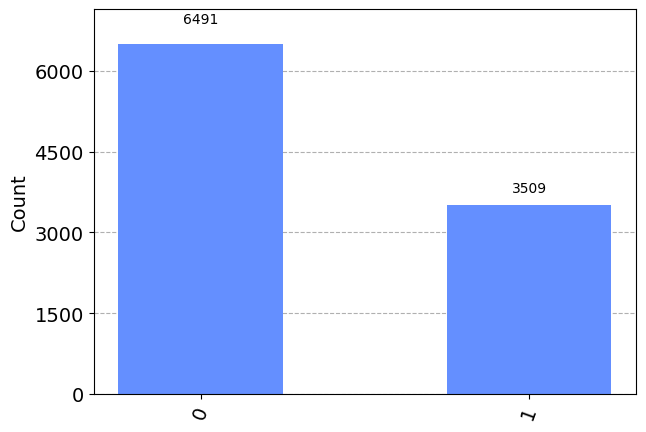

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8312500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

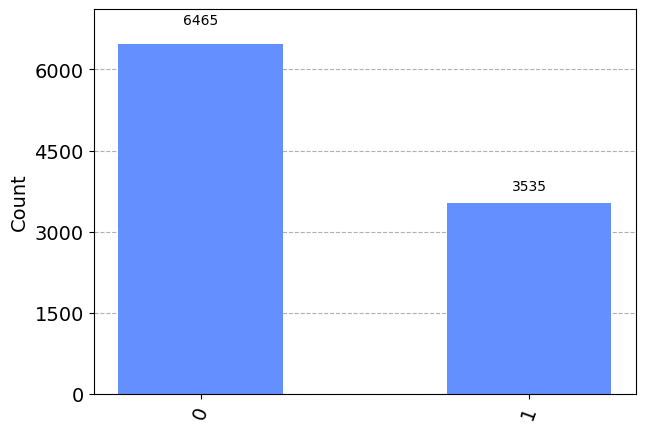

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8218750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

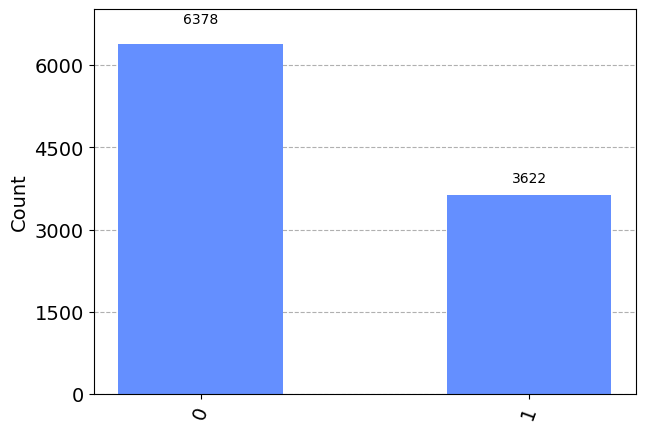

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8125000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_

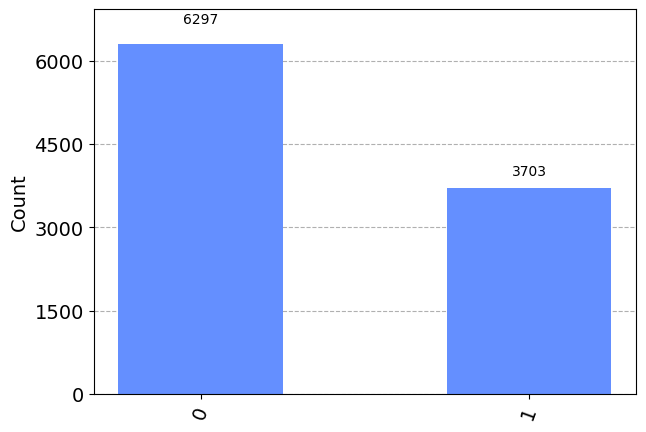

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8031249999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

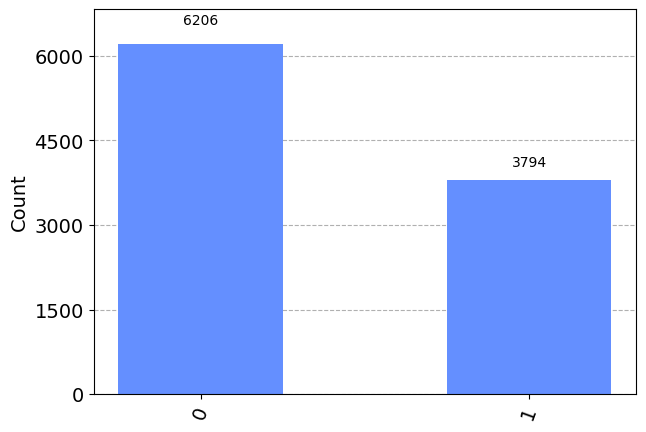

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7937499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

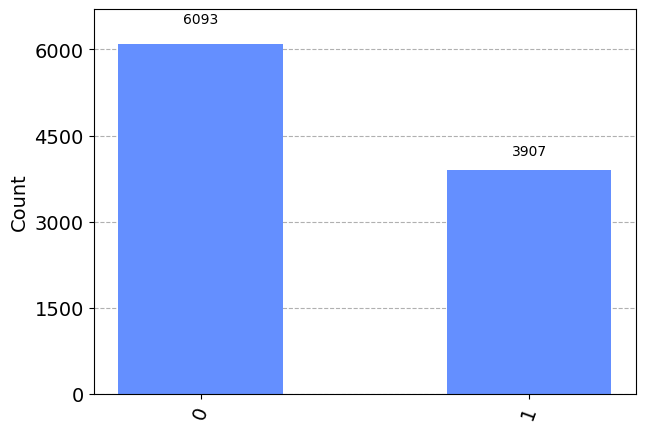

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7843749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

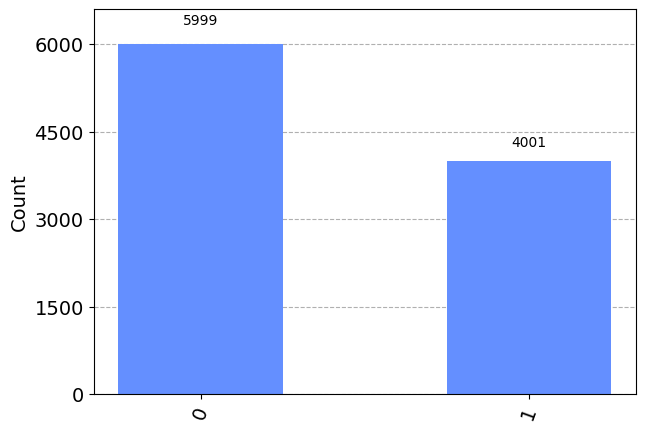

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

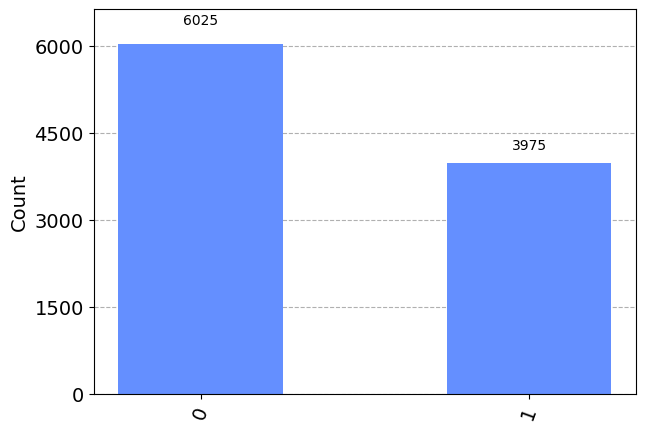

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.765625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.015625, Circuit

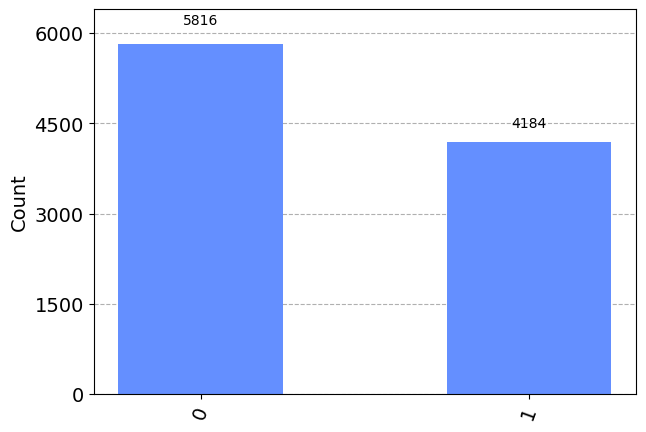

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7562500000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

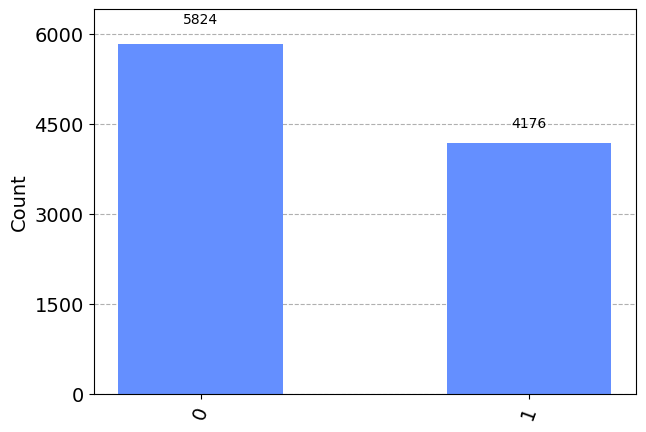

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7468750000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

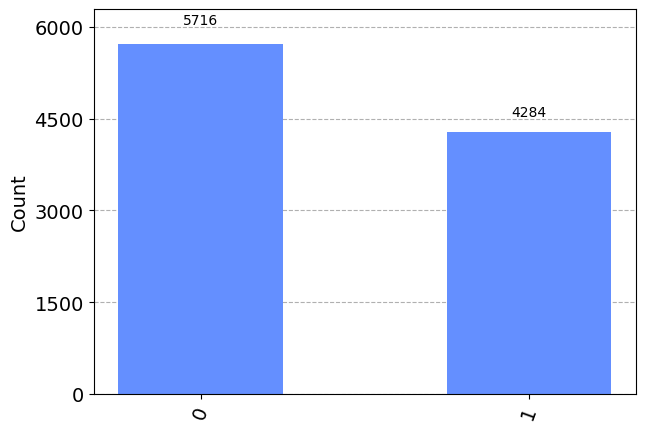

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7375000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

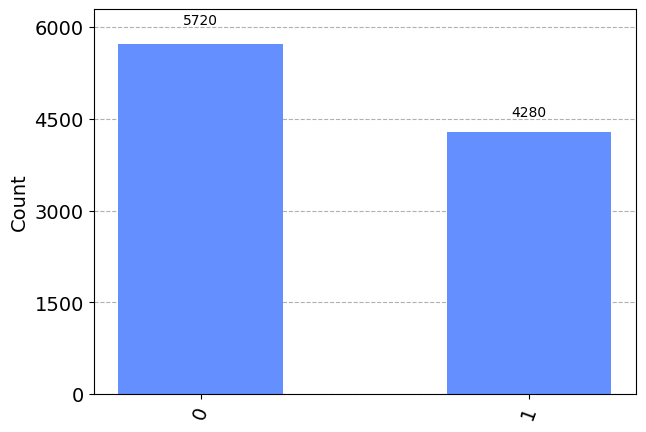

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7281250000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

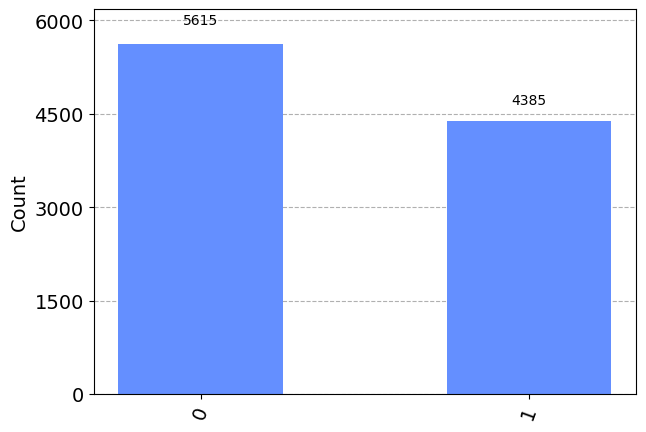

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7187499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

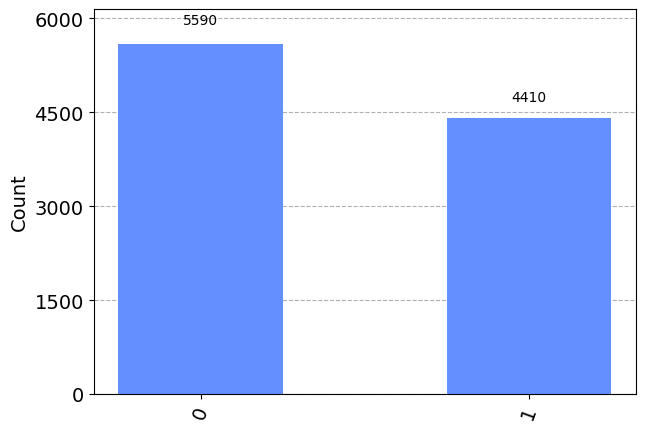

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7093749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

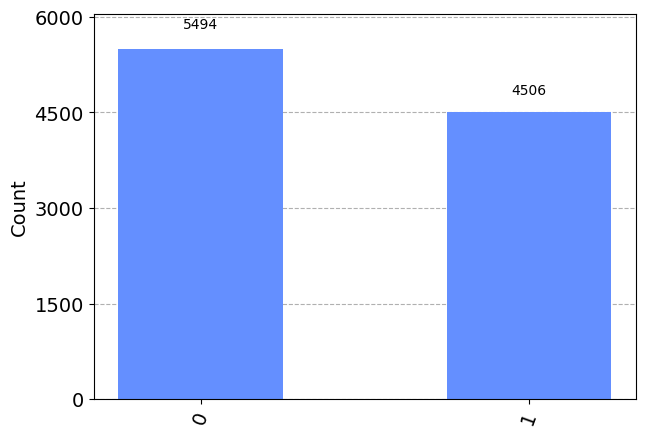

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6999999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

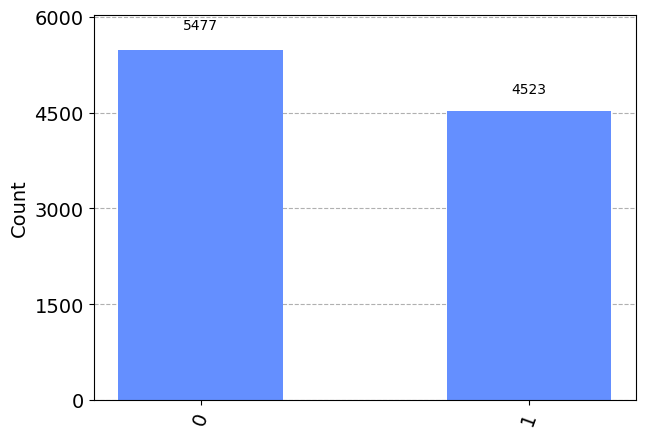

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.690625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.020625, Circuit

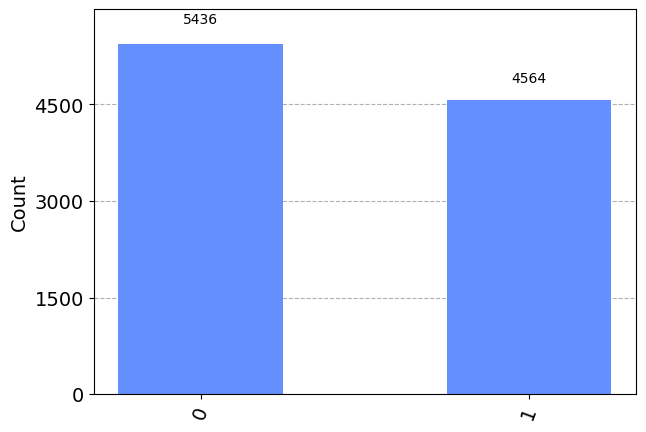

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.68125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1

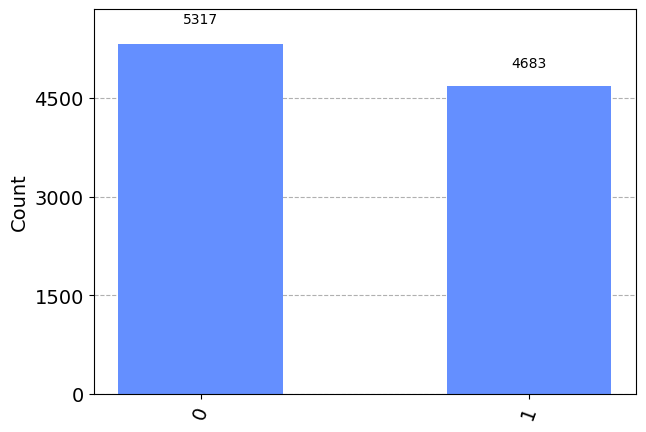

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6718750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

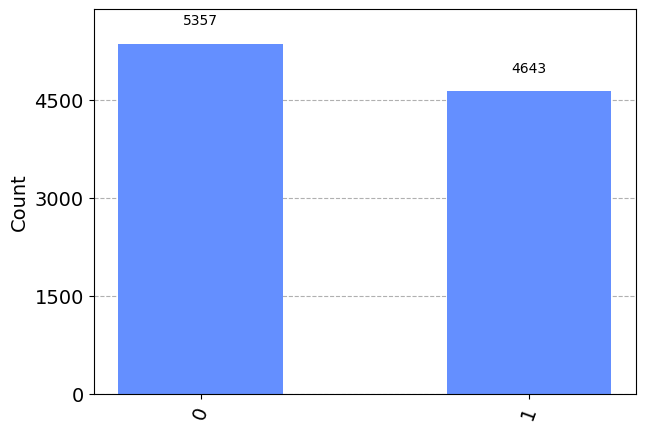

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6625000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

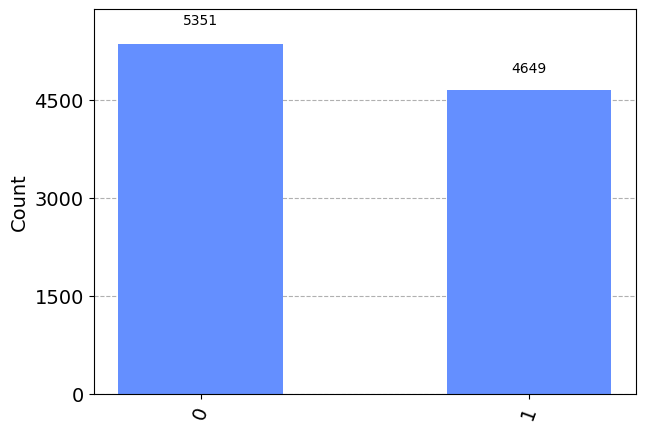

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6531250000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

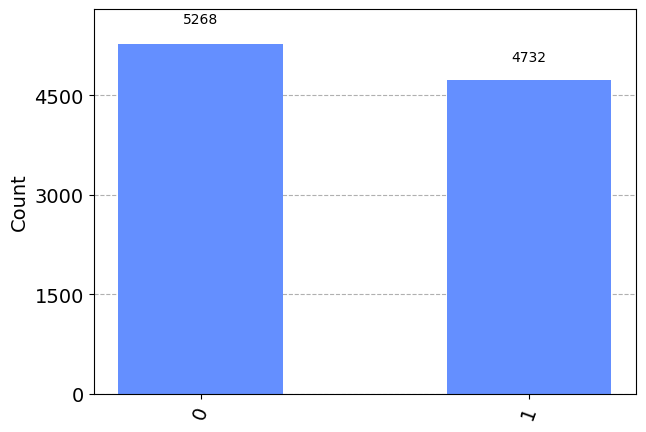

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6437499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

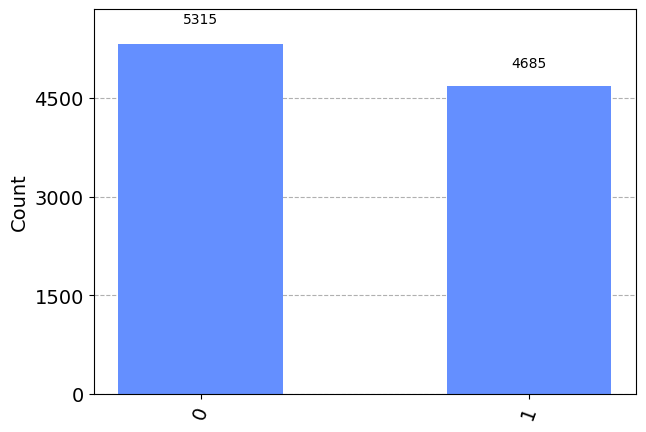

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6343749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

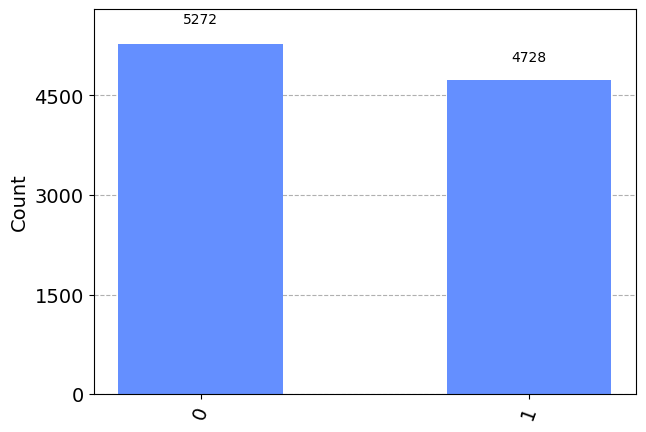

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6249999999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

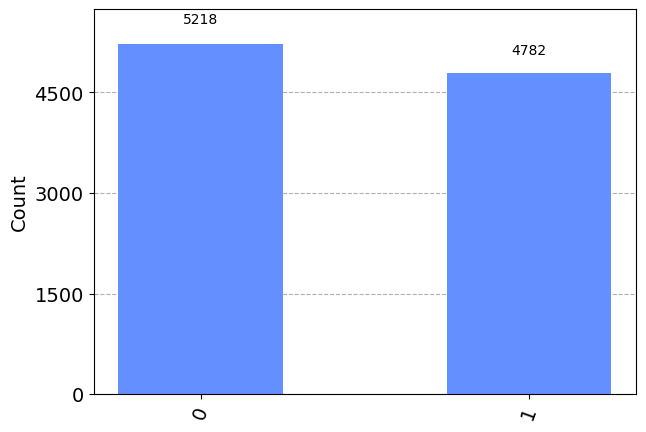

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.615625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1    

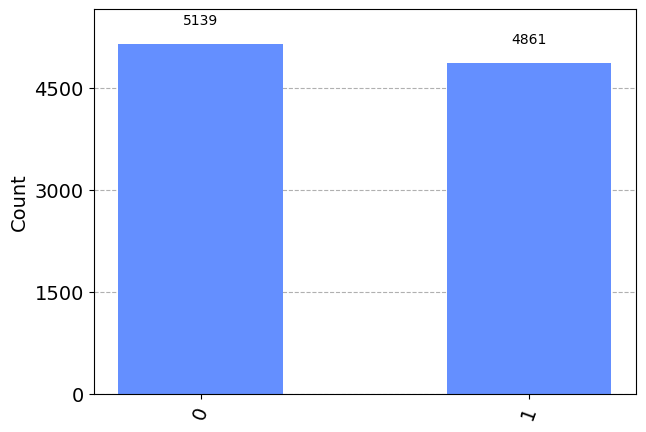

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6062500000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

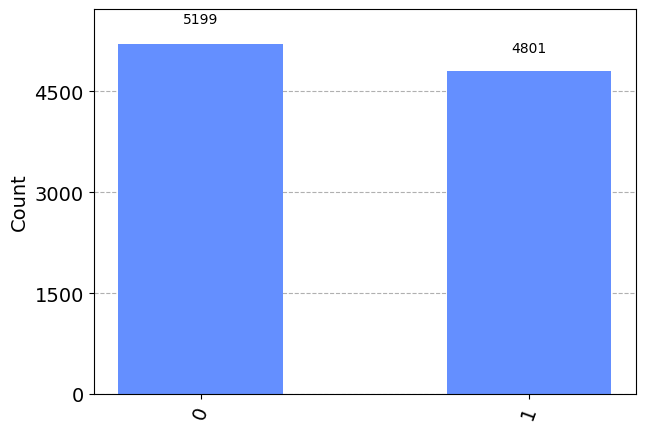

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5968750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

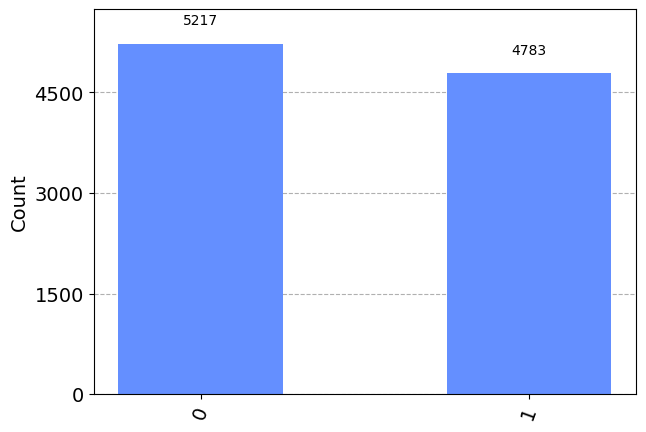

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5875000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

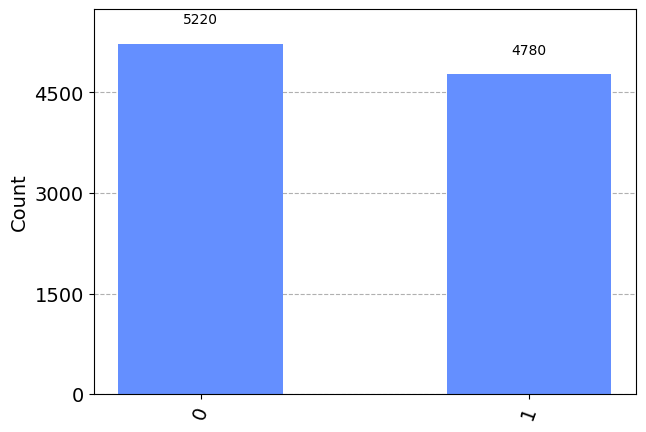

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5781250000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

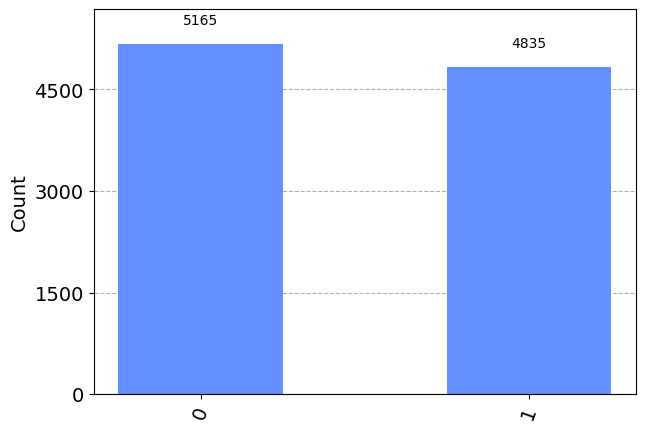

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5687499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

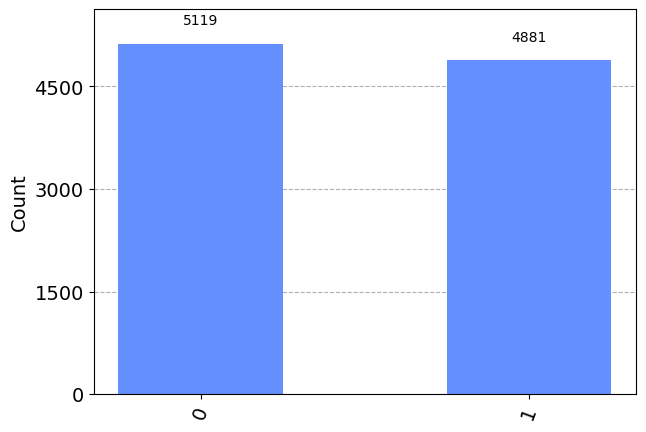

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5593749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

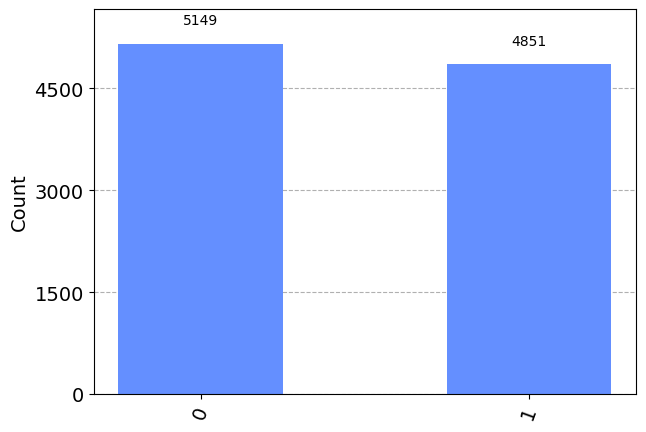

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5499999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

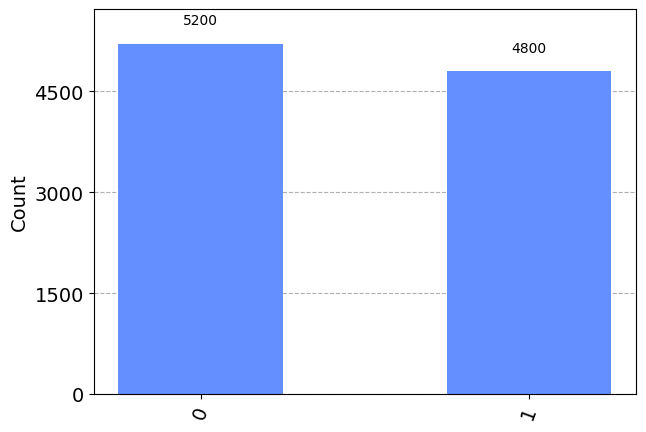

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5406249999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

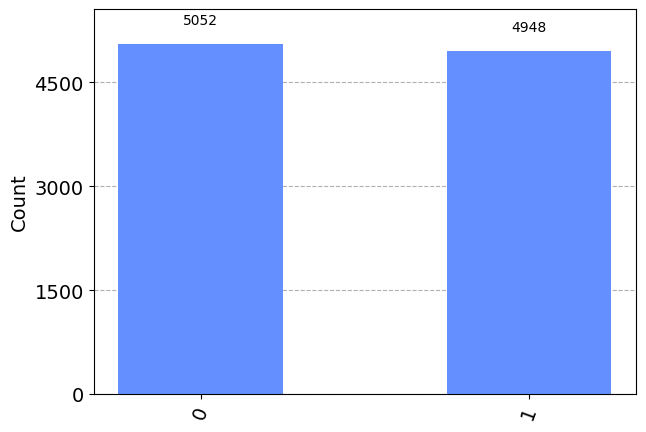

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.53125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.03125, Circuit = 
    

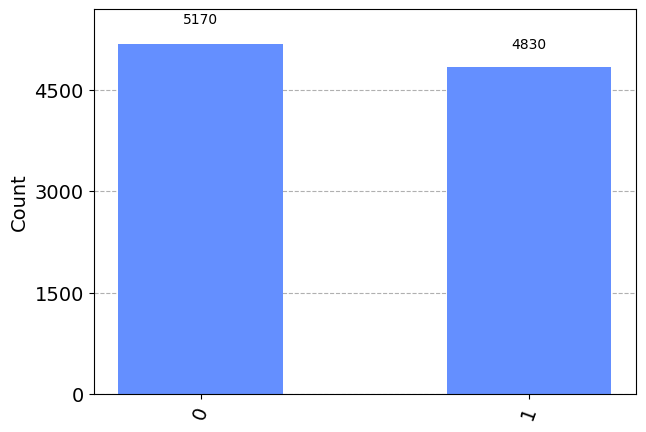

--------------------------------------------------------------------------------------------------------------


In [12]:
results = []
    
#Second experiment Swap Test
noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,2,['cx'])

swap_test = get_swap_test(1,[sqrt(0.3),sqrt(0.7)],[sqrt(0.6),sqrt(0.4)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('Second experiment Swap Test:')
display(swap_test.draw('mpl'))
print('Second experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,2,['cx'])
    #print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('First Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')

In [13]:
#SIMILARITIES RATE CALCULATIONS FOR EACH SIMULATION
successCounts2=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts2.append(count)
#print(results)
#print(successCounts2)

In [14]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 18), ('sx', 8), ('cx', 8), ('measure', 1)])


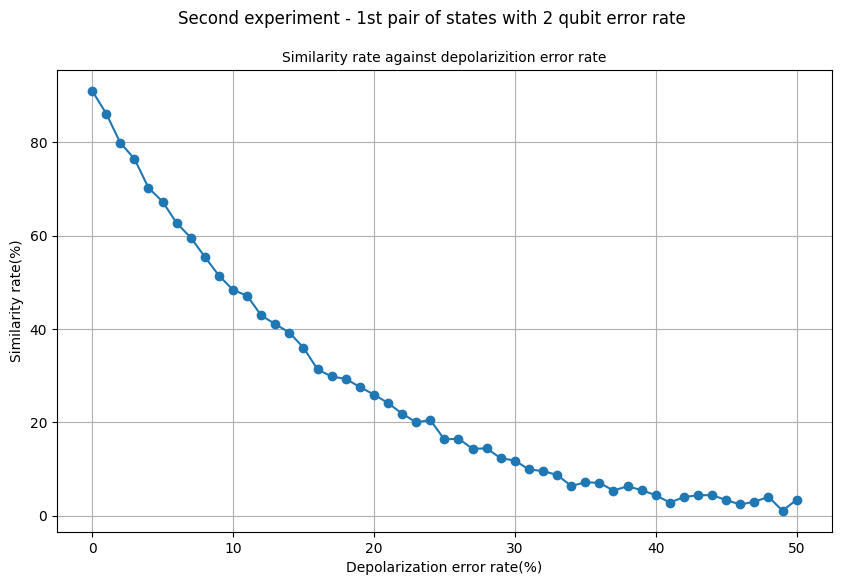

In [15]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts2, marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('Second experiment - 1st pair of states with 2 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Displaying plot
plt.grid(True)
plt.show()

### 4.3.   Third experiment - 2nd pair of states with 1 qubit error rate

The states to compare are $\begin{bmatrix} 
\sqrt{0.1}  \\
\sqrt{0.2} \\
\sqrt{0.6} \\
\sqrt{0.1} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0 \\
\sqrt{0.5} \\
\sqrt{0.1} \\
\sqrt{0.4} \\
\end{bmatrix} $ . Each one of 2 qubits.

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
Third experiment Swap Test:


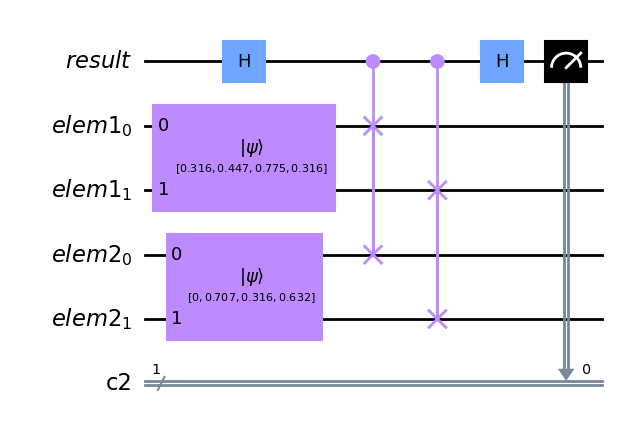

Third experiment TRANSPILED Swap Test:


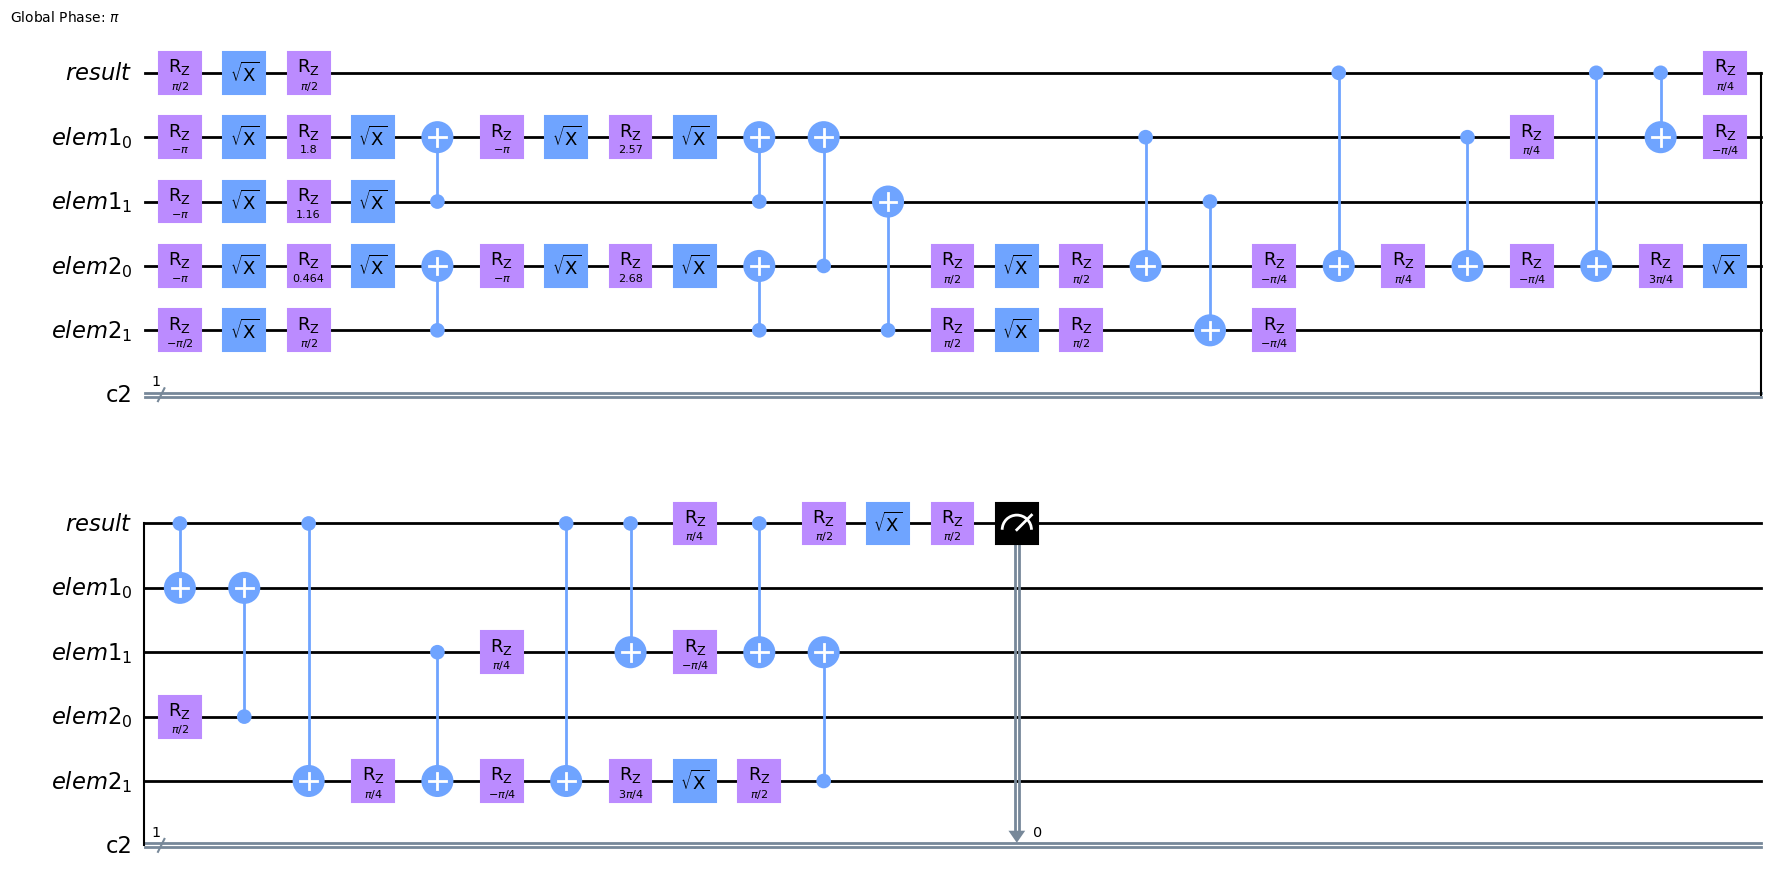

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
NoiseModel: Ideal
Third Experiment Counts:


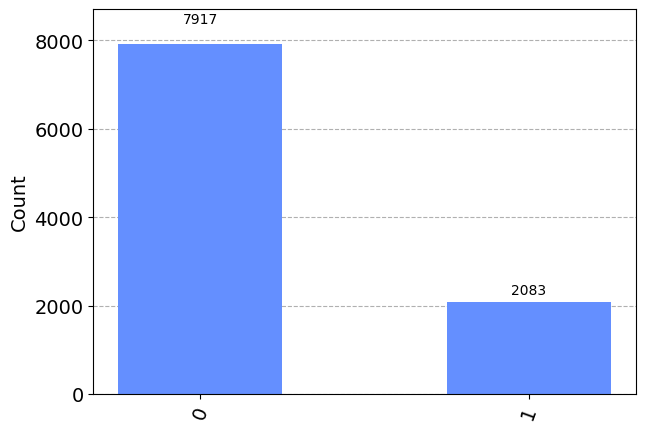

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9925000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


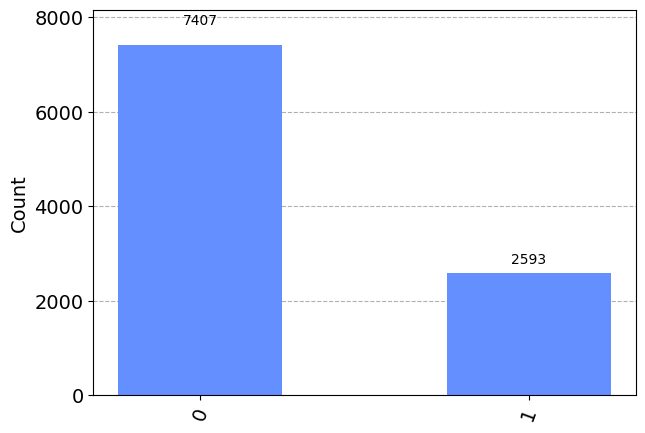

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


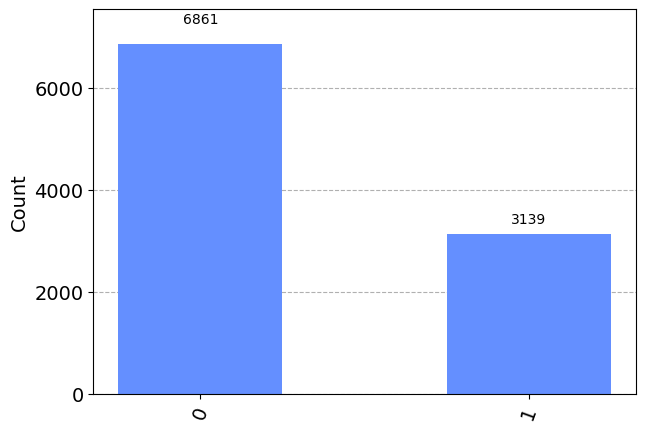

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9775000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


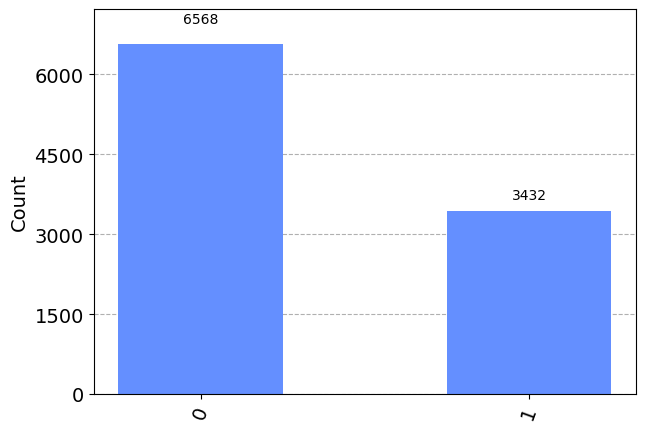

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.97, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.01, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.01, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.01, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


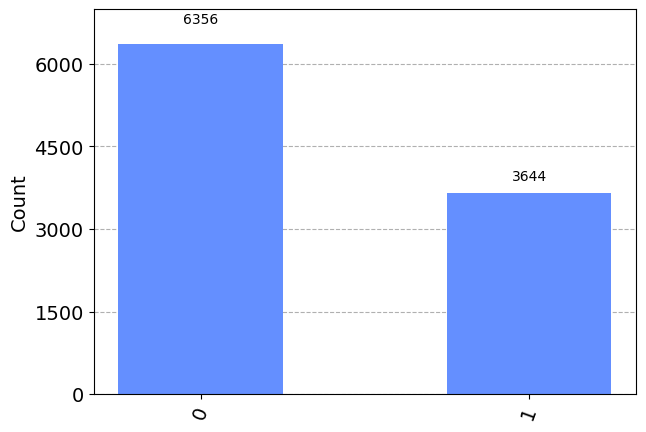

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9625000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


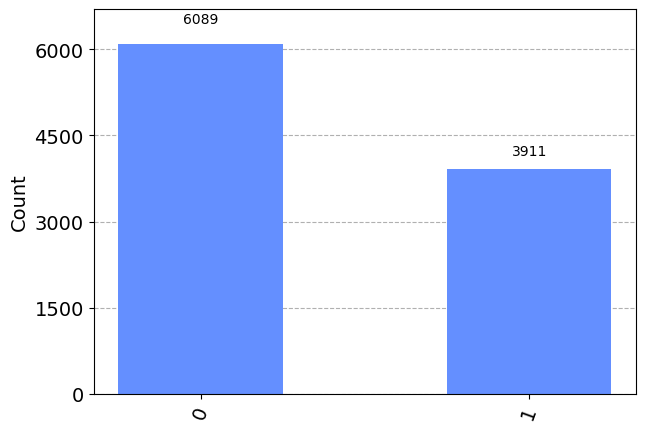

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.955, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.015, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.015, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.015, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


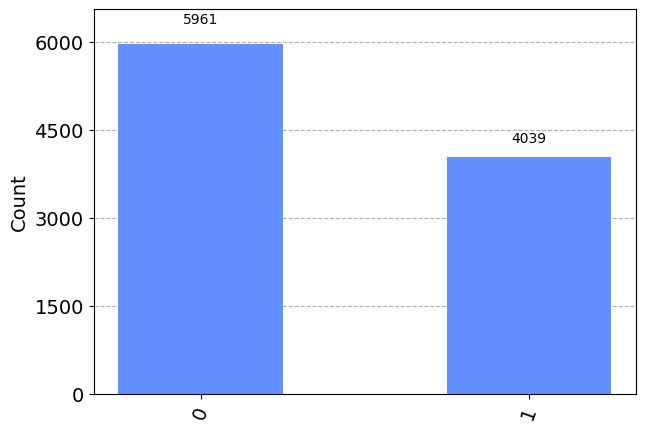

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


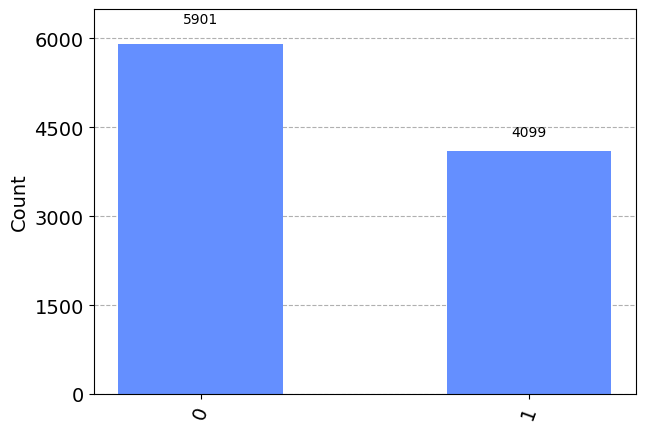

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.94, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.02, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.02, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.02, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


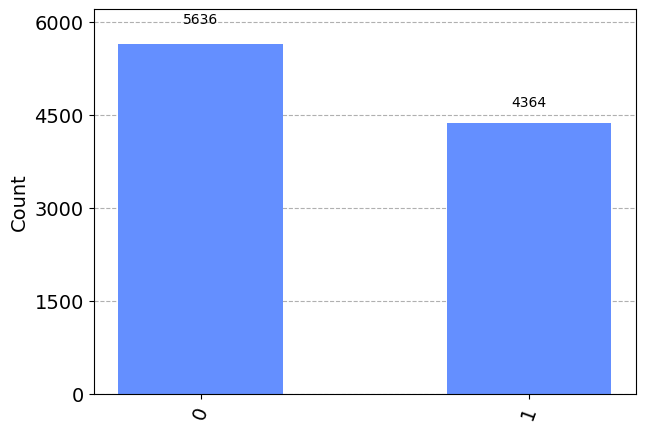

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9325000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


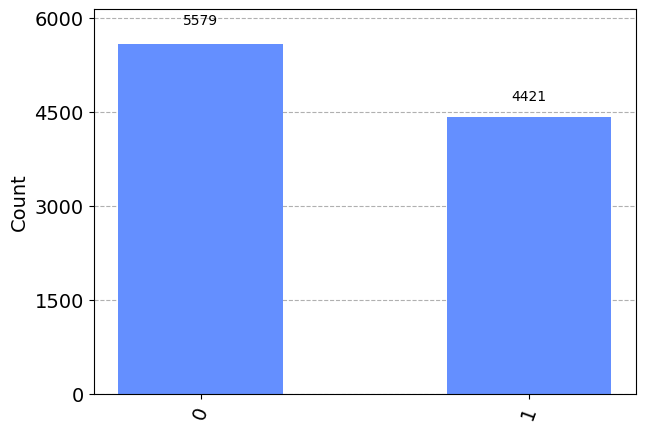

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


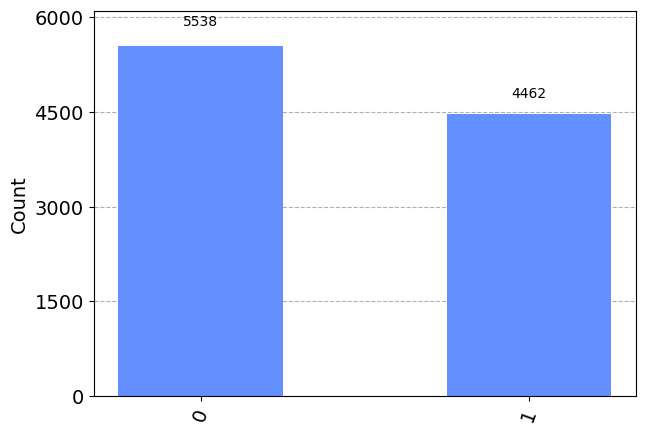

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9175000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


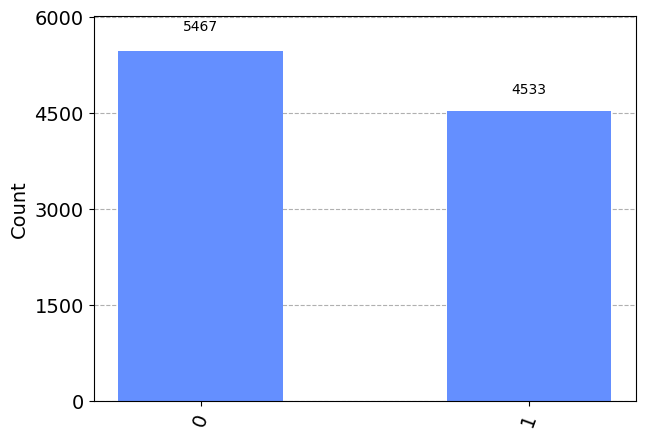

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.91, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


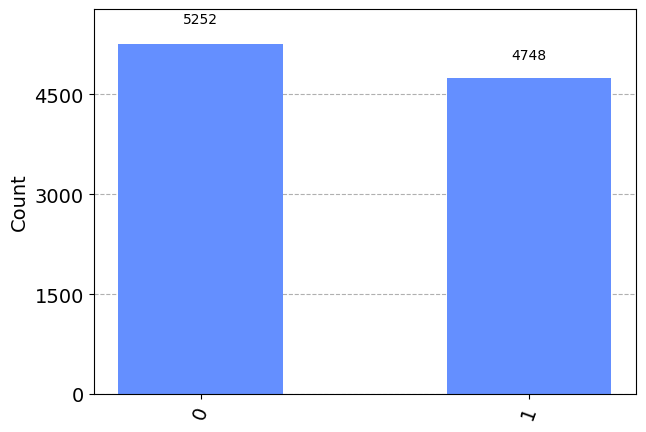

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9025000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


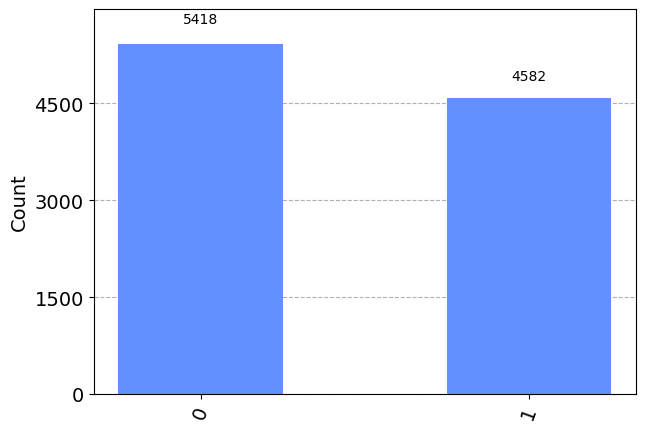

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.895, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.035, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.035, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.035, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


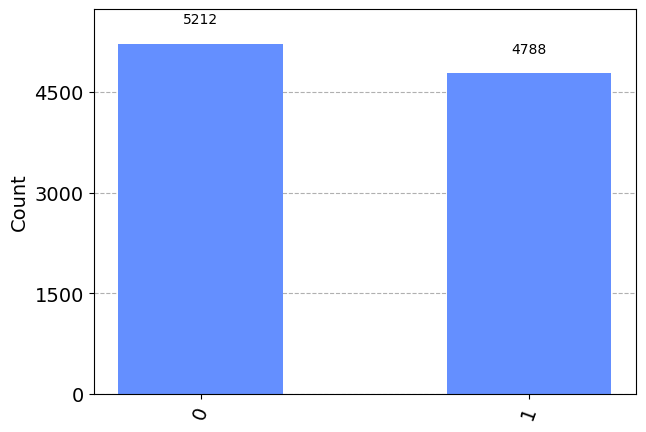

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8875000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


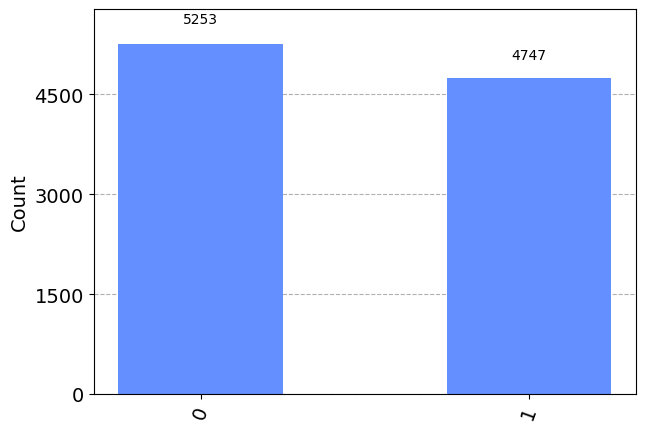

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.88, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


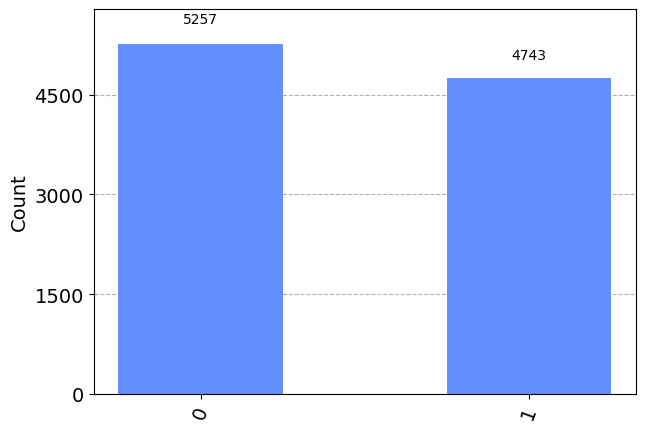

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8725, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


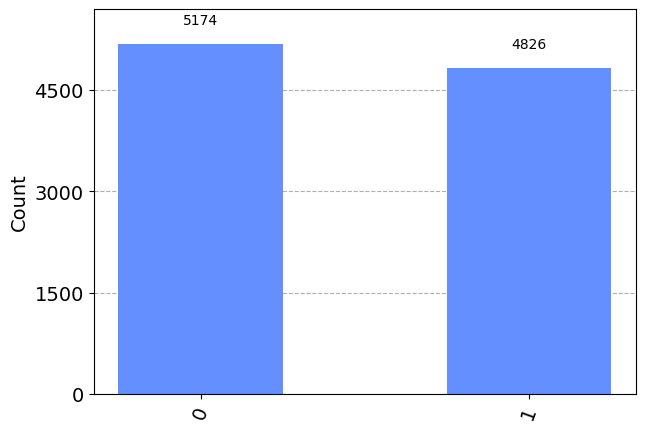

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.865, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.045, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.045, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.045, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


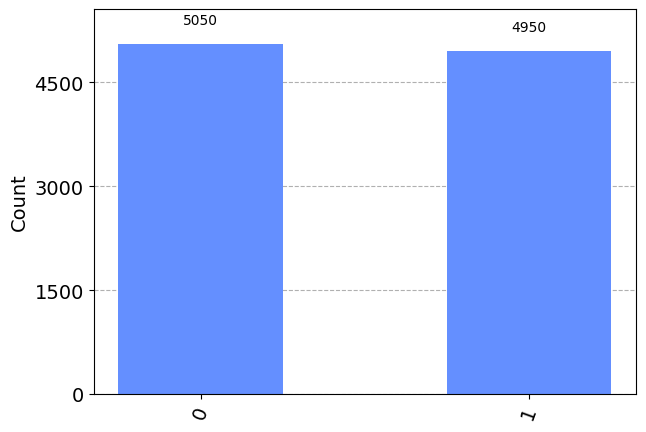

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8575, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


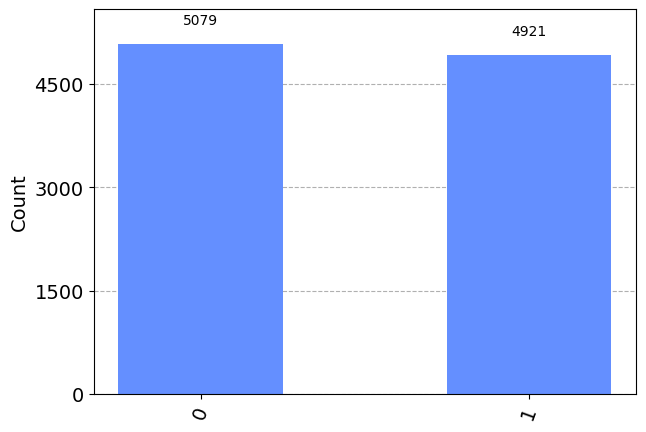

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.05, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


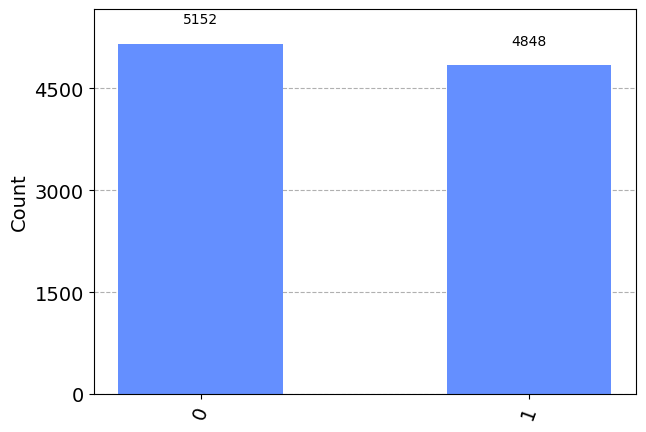

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8425, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0525, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


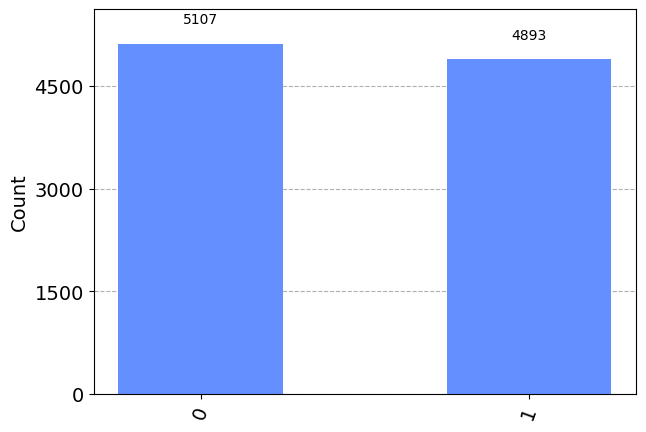

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.835, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.055, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.055, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.055, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


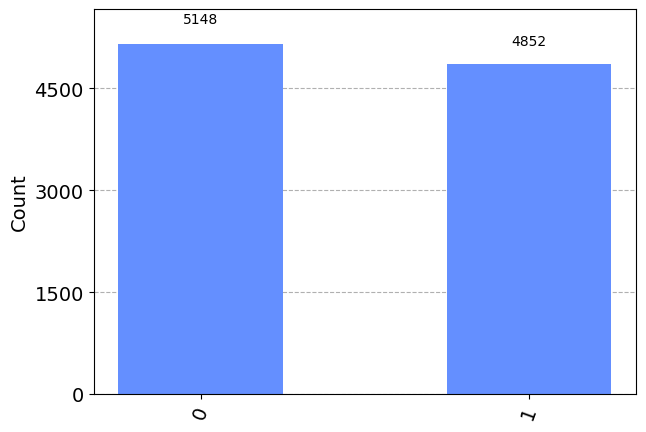

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8275, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0575, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


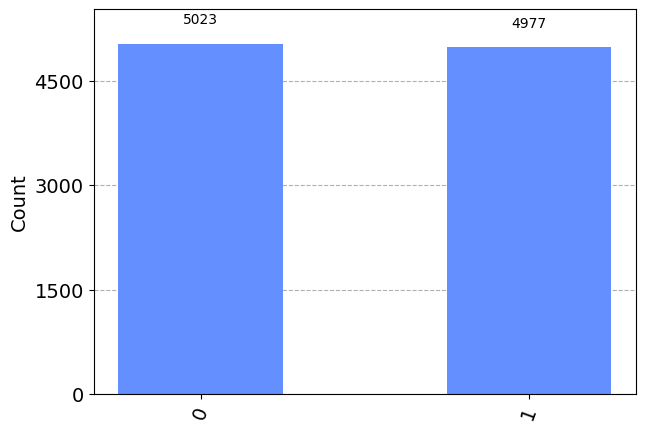

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8199999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


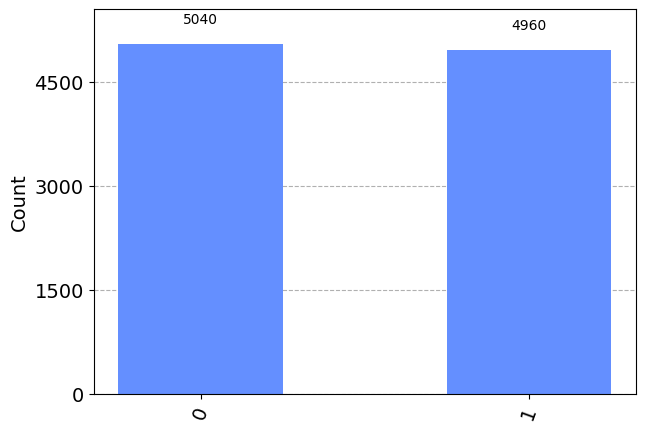

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8125, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0625, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


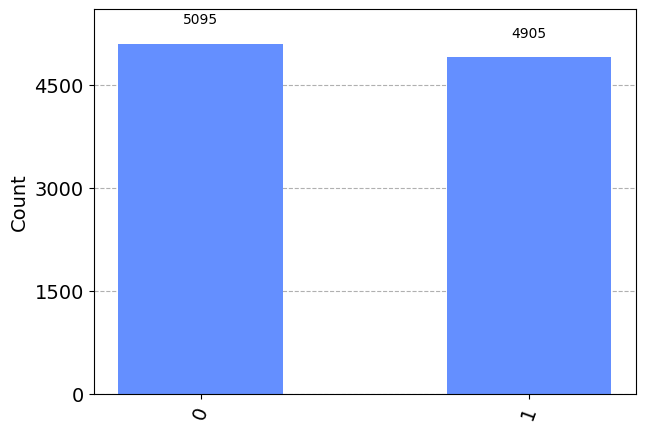

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8050000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


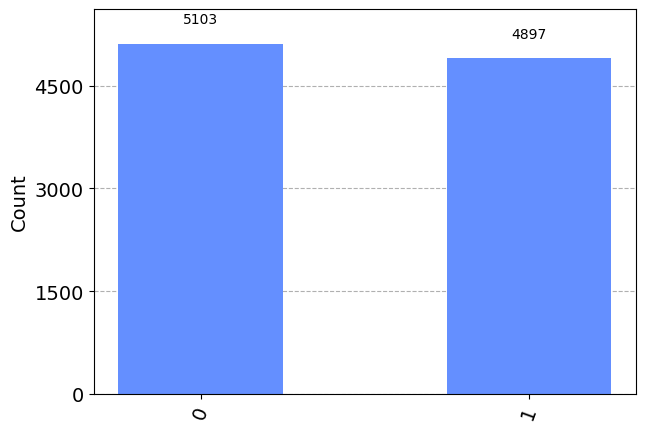

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7975, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0675, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


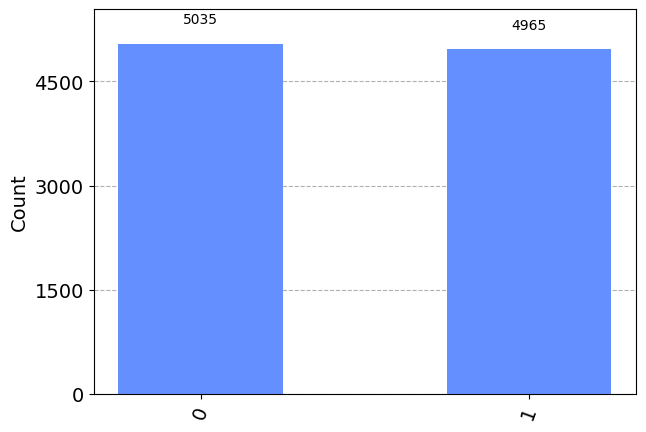

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7899999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


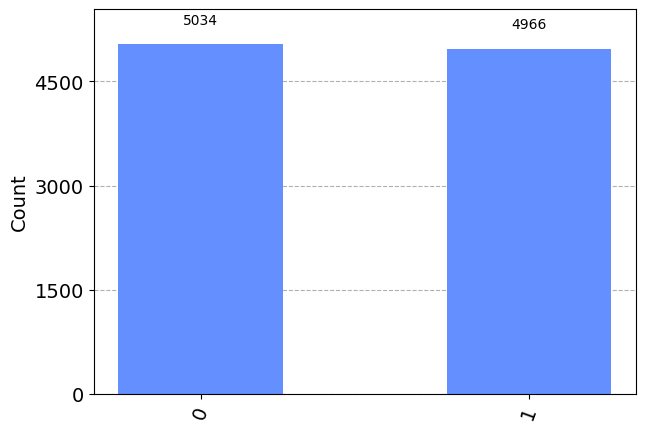

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7825, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0725, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


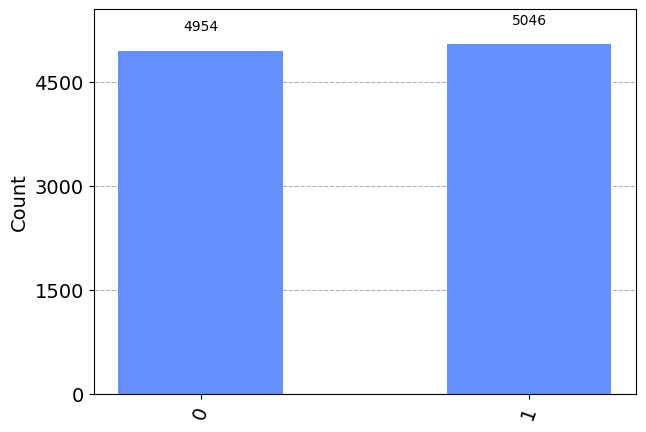

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7750000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


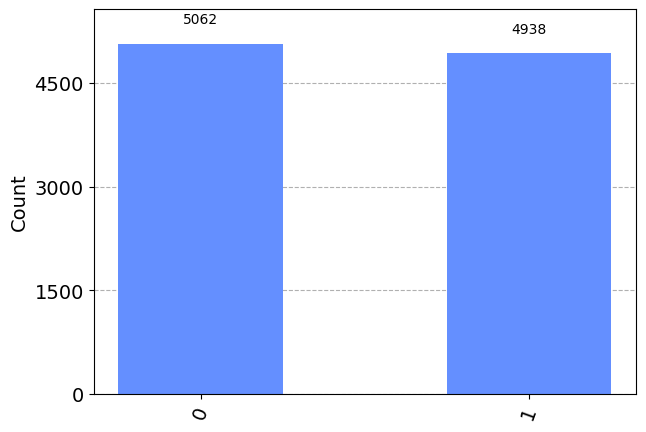

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7675, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0775, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


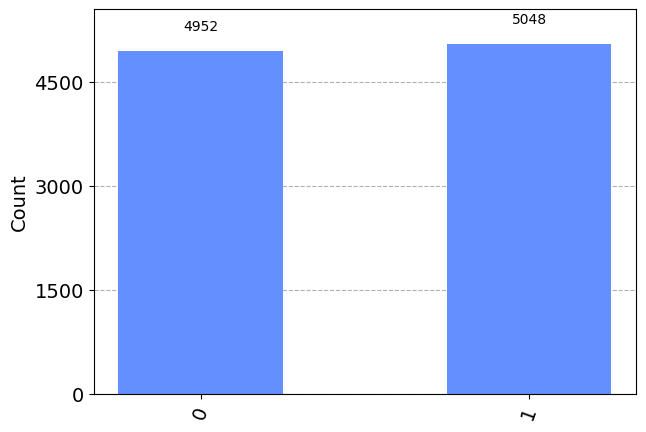

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7600000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


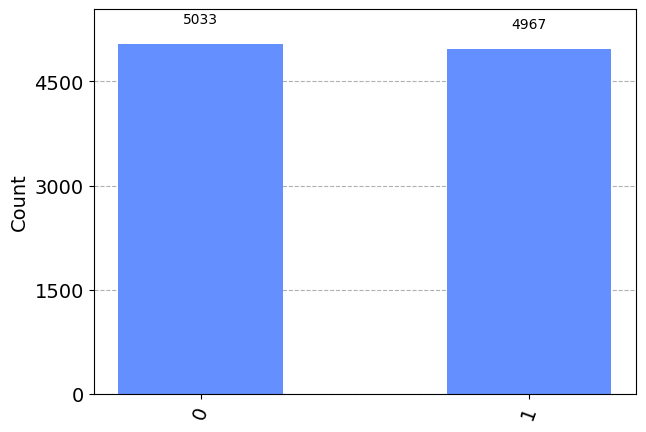

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7525, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0825, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


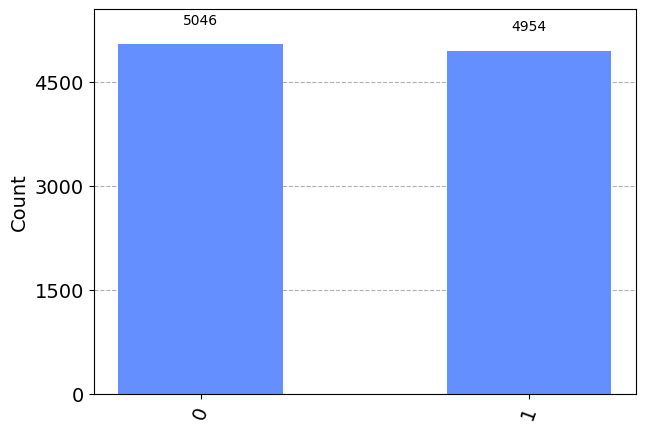

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.745, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


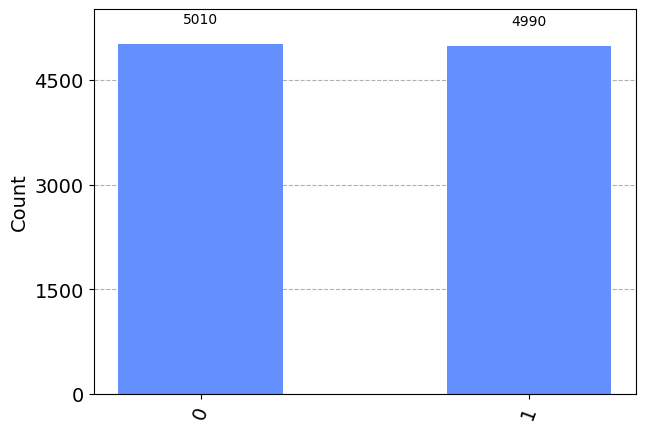

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7375, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0875, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


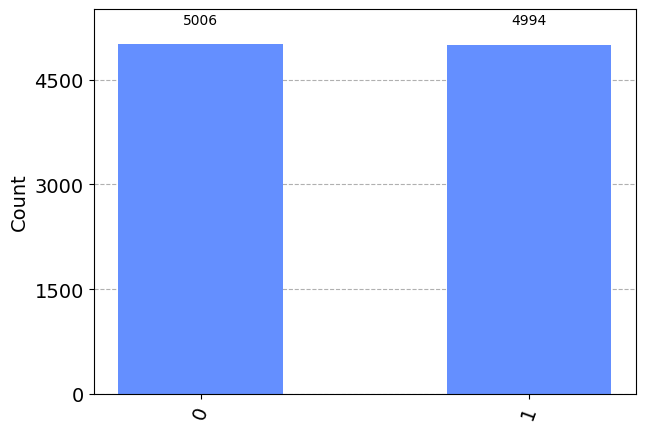

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7300000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


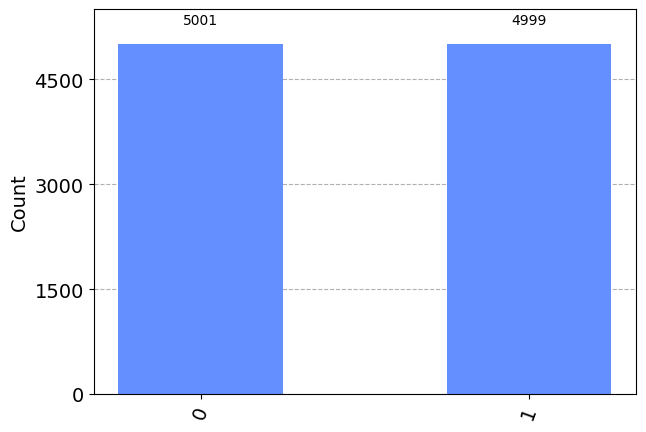

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7224999999999999, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0925, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


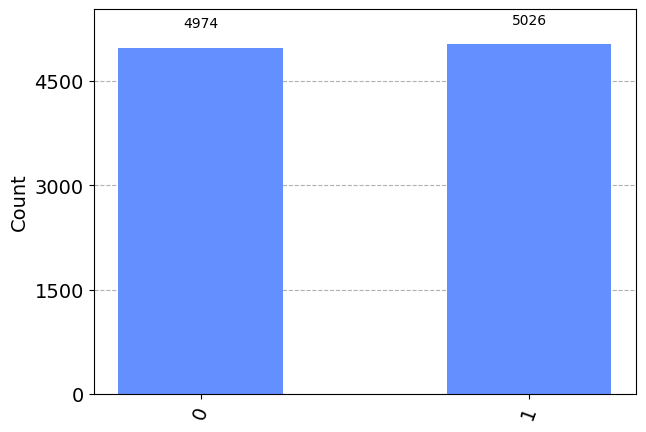

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7150000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


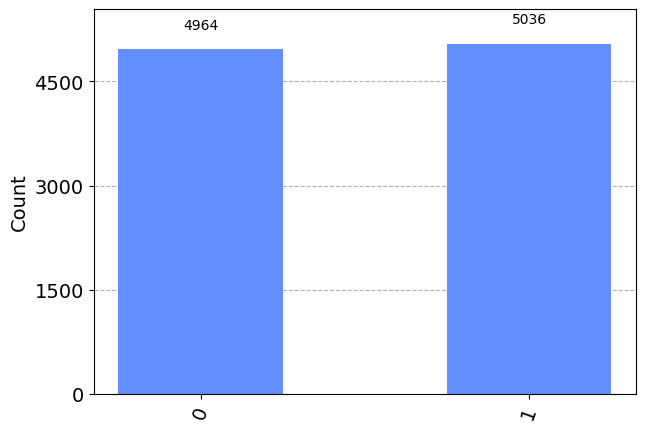

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7075, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0975, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


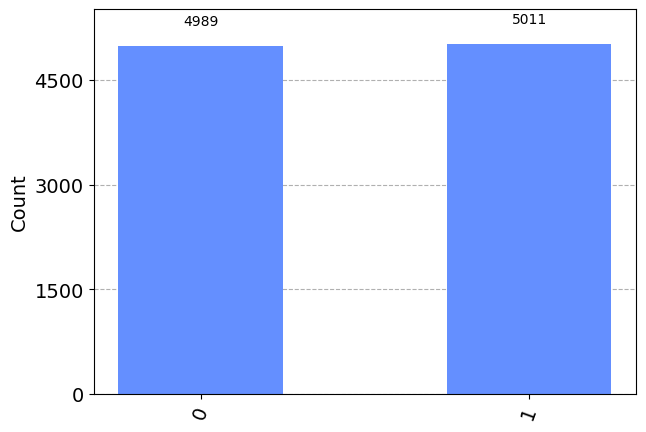

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7000000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


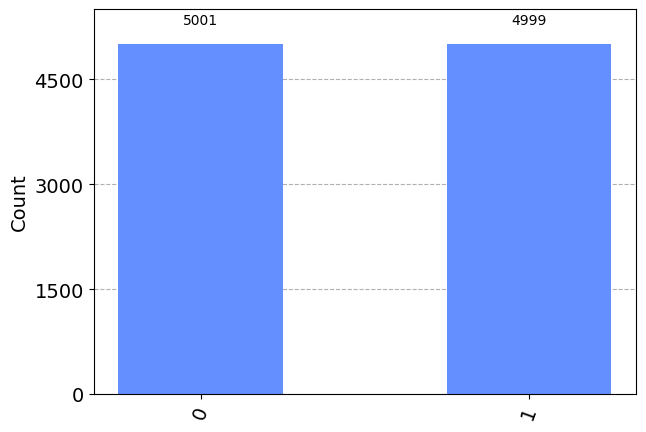

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


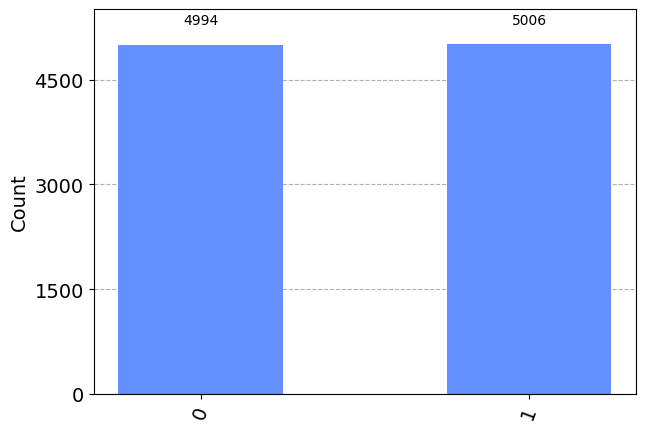

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.685, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.105, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.105, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.105, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


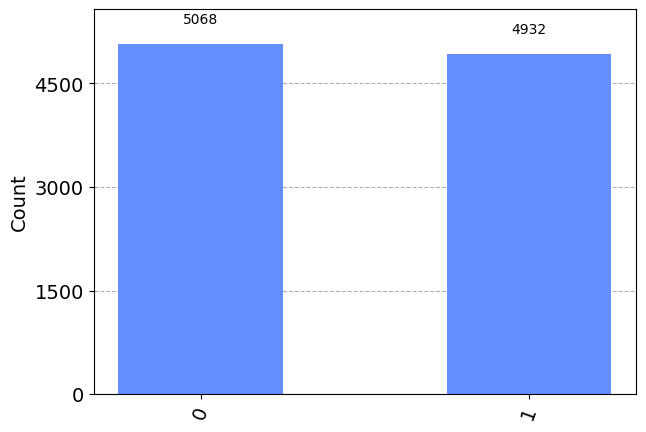

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6775, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1075, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


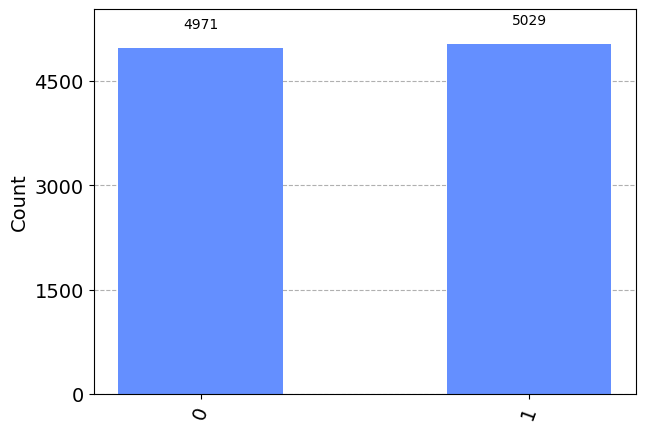

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.67, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


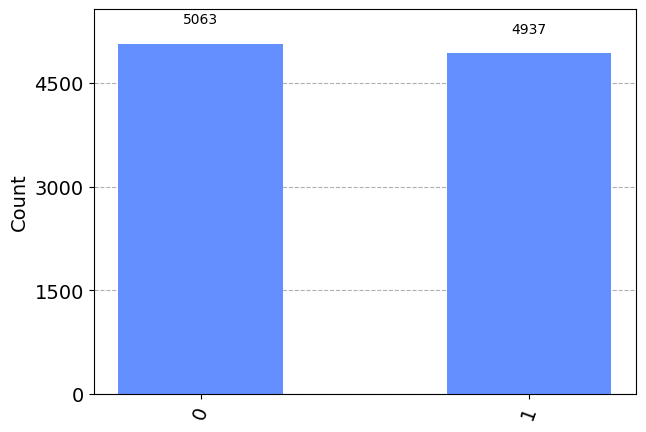

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


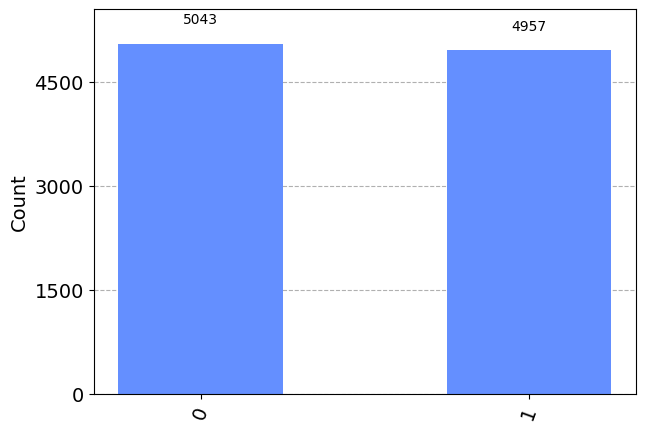

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.655, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.115, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.115, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.115, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


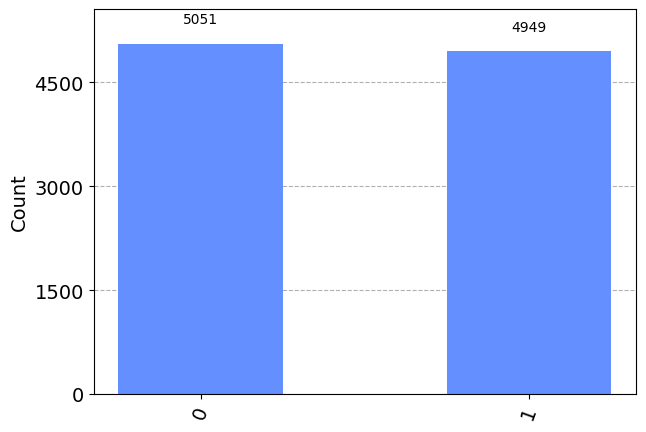

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


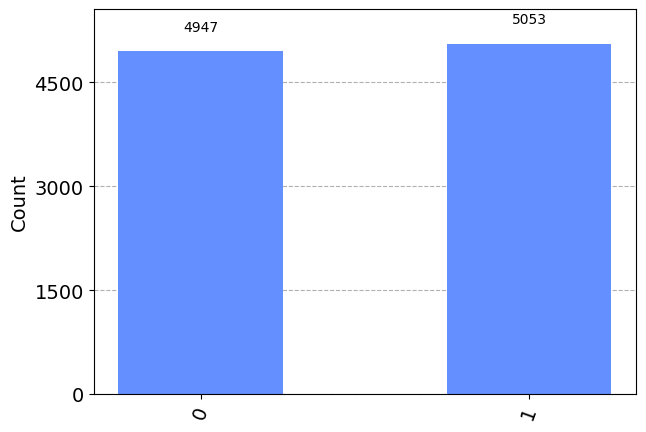

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.64, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


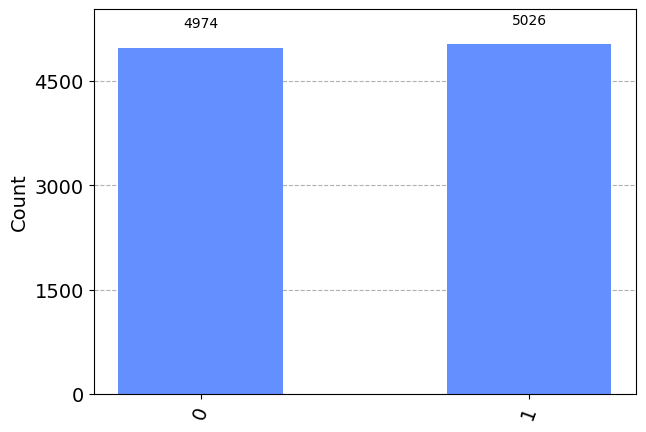

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6325, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


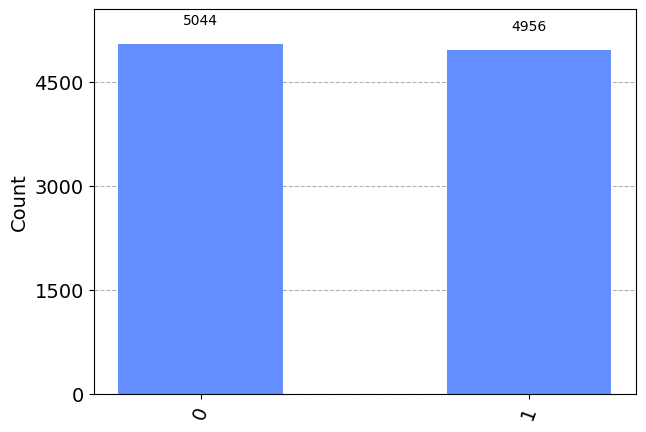

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Third Experiment Counts:


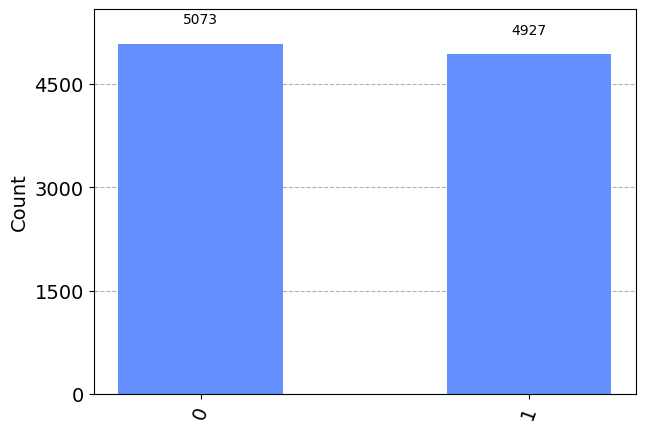

--------------------------------------------------------------------------------------------------------------


In [16]:
#Third experiment Swap Test
noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,1,['id','h','rz','sx'])

swap_test = get_swap_test(2,
                          [sqrt(0.1),sqrt(0.2),sqrt(0.6),sqrt(0.1)],
                          [0,sqrt(0.5),sqrt(0.1),sqrt(0.4)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('Third experiment Swap Test:')
display(swap_test.draw('mpl'))
print('Third experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

results = []
for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,1,['id','h','rz','sx'])
    print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('Third Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')

In [17]:
#SIMILARITIES RATE CALCULATIONS FOR EACH SIMULATION
successCounts3=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts3.append(count)
#print(results)
#print(successCounts3)

In [18]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']+ops['h']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 26), ('cx', 20), ('sx', 11), ('h', 6), ('measure', 1)])


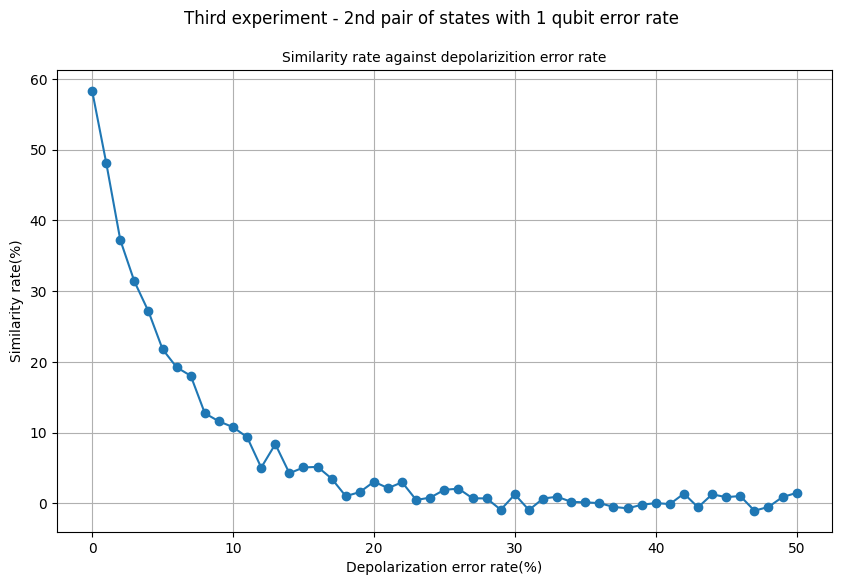

In [19]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts3, marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('Third experiment - 2nd pair of states with 1 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Displaying plot
plt.grid(True)
plt.show()

### 4.4.   Fourth Experiment - 2nd pair of states with 2 qubit error rate

QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
Fourth experiment Swap Test:


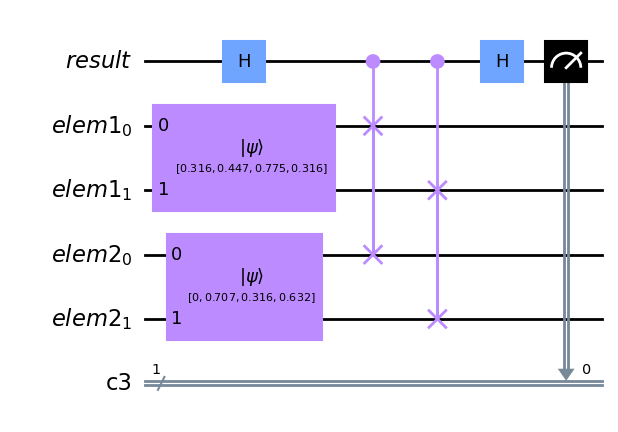

Fourth experiment TRANSPILED Swap Test:


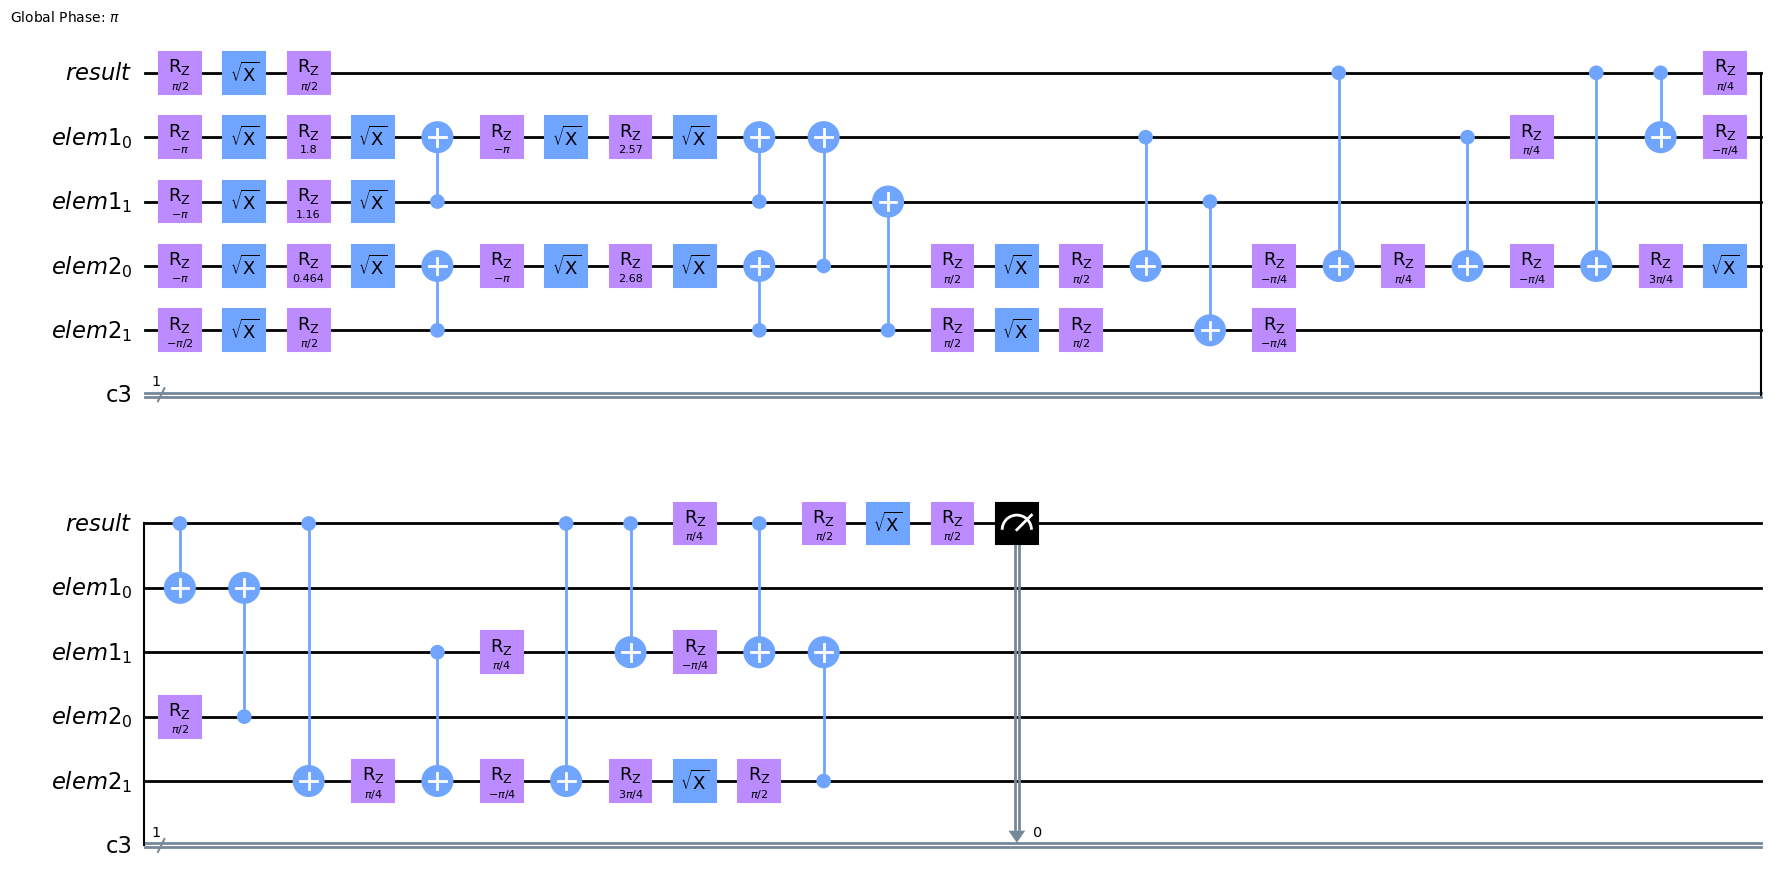

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
NoiseModel: Ideal
Fourth Experiment Counts:


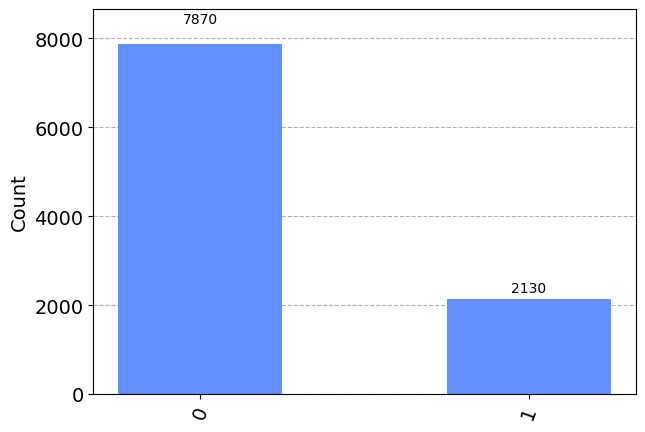

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9906250000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

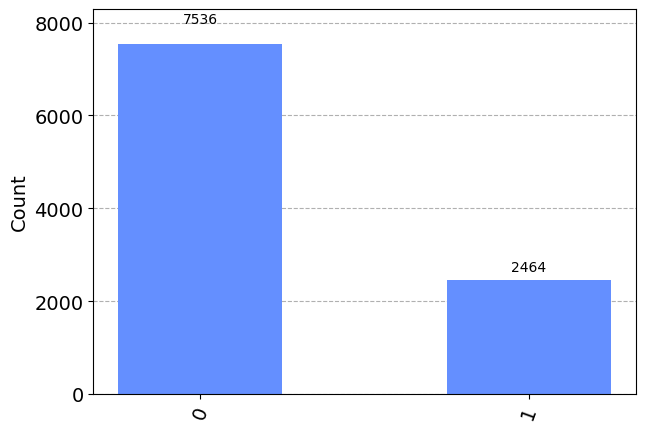

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9812500000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

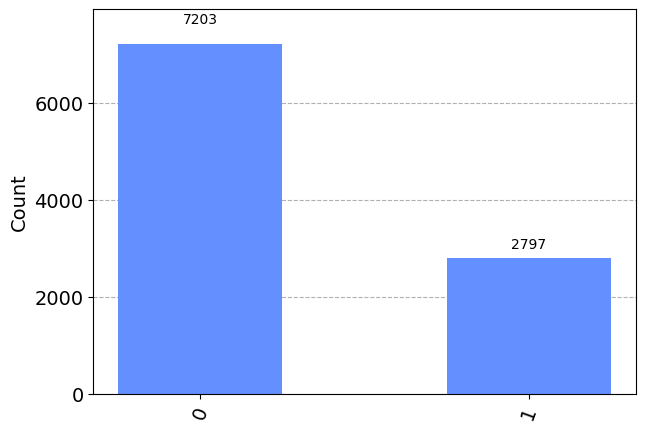

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9718750000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

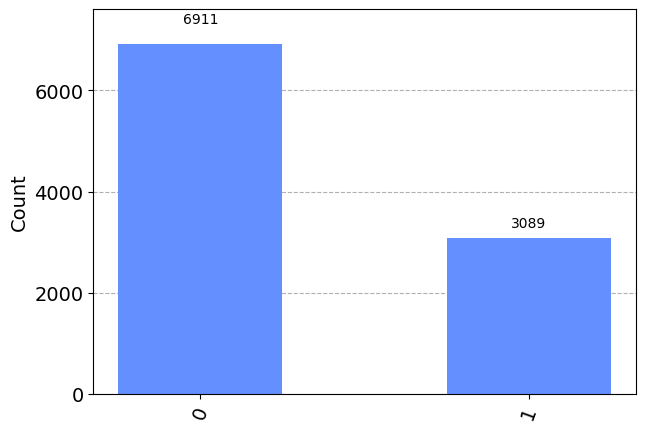

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9625000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

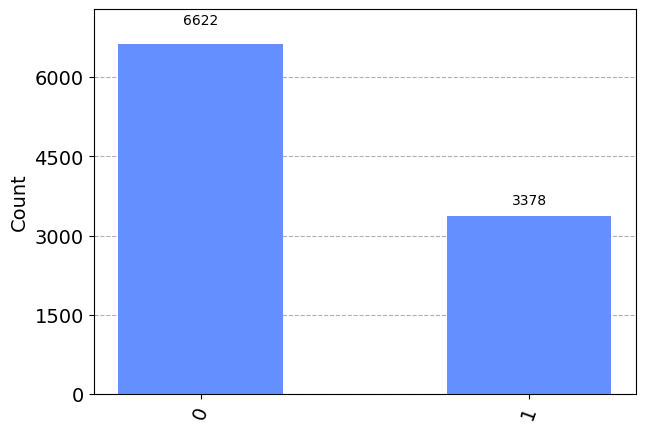

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9531249999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

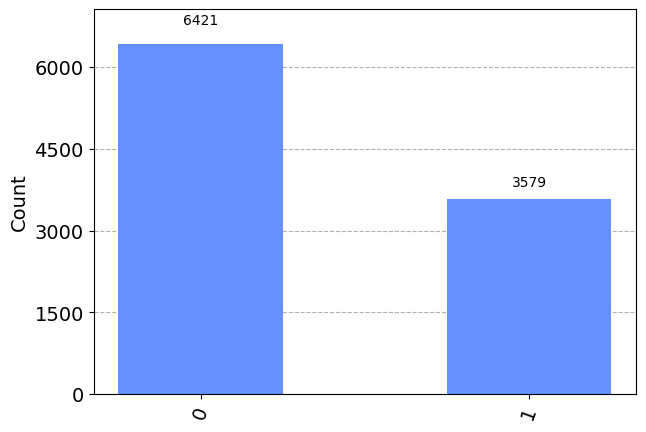

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9437499999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

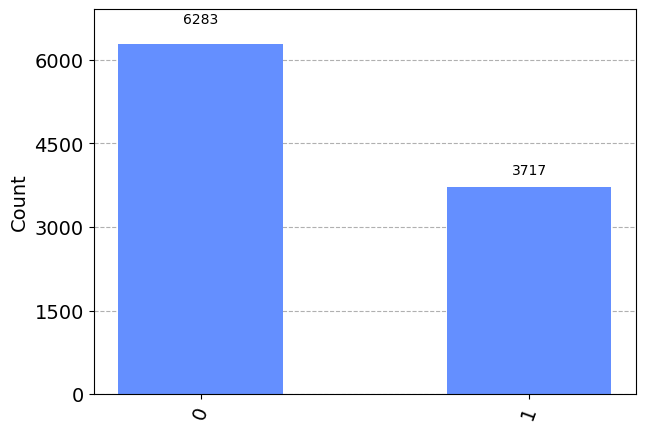

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9343749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

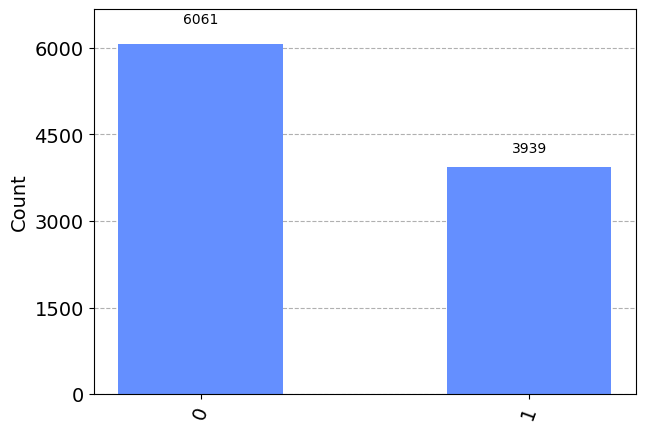

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.005, Circuit = 
     ┌───────────

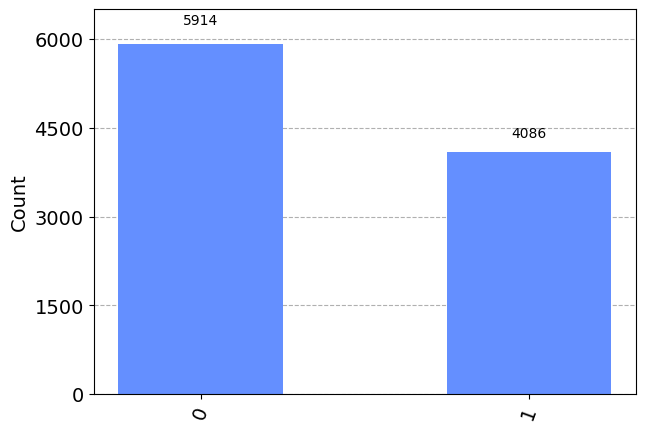

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9156250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

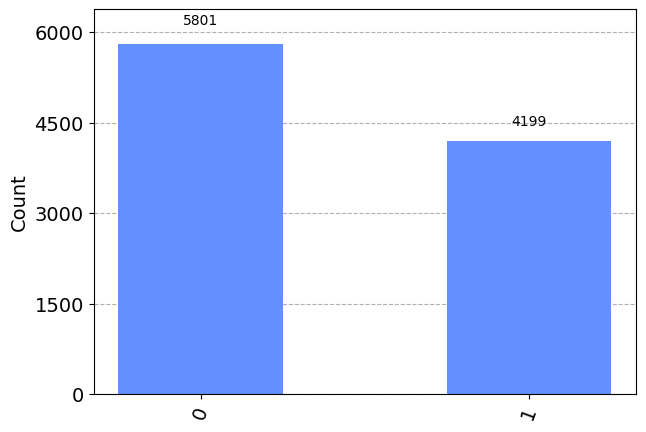

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9062500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

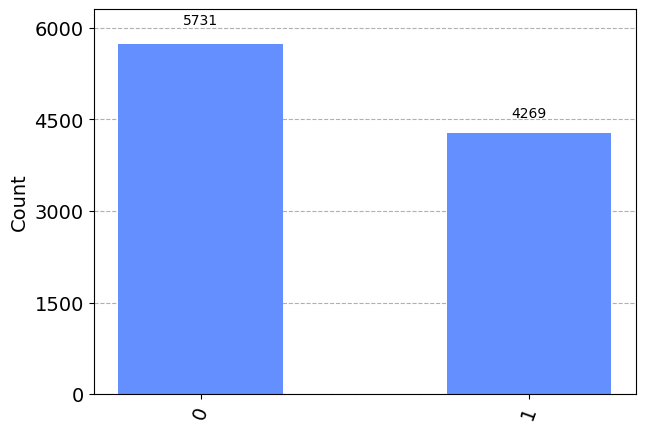

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8968750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

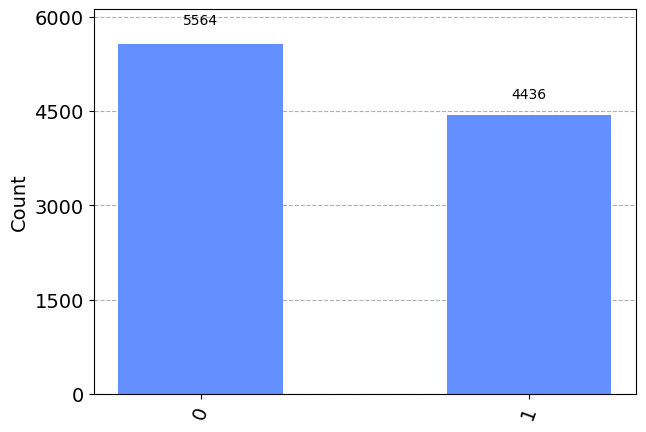

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

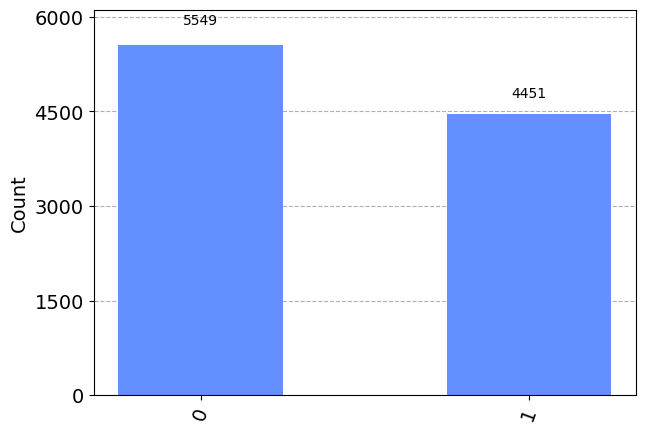

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8781249999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

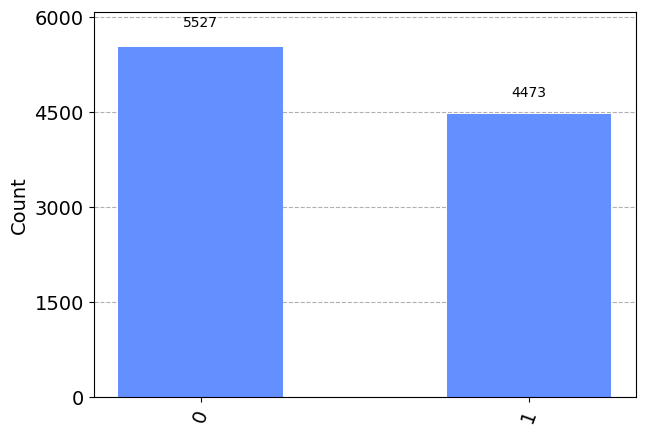

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8687499999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

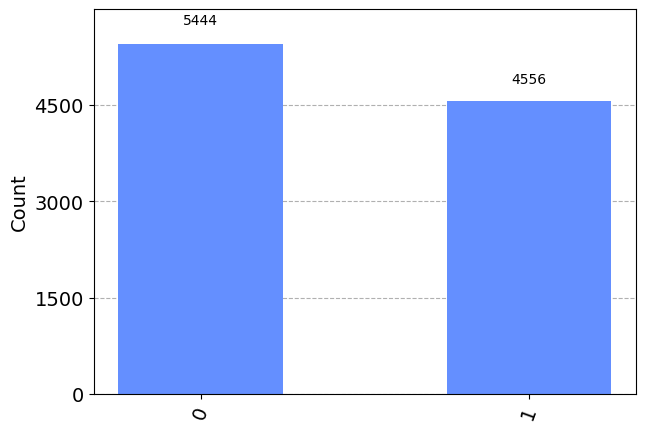

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8593749999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

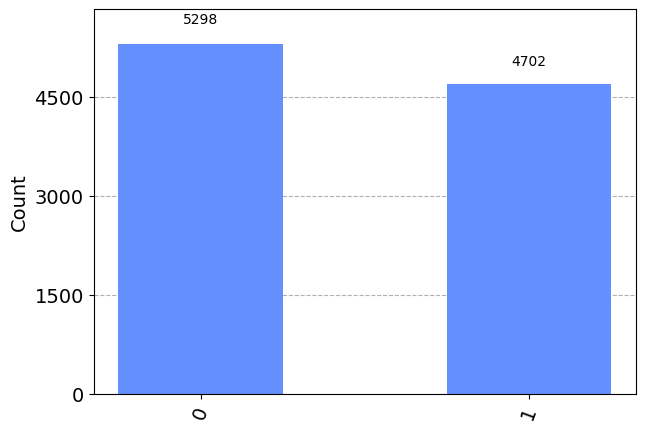

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.01, Circuit = 
     ┌────────────┐
q_0:

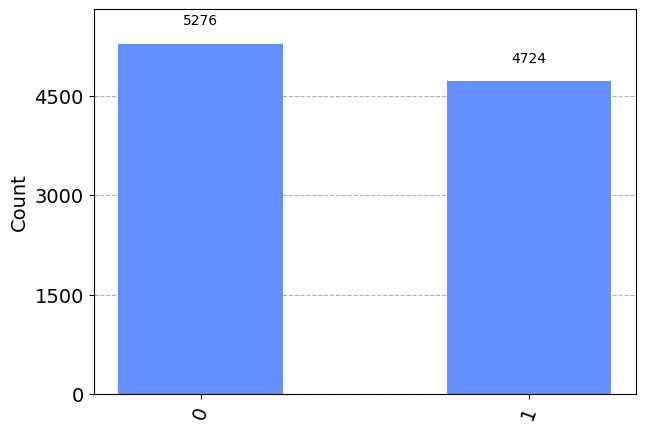

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8406250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

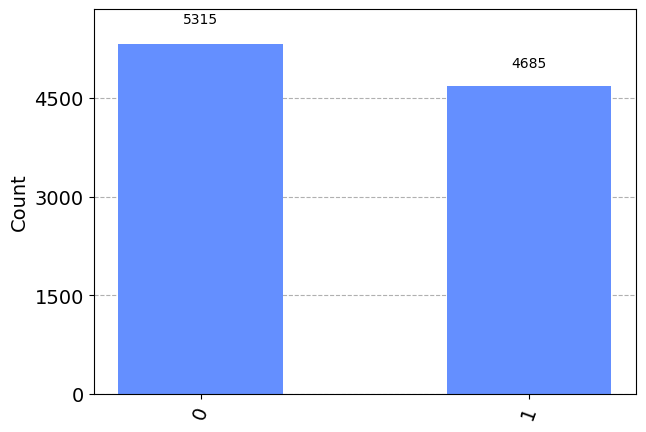

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8312500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

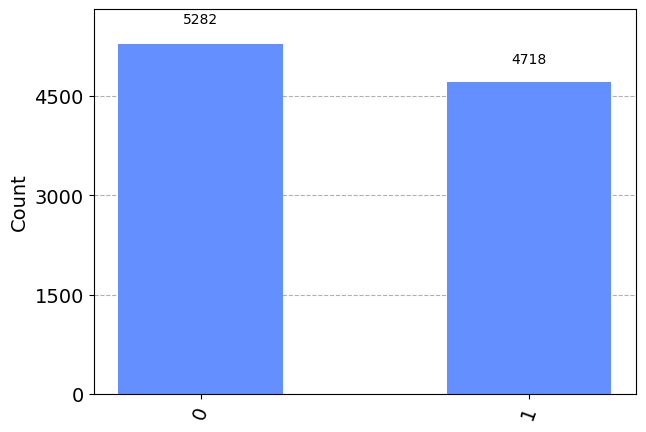

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8218750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

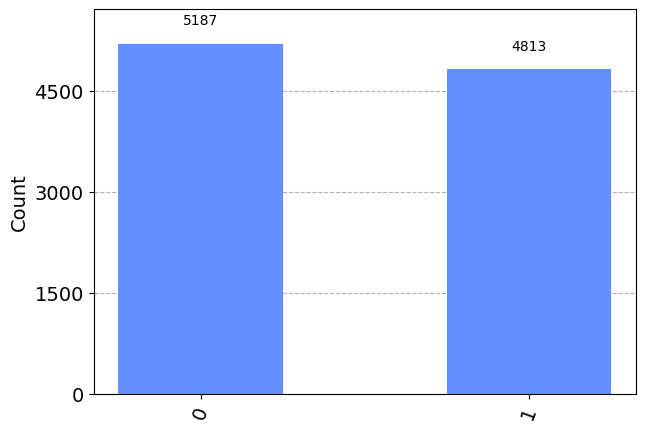

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8125000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_

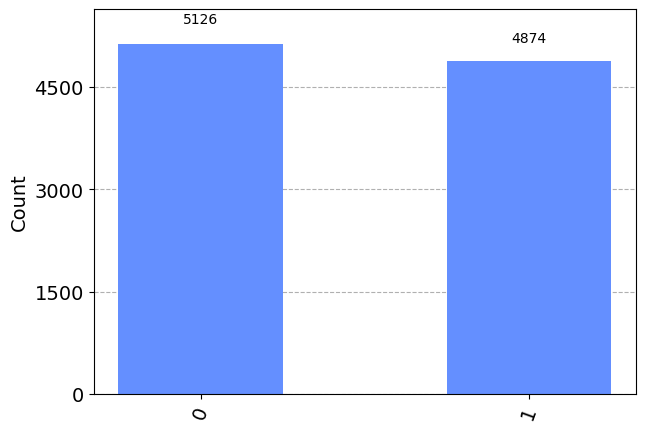

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8031249999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

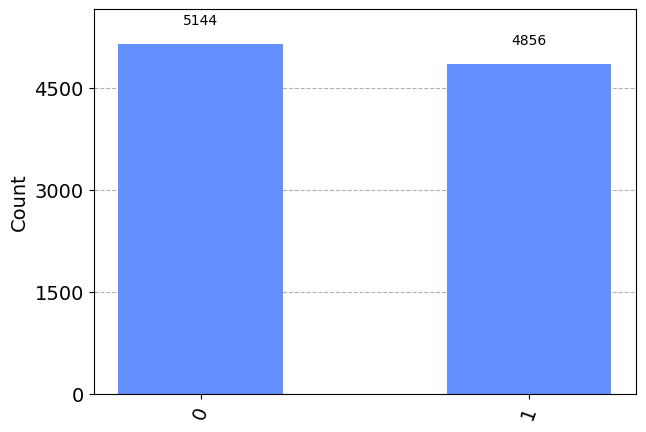

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7937499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

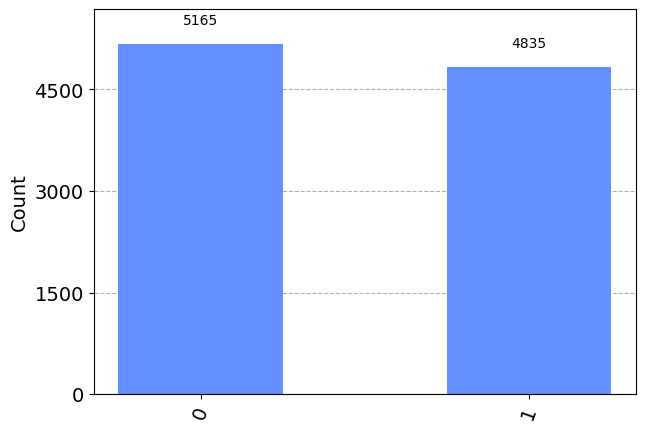

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7843749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

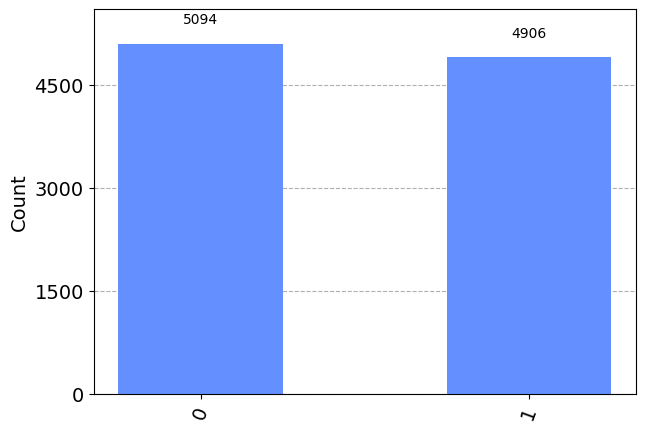

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

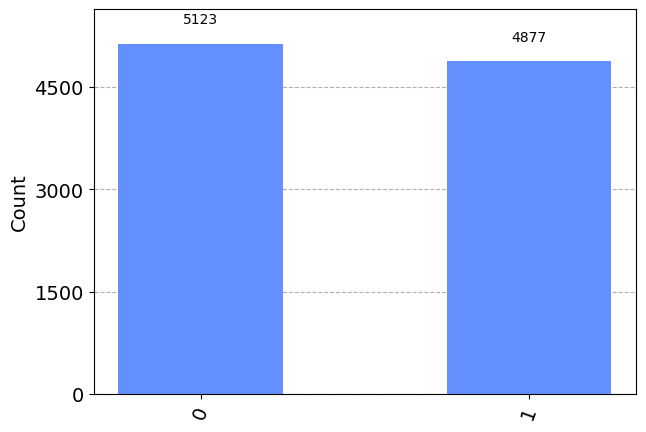

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.765625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.015625, Circuit

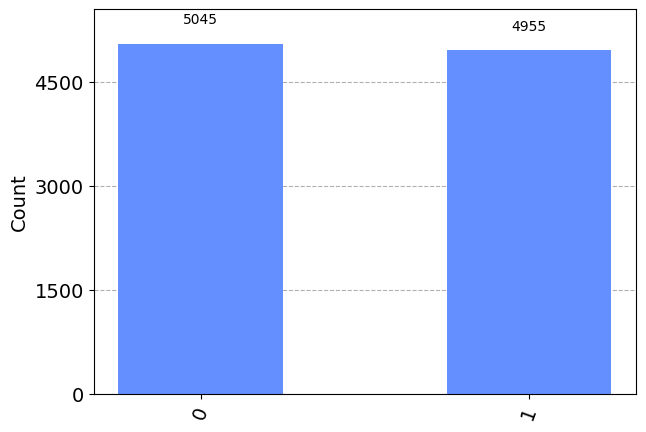

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7562500000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

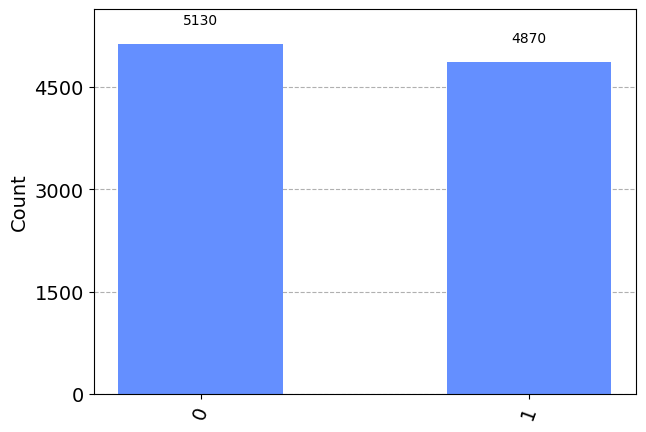

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7468750000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

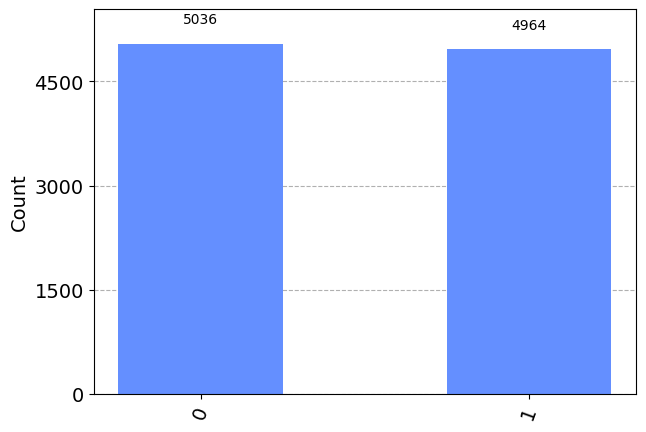

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7375000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

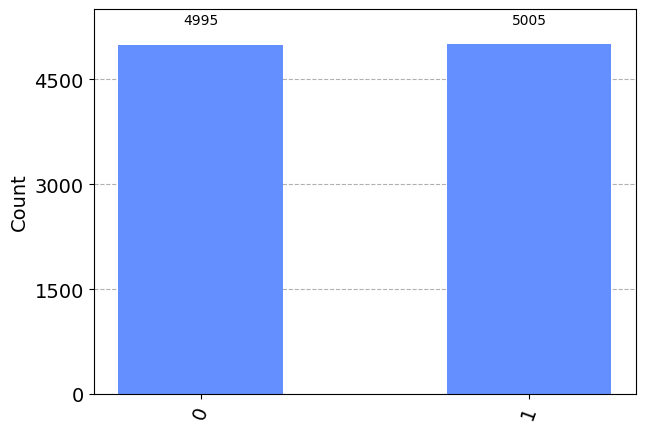

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7281250000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

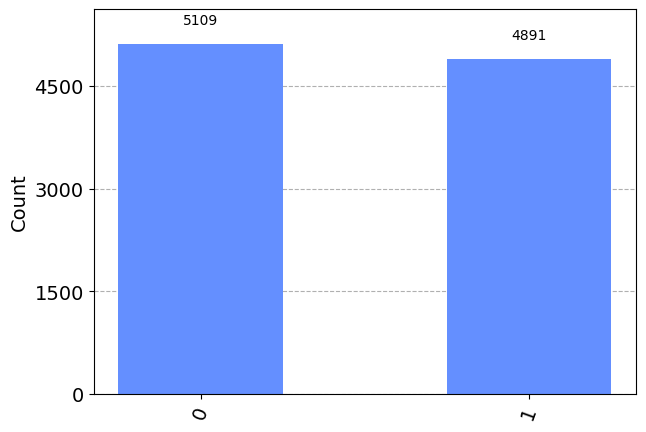

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7187499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

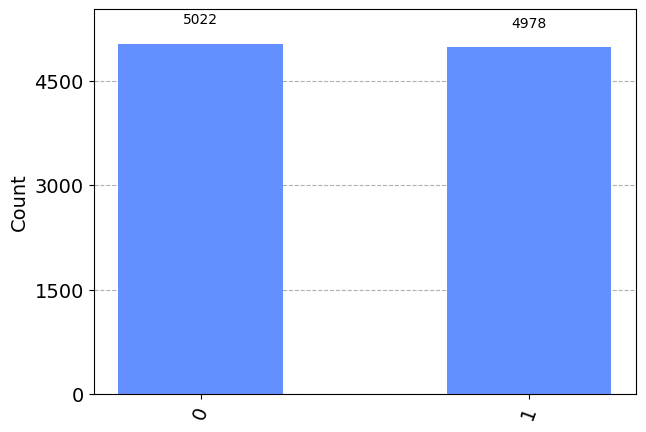

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7093749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

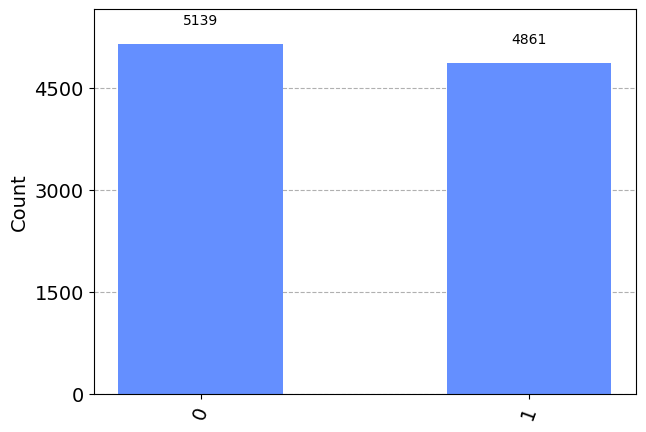

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6999999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

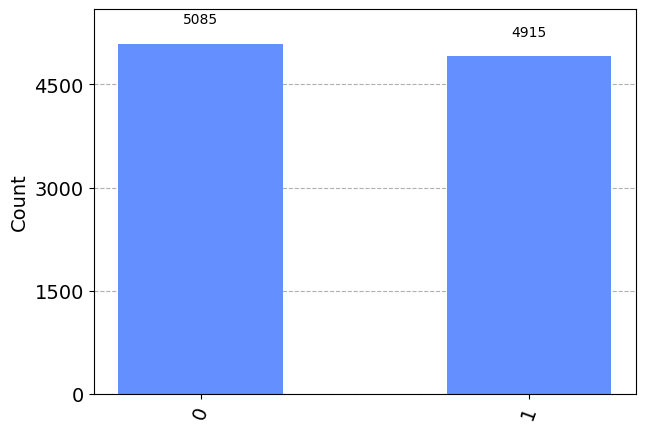

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.690625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.020625, Circuit

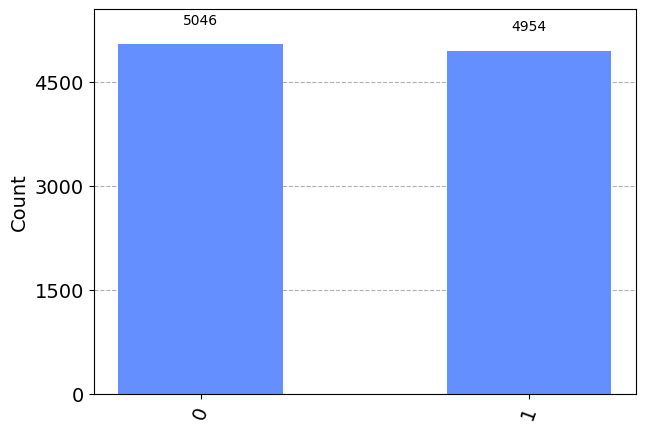

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.68125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1

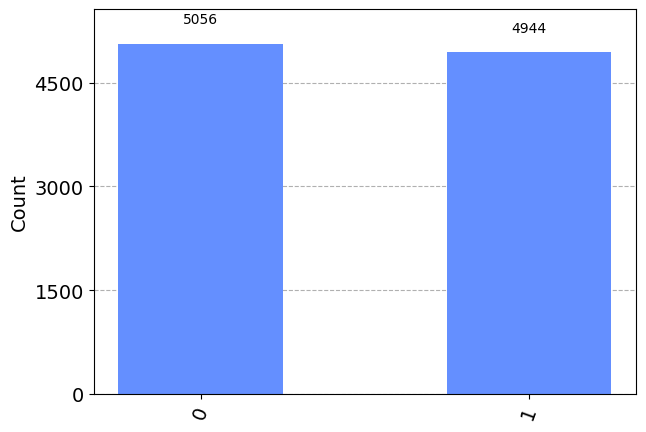

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6718750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

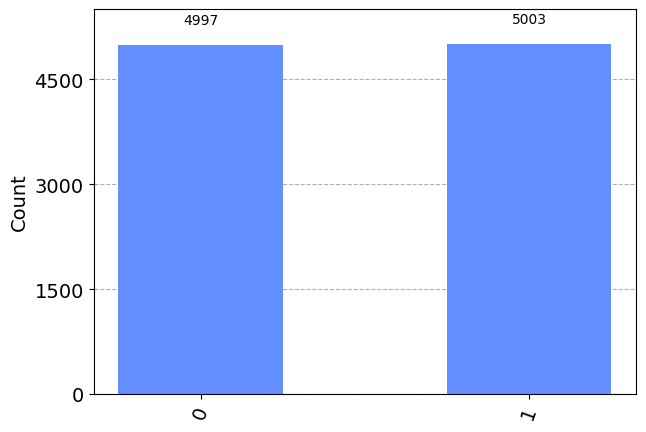

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6625000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

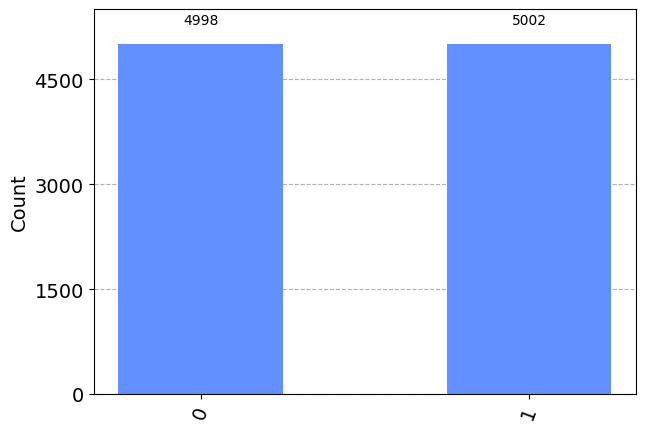

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6531250000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

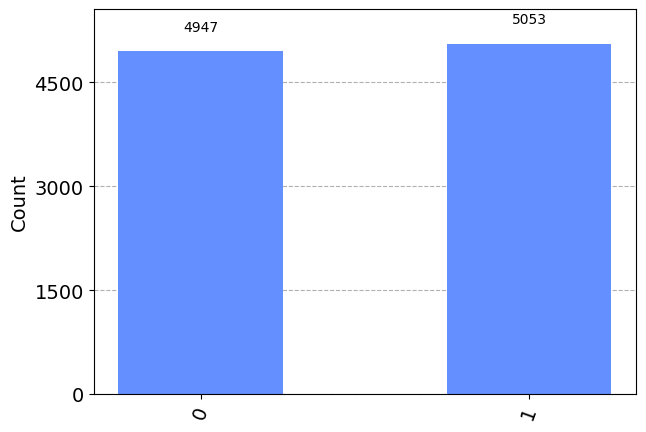

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6437499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

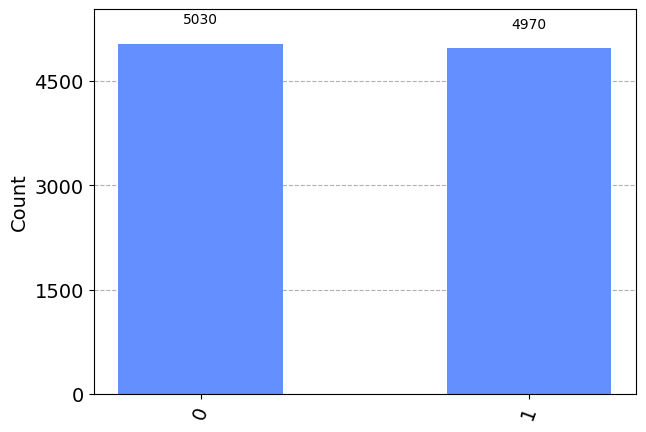

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6343749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

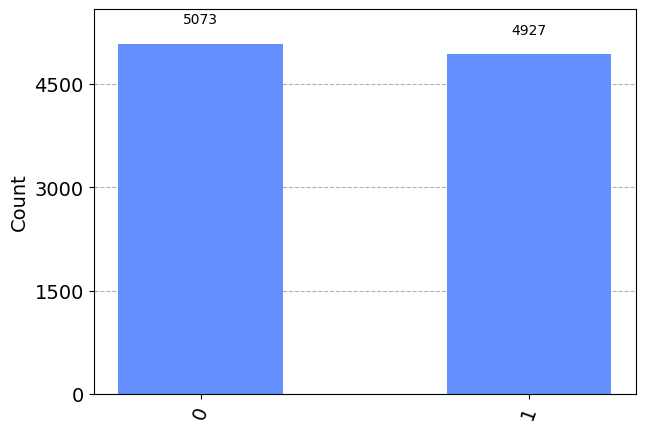

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6249999999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

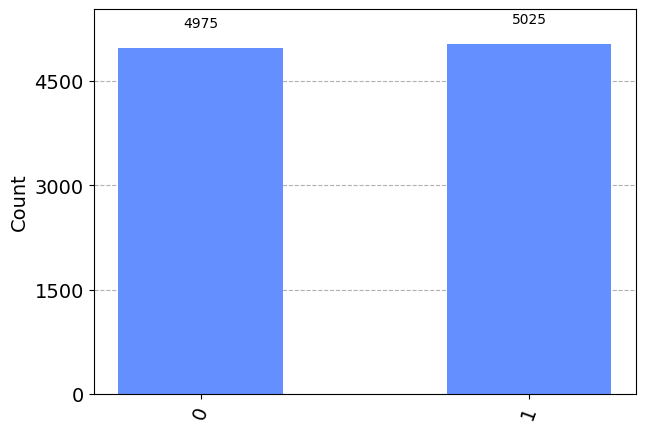

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.615625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1    

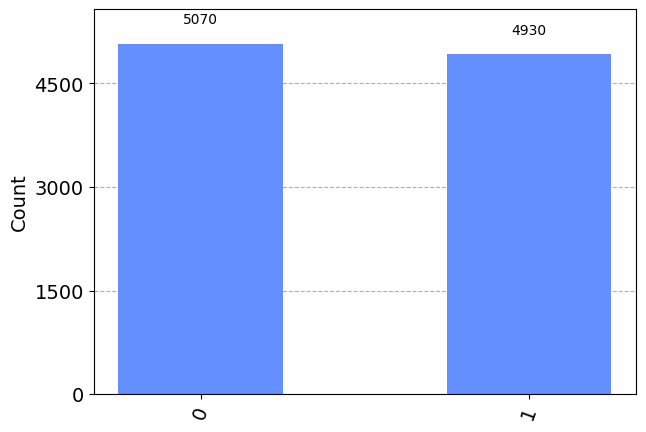

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6062500000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

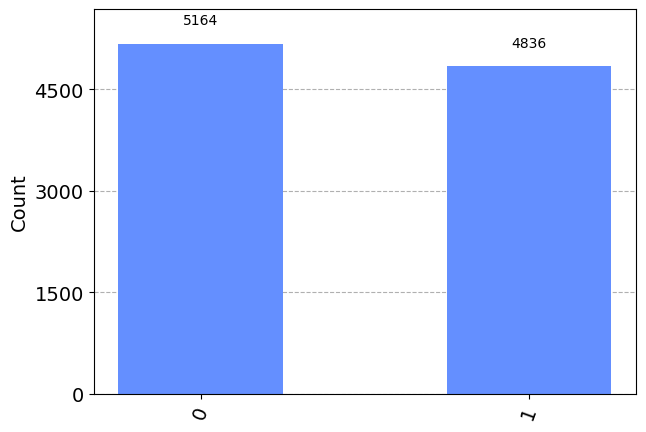

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5968750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

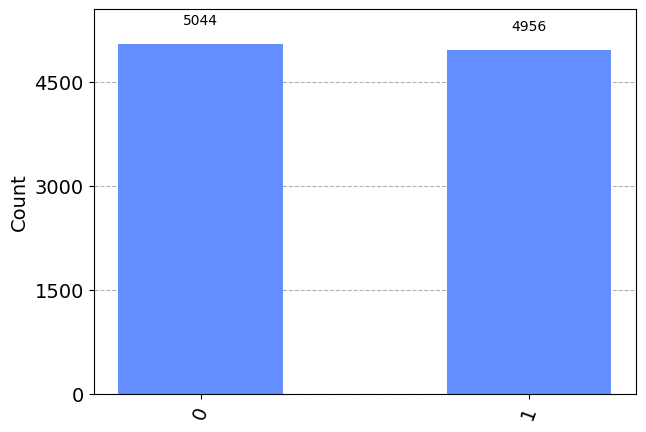

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5875000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

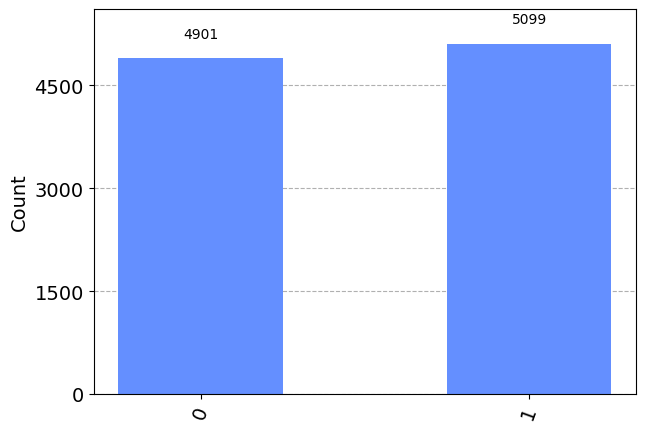

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5781250000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

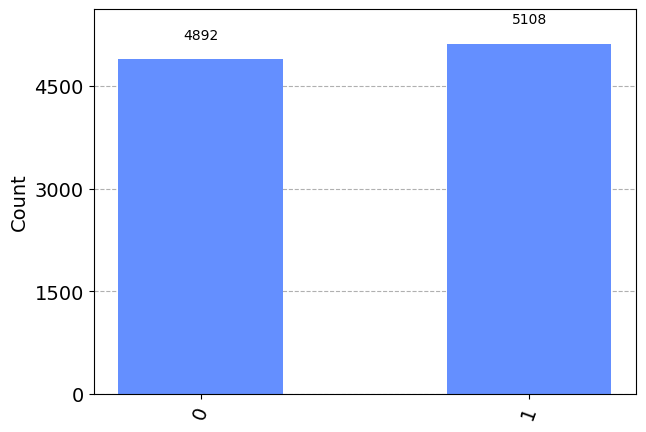

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5687499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

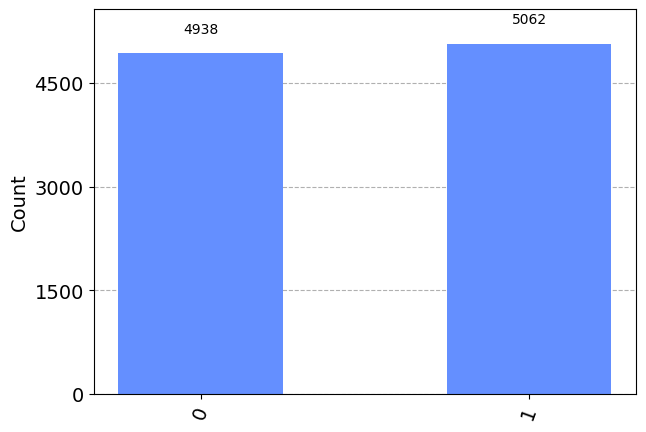

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5593749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

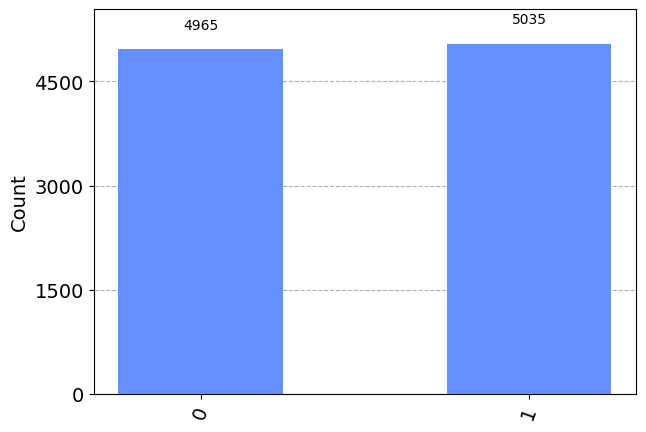

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5499999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

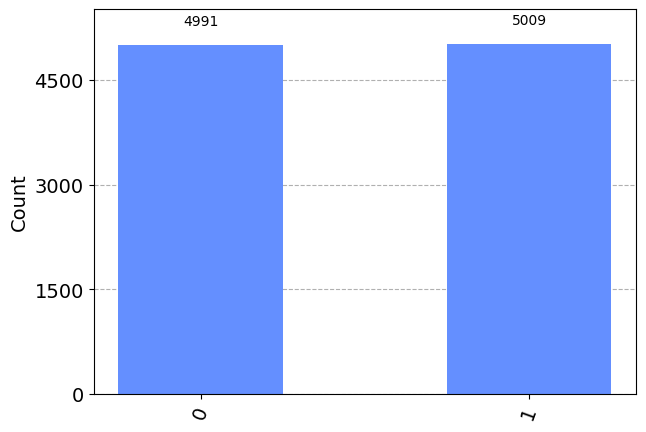

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5406249999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

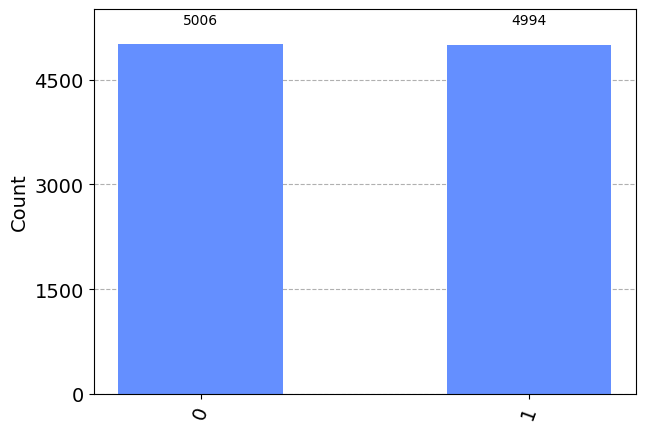

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.53125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.03125, Circuit = 
    

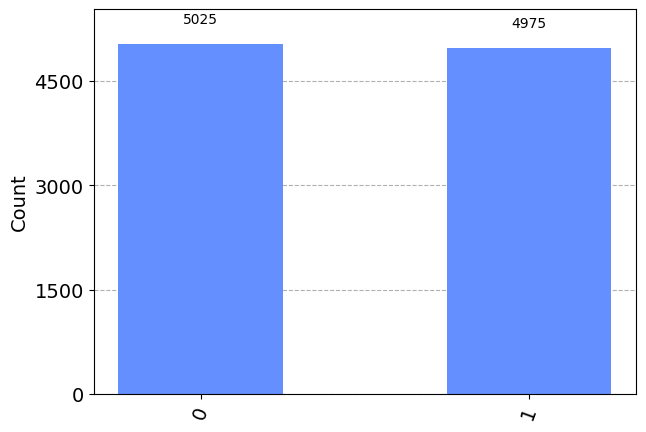

--------------------------------------------------------------------------------------------------------------


In [20]:
#Fourth experiment Swap Test

noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,2,['cx'])

swap_test = get_swap_test(2,
                          [sqrt(0.1),sqrt(0.2),sqrt(0.6),sqrt(0.1)],
                          [0,sqrt(0.5),sqrt(0.1),sqrt(0.4)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('Fourth experiment Swap Test:')
display(swap_test.draw('mpl'))
print('Fourth experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

results = []
for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,2,['cx'])
    print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('Fourth Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')

In [21]:
#SIMILARITIES RATE CALCULATIONS FOR EACH SIMULATION
successCounts4=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts4.append(count)
#print(successCounts4)

In [22]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 36), ('cx', 20), ('sx', 17), ('measure', 1)])


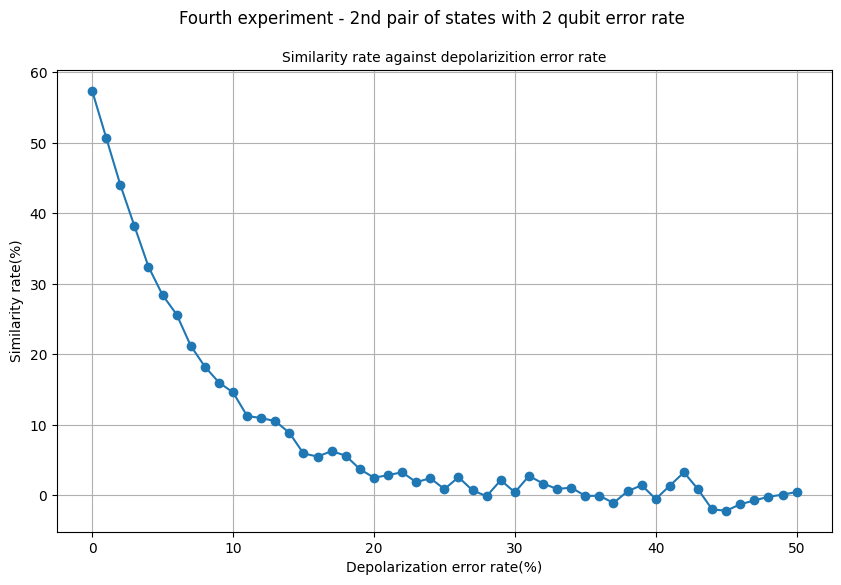

In [23]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts4, marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('Fourth experiment - 2nd pair of states with 2 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Displaying plot
plt.grid(True)
plt.show()

### 4.5.   Fifth experiment - 3rd pair of states with 1 qubit error rate

The states to compare are $ \begin{bmatrix} 
\sqrt{0.01}  \\
\sqrt{0.10} \\
\sqrt{0.12} \\
\sqrt{0.13} \\
\sqrt{0.04} \\
0 \\
\sqrt{0.35} \\
\sqrt{0.25} \\
\end{bmatrix} $ , 
$ \begin{bmatrix} 
0  \\
\sqrt{0.2} \\
\sqrt{0.2} \\
\sqrt{0.1} \\
\sqrt{0.2} \\
\sqrt{0.05} \\
\sqrt{0.05} \\
\sqrt{0.2}
\end{bmatrix} $. Each one of 3 qubits. 

QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
Fifth experiment Swap Test:


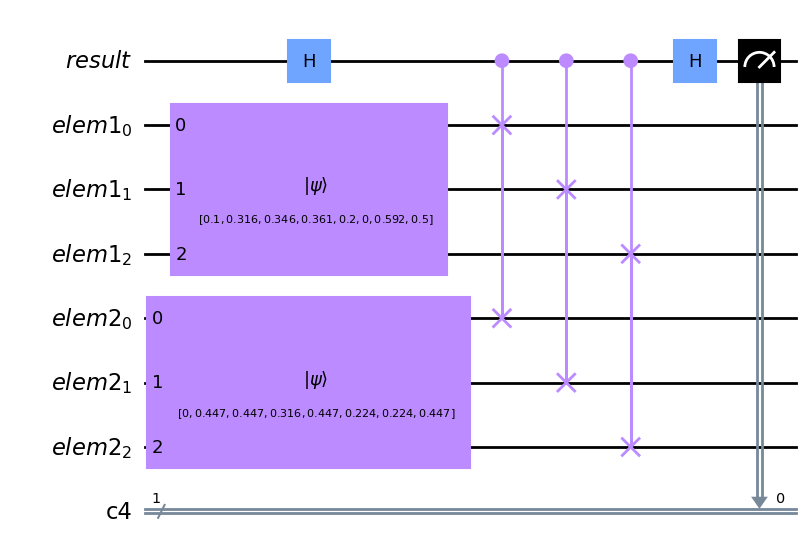

Fifth experiment TRANSPILED Swap Test:


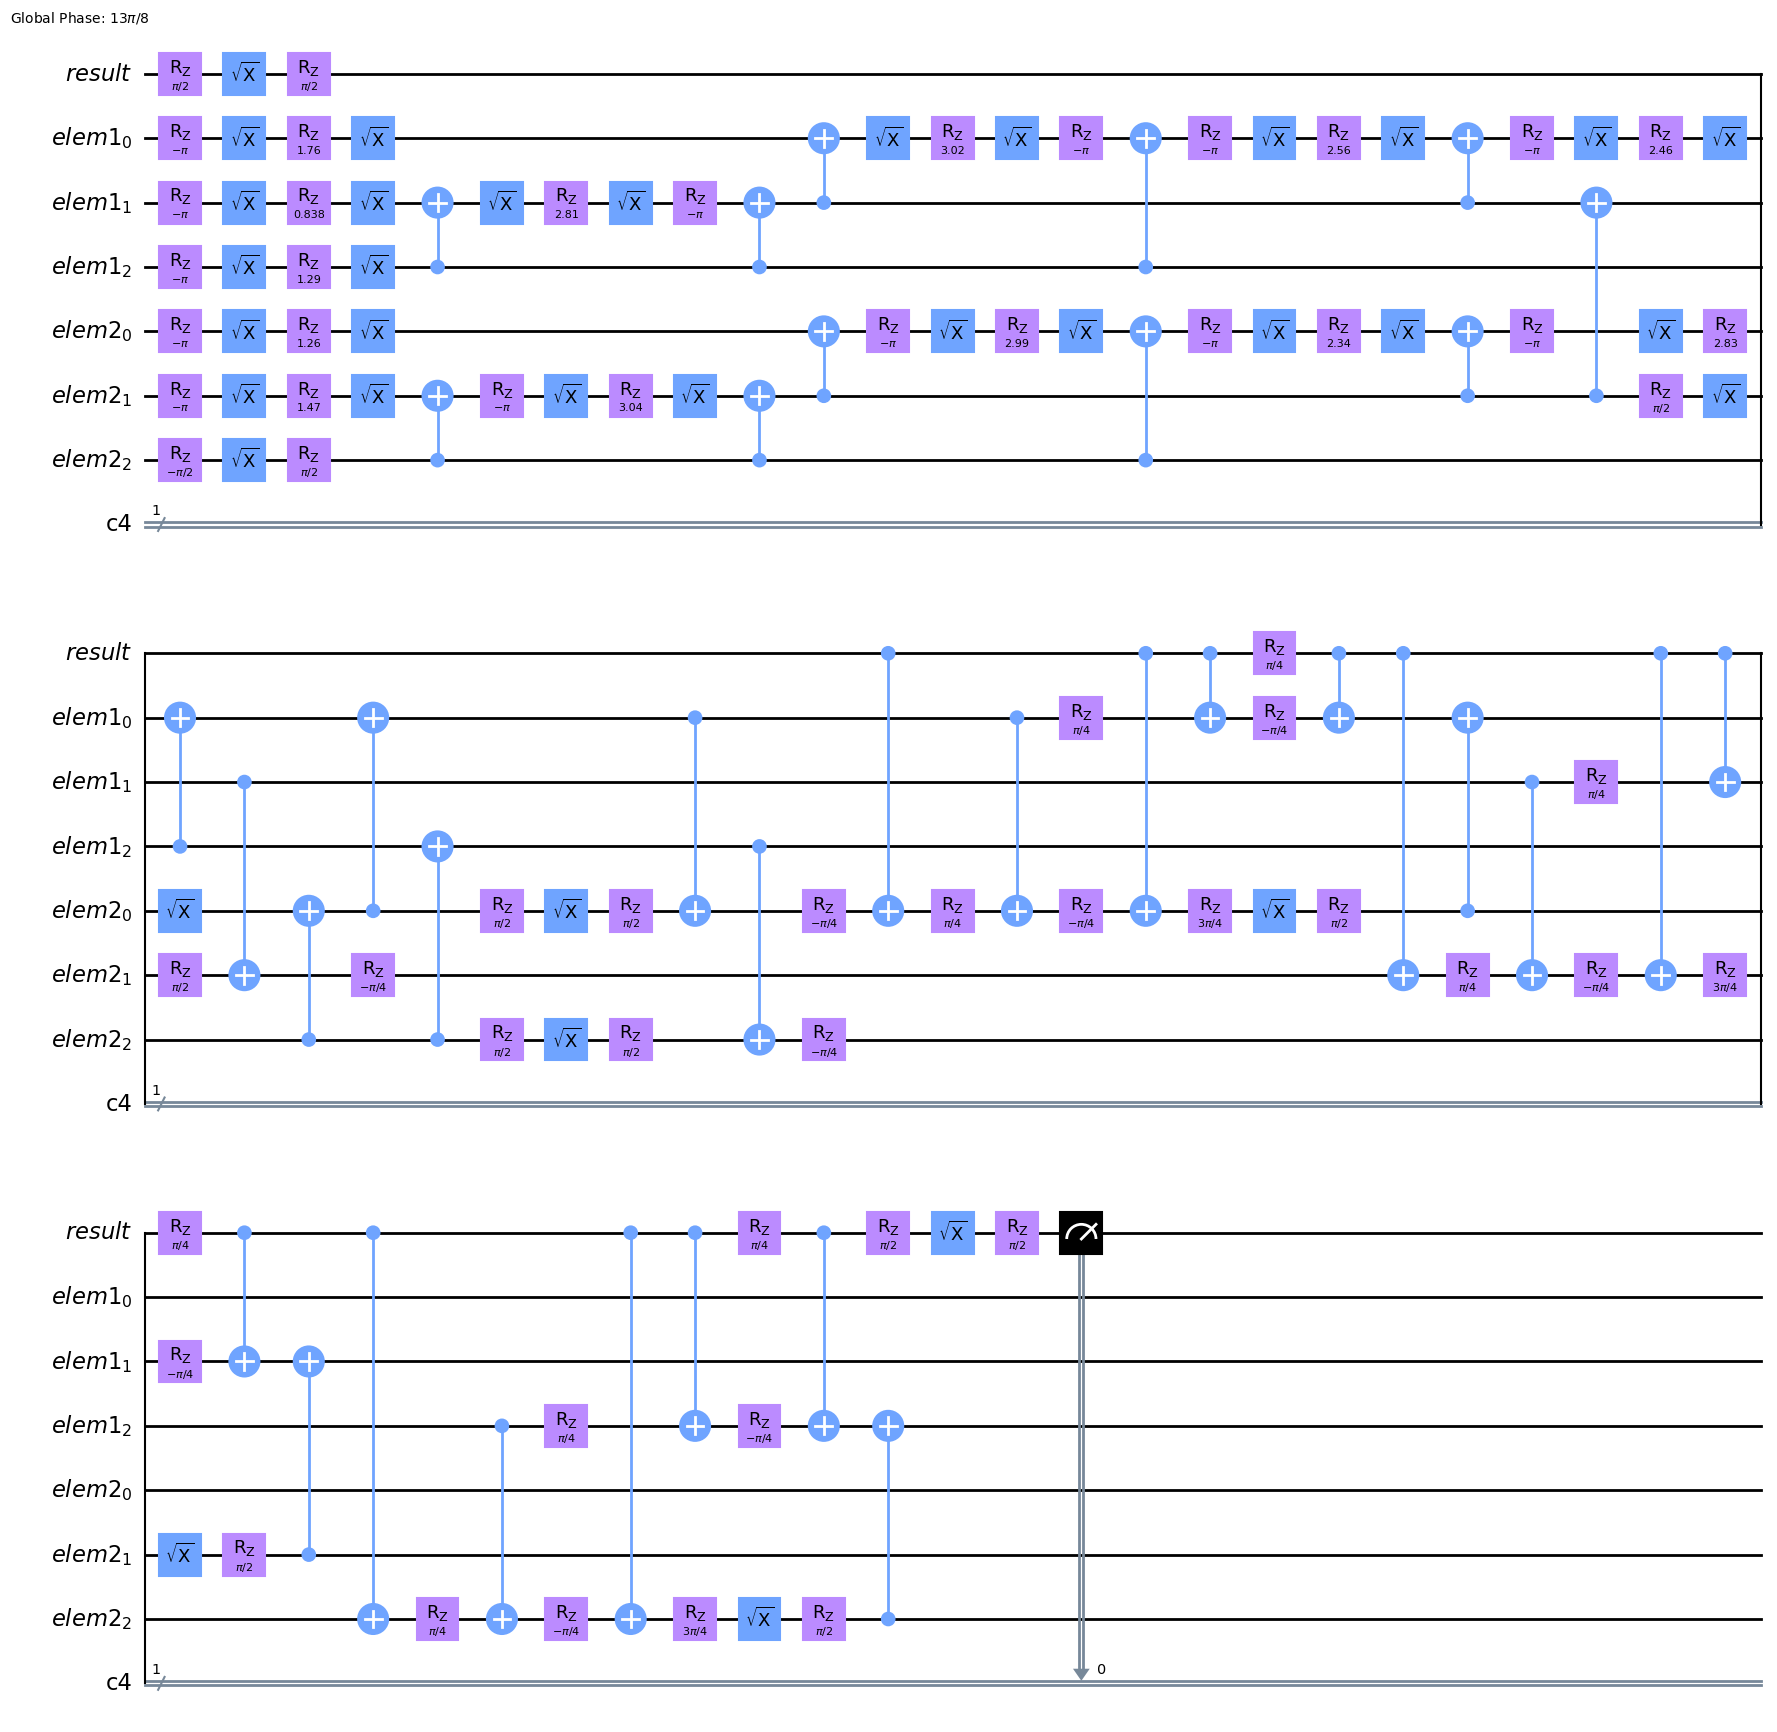

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 1 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
NoiseModel: Ideal
Fifth Experiment Counts:


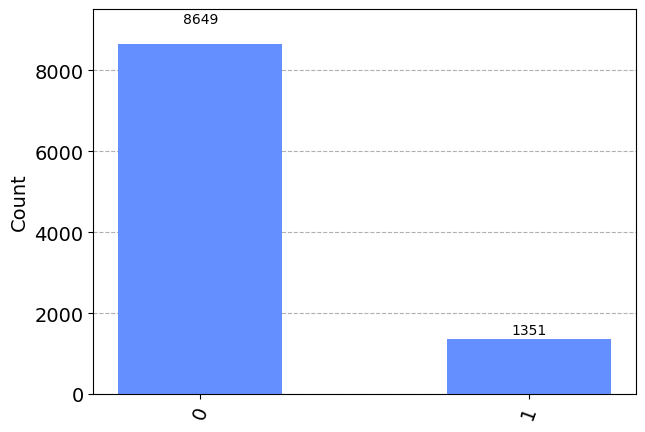

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9925000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0025000000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


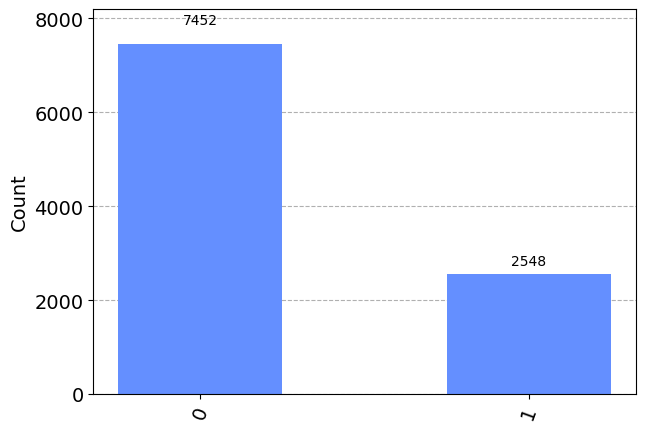

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.985, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


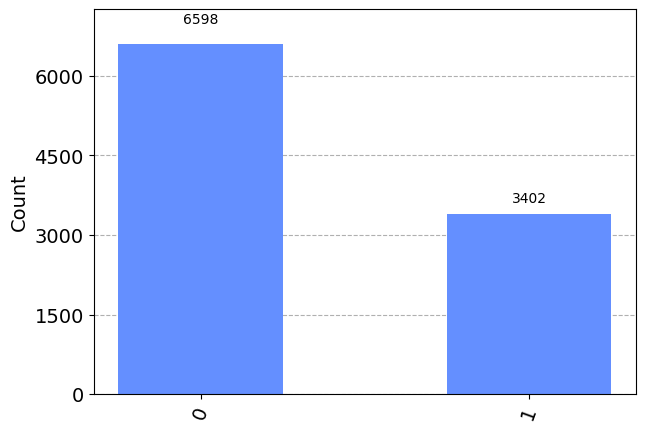

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9775000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.007500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


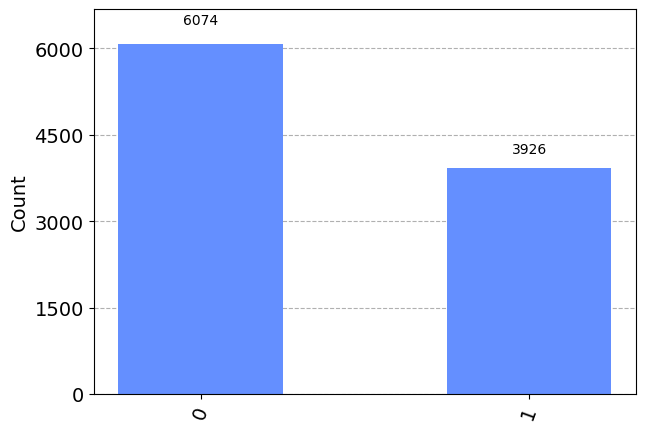

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.97, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.01, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.01, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.01, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


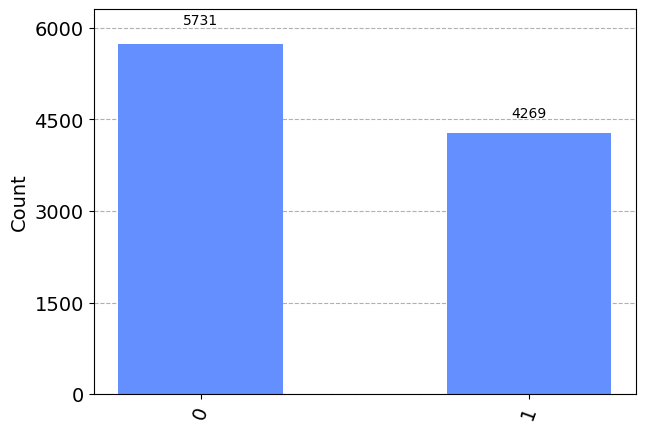

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9625000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.012500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


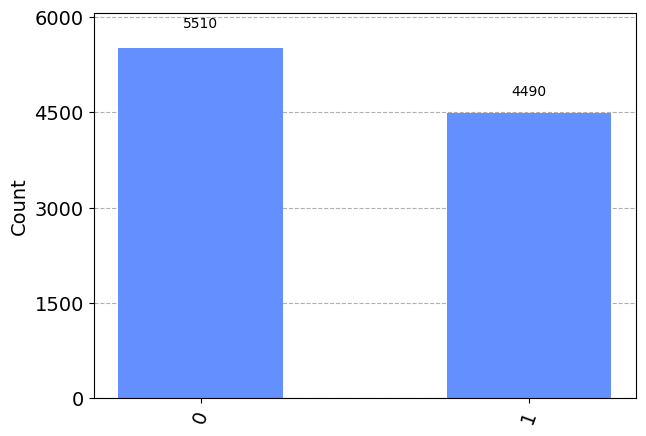

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.955, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.015, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.015, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.015, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


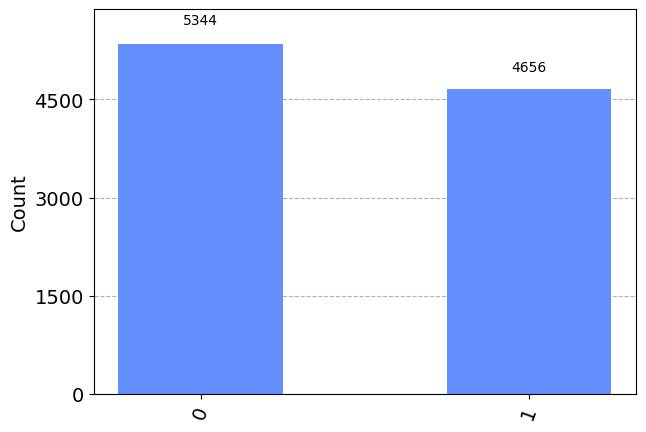

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.017500000000000005, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


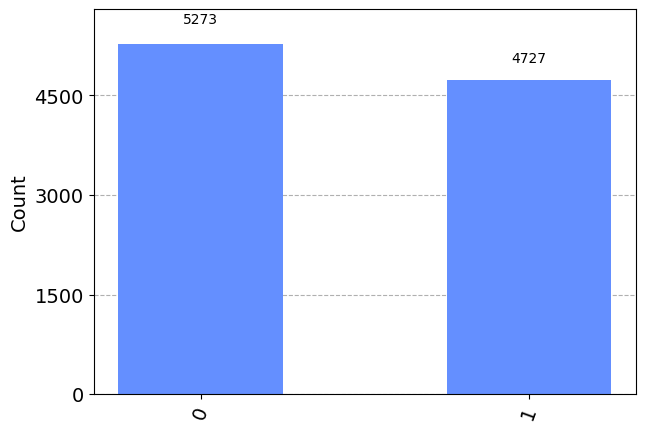

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.94, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.02, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.02, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.02, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


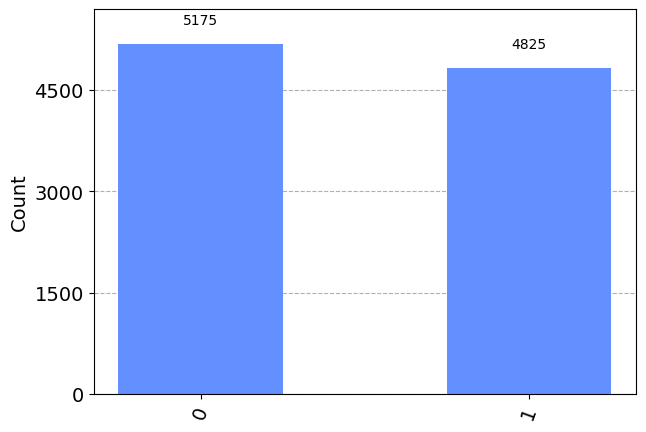

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9325000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.022500000000000003, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


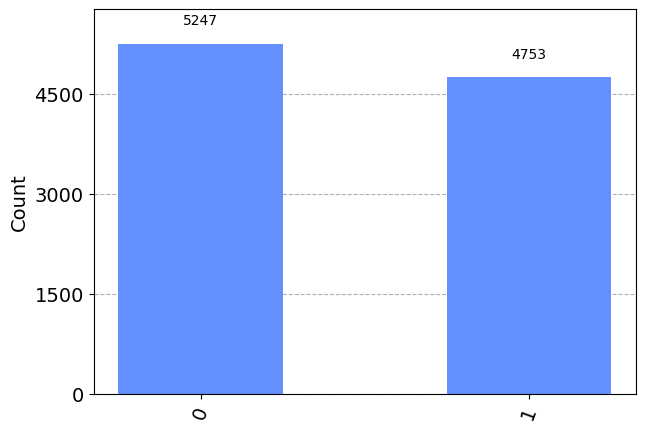

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


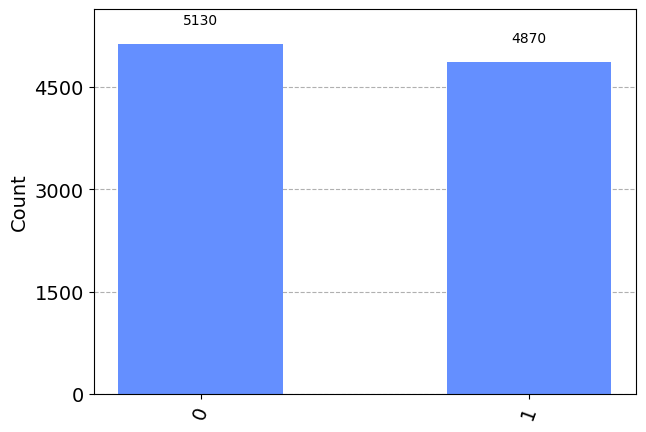

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9175000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.027500000000000004, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


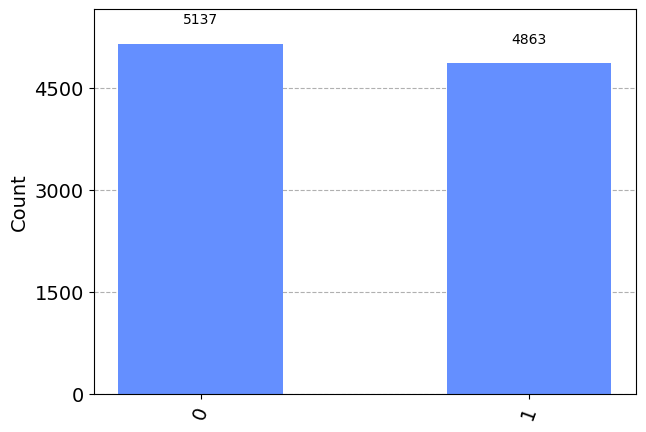

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.91, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


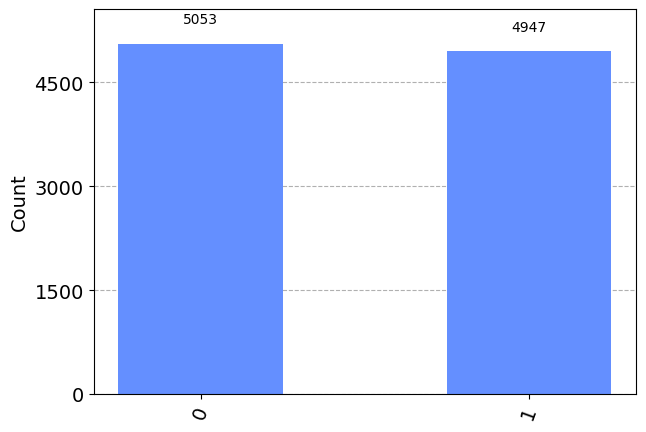

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.9025000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.03250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


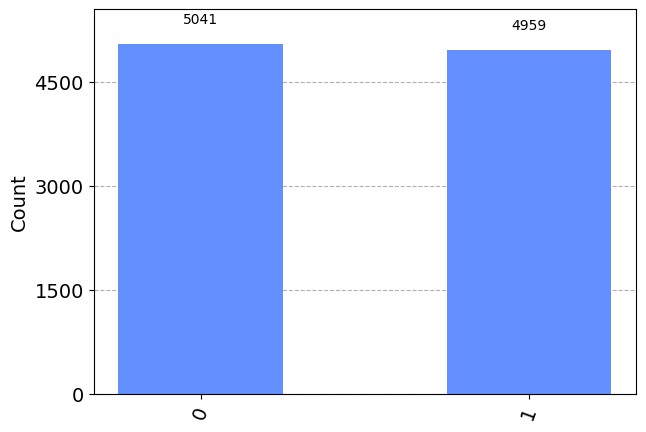

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.895, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.035, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.035, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.035, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


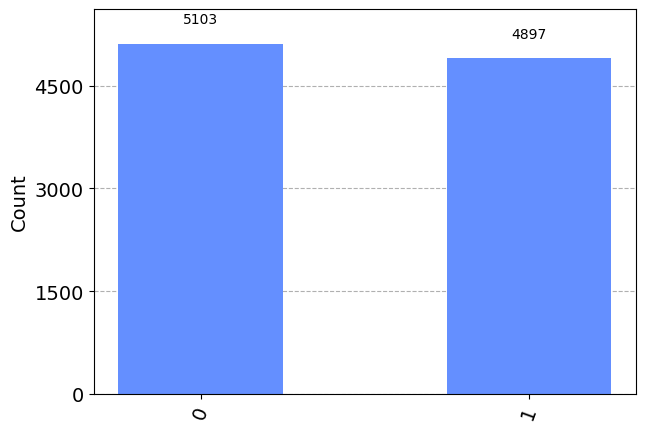

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8875000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.037500000000000006, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


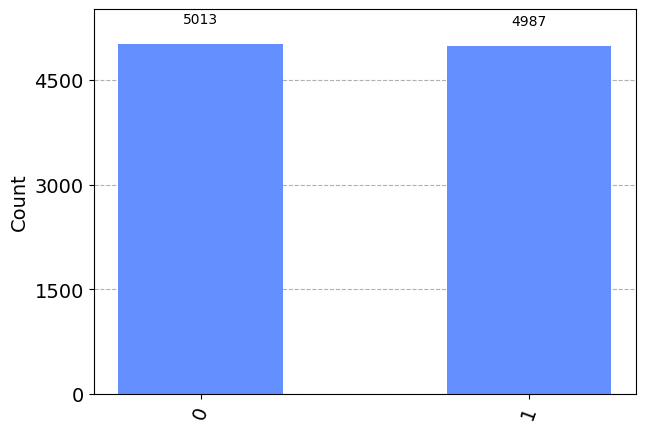

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.88, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


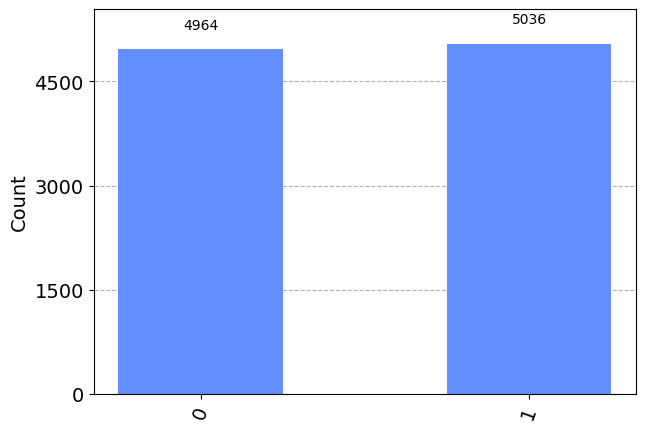

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8725, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04250000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


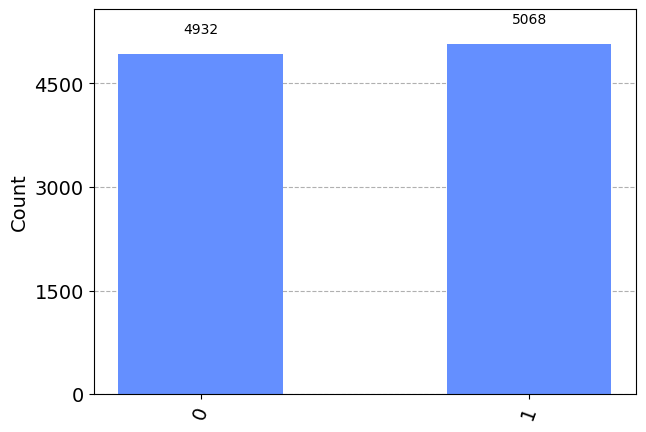

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.865, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.045, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.045, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.045, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


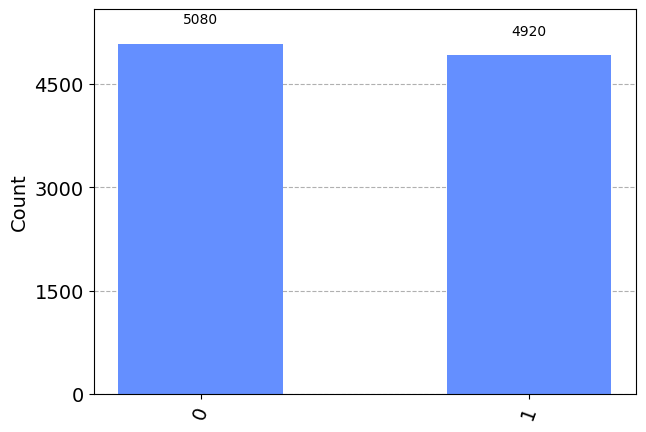

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8575, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.04750000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


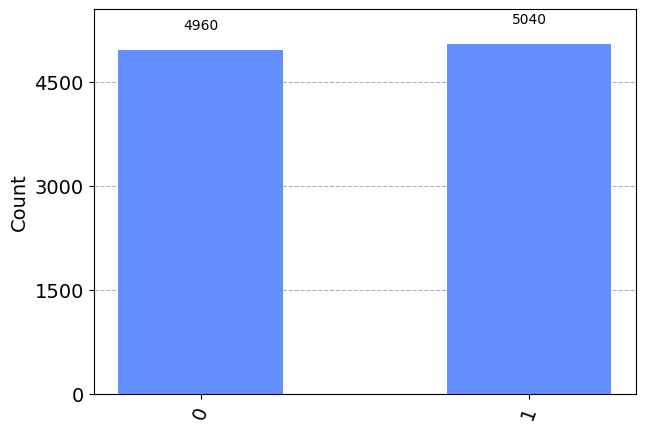

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.05, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.05, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.05, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


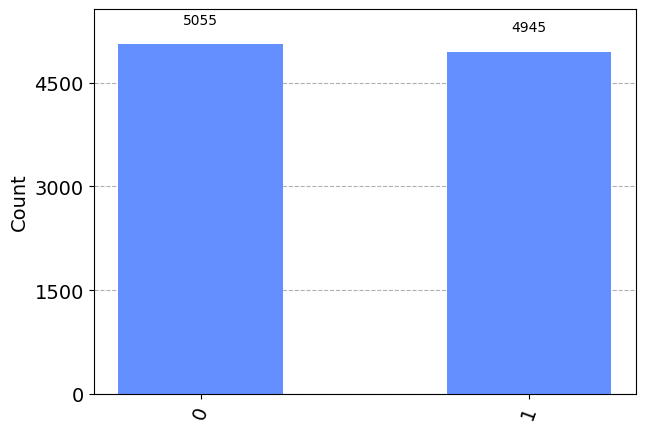

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8425, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0525, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0525, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


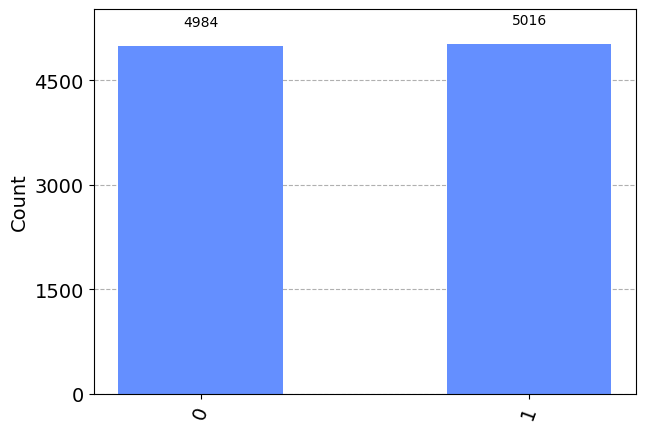

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.835, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.055, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.055, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.055, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


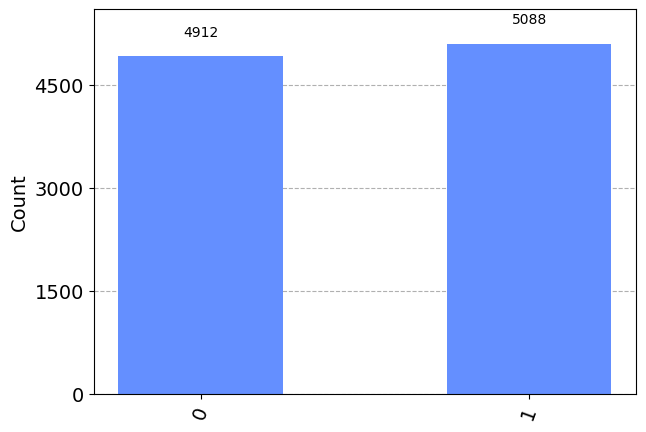

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8275, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0575, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0575, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


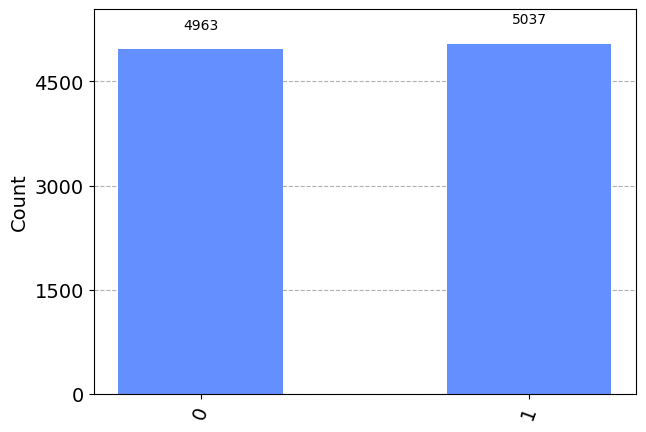

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8199999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.059999999999999984, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


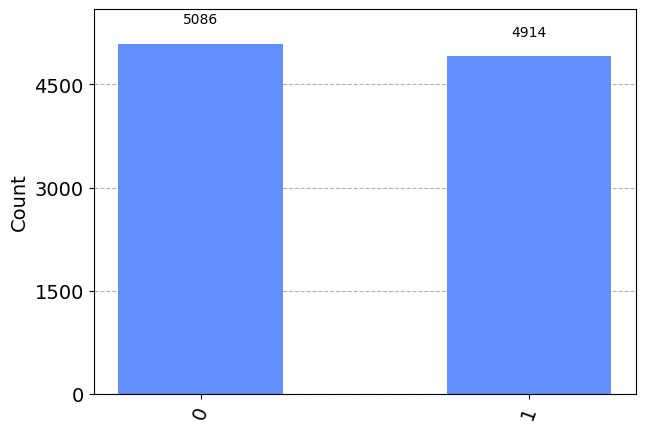

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8125, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0625, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0625, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


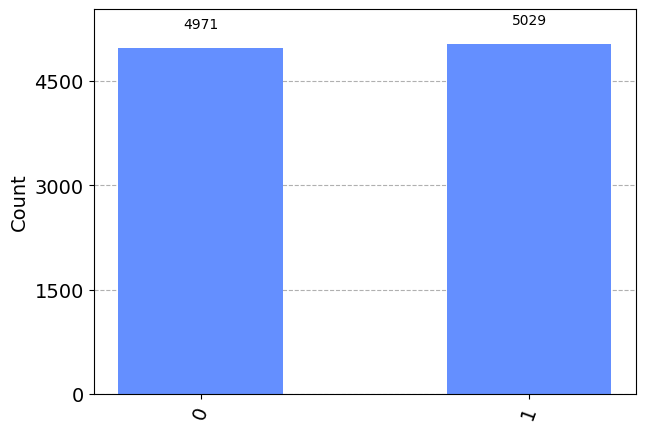

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.8050000000000002, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


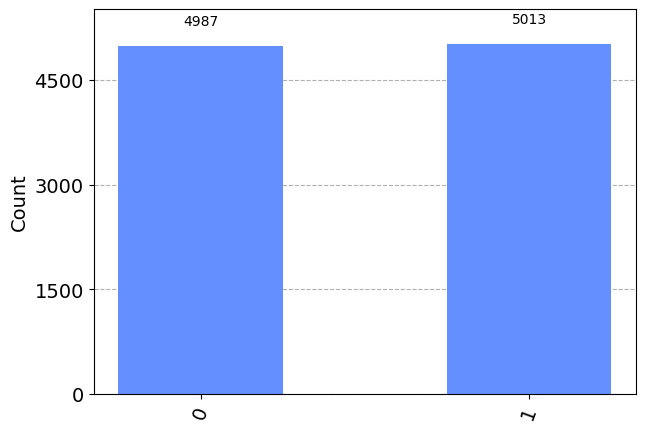

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7975, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0675, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0675, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


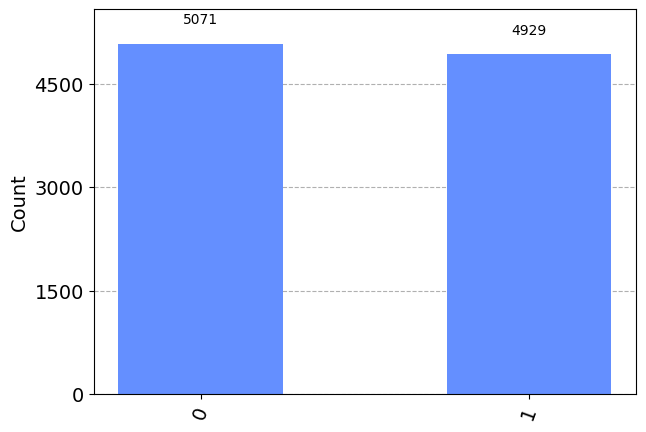

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7899999999999998, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.06999999999999999, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


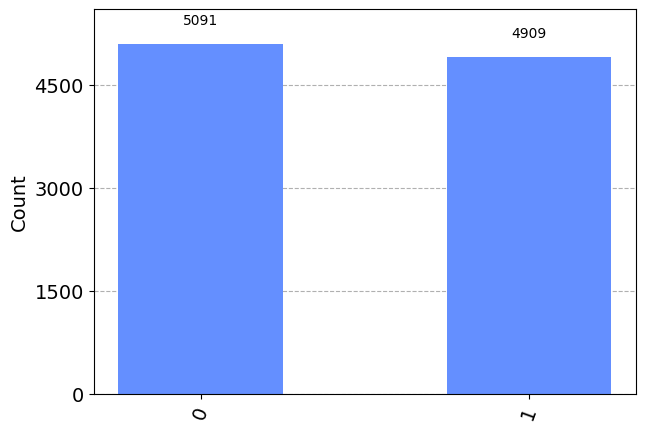

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7825, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0725, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0725, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


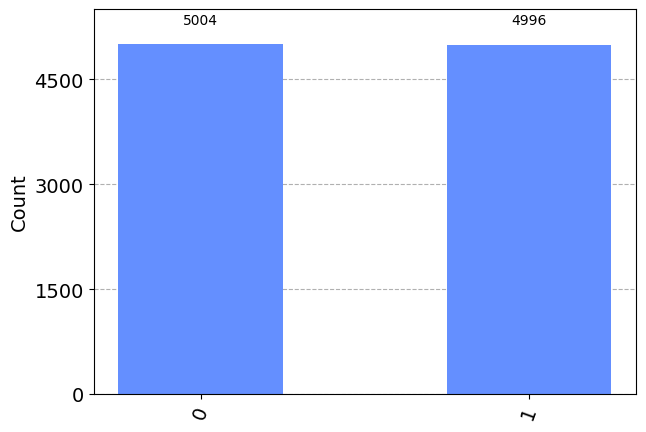

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7750000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.07500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


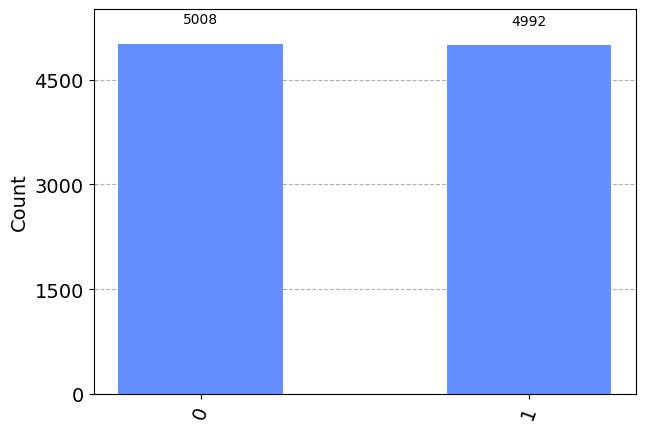

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7675, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0775, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0775, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


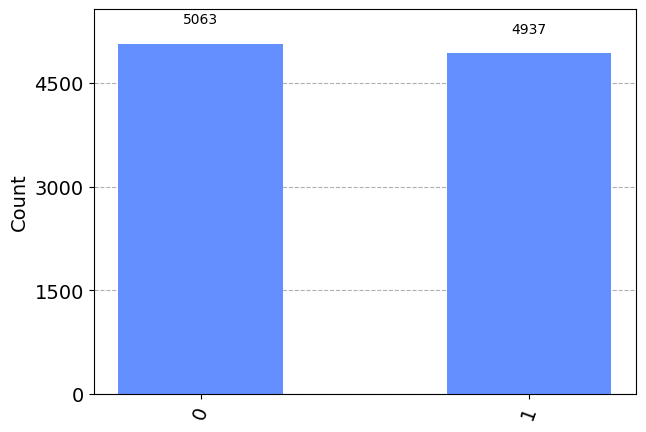

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7600000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


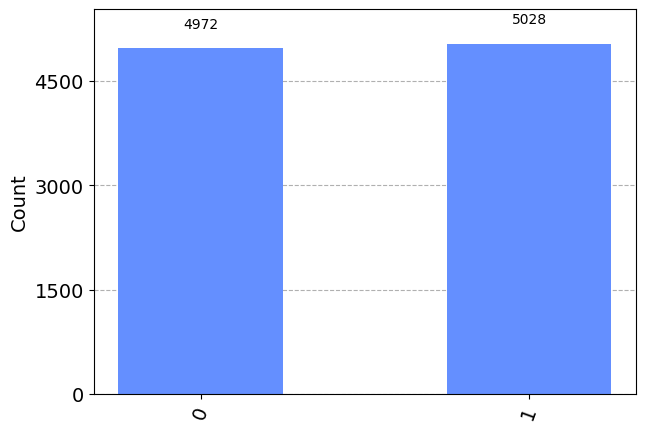

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7525, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0825, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0825, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


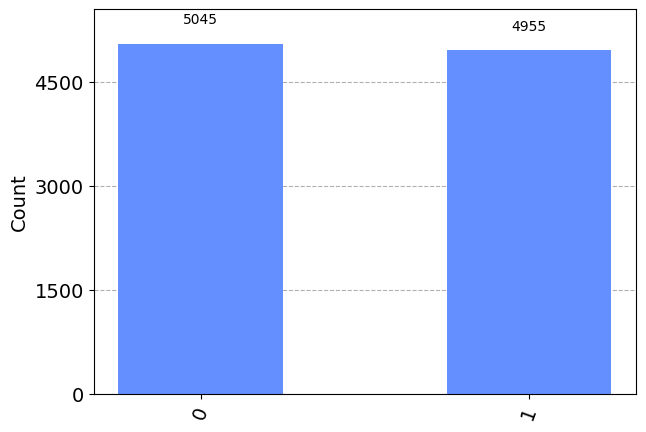

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.745, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.08500000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


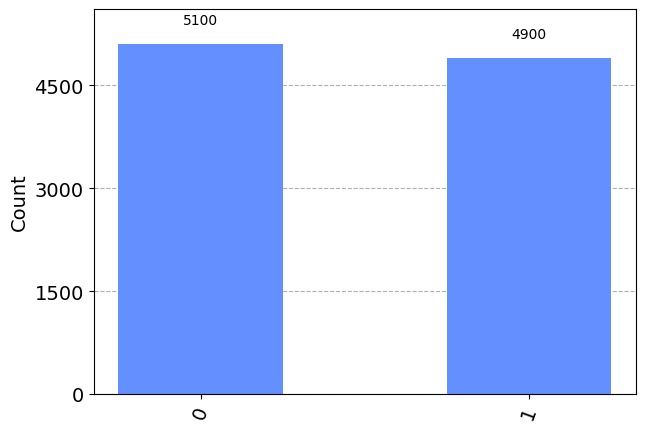

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7375, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0875, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0875, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


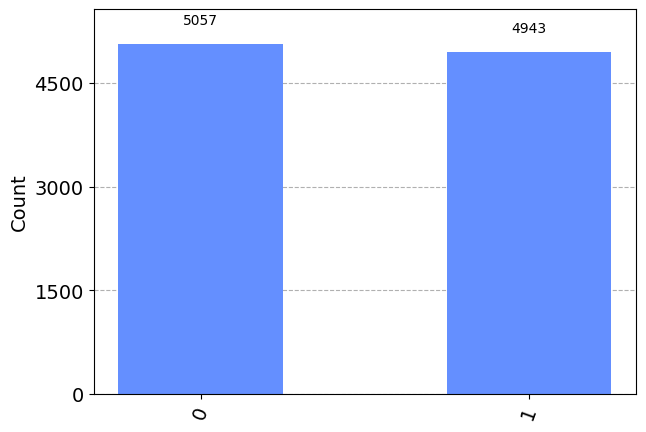

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7300000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


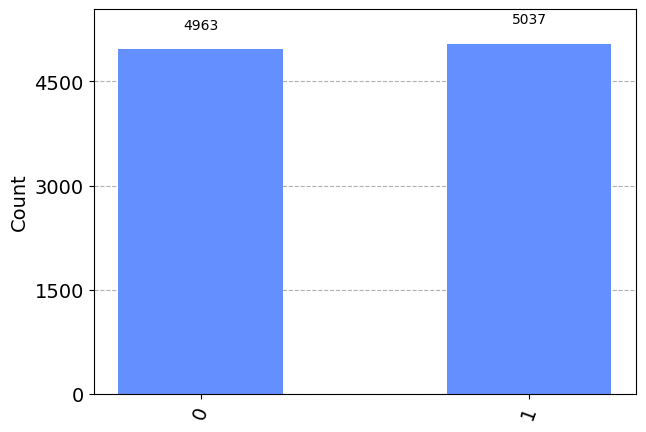

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7224999999999999, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0925, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0925, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


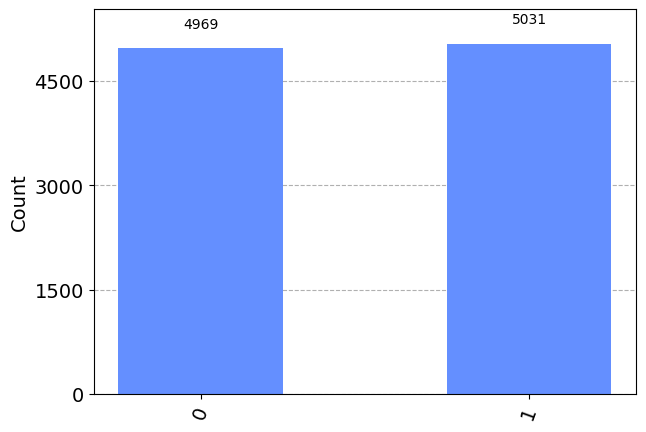

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7150000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.09500000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


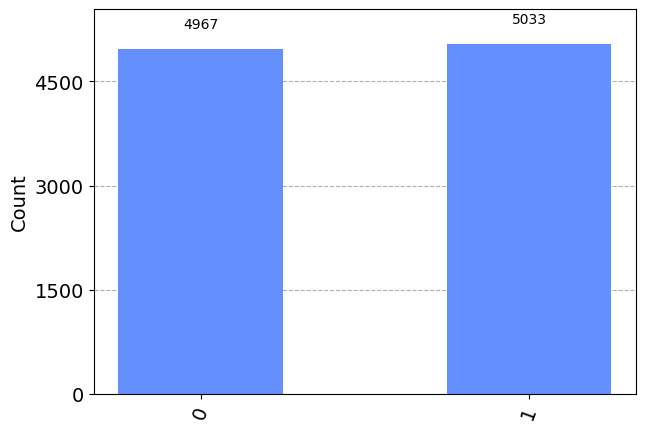

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7075, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.0975, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.0975, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


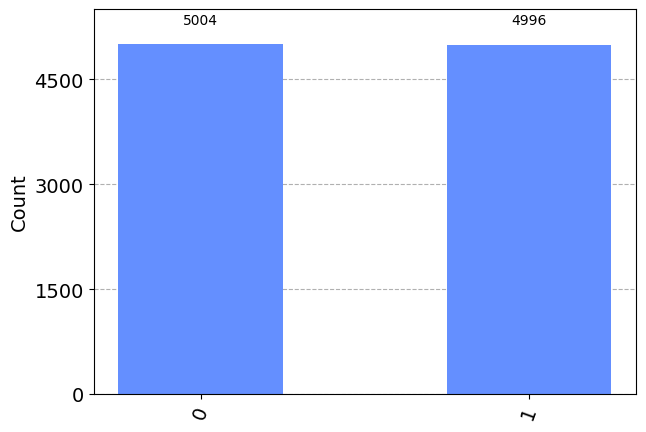

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.7000000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.10000000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


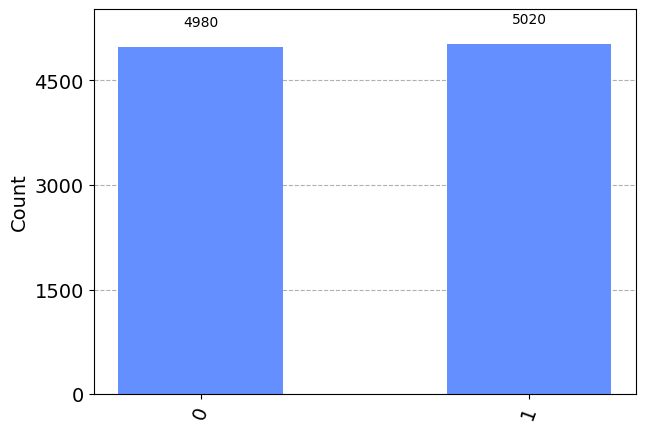

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6925, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1025, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1025, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


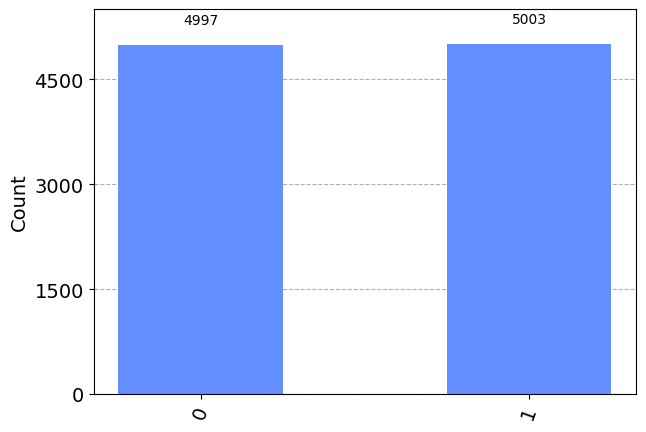

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.685, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.105, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.105, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.105, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


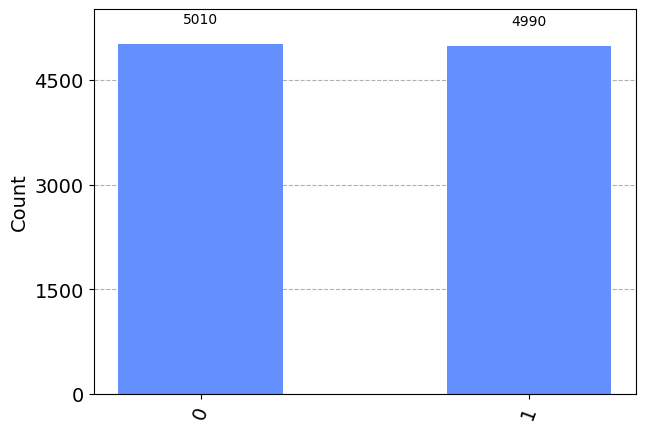

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6775, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1075, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1075, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


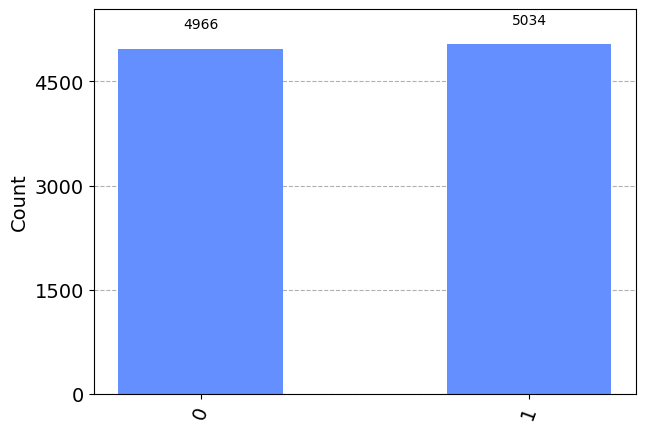

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.67, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11000000000000001, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


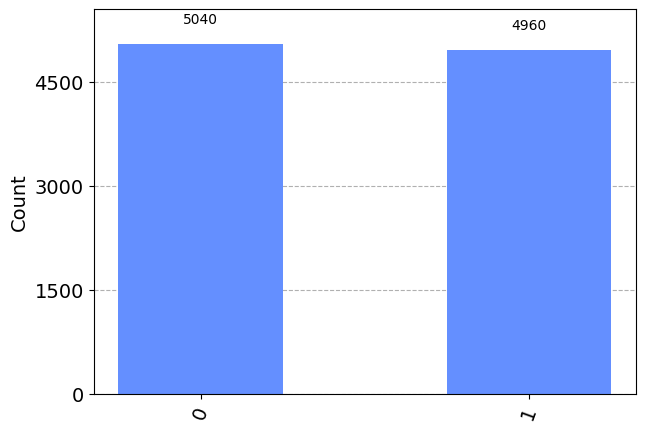

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.1125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.1125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


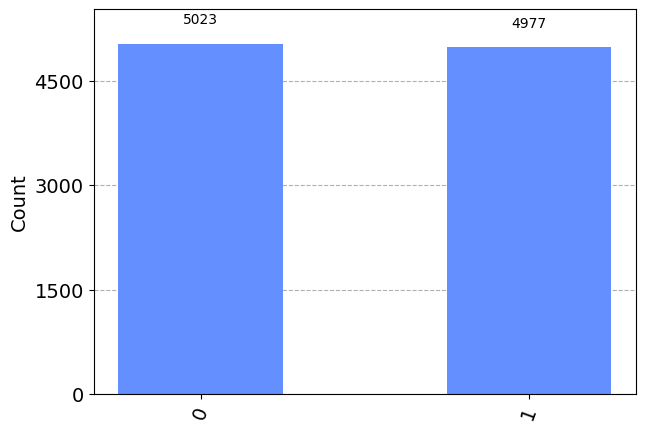

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.655, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.115, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.115, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.115, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


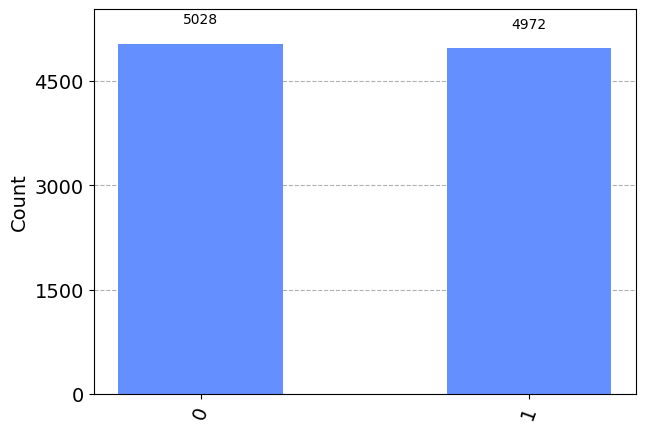

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6475000000000001, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.11750000000000002, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


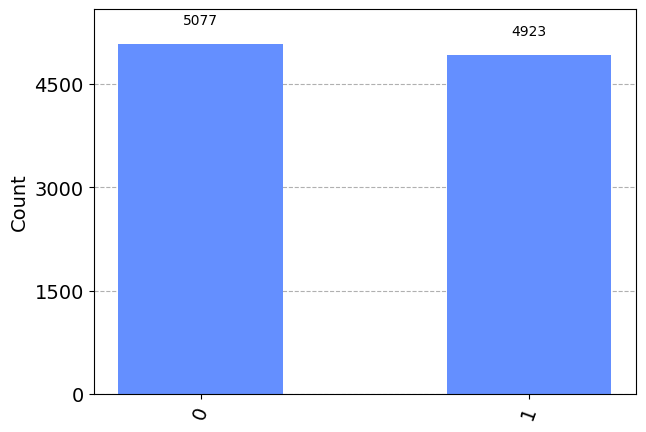

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.64, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


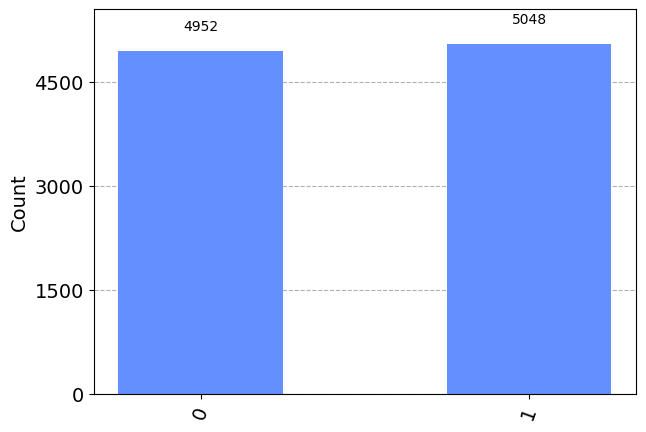

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.6325, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.12249999999999997, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


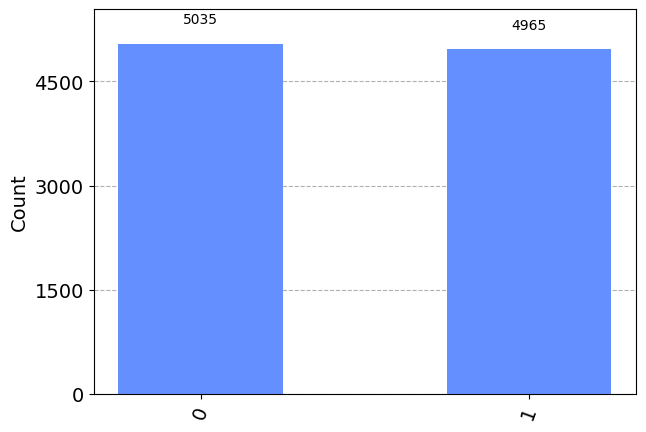

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 1 qubits. Noise circuits:
  P(0) = 0.625, Circuit = 
   ┌───┐
q: ┤ I ├
   └───┘
  P(1) = 0.125, Circuit = 
   ┌───┐
q: ┤ X ├
   └───┘
  P(2) = 0.125, Circuit = 
   ┌───┐
q: ┤ Y ├
   └───┘
  P(3) = 0.125, Circuit = 
   ┌───┐
q: ┤ Z ├
   └───┘
NoiseModel:
  Basis gates: ['cx', 'h', 'id', 'rz', 'sx']
  Instructions with noise: ['rz', 'id', 'h', 'sx']
  All-qubits errors: ['id', 'h', 'rz', 'sx']
Fifth Experiment Counts:


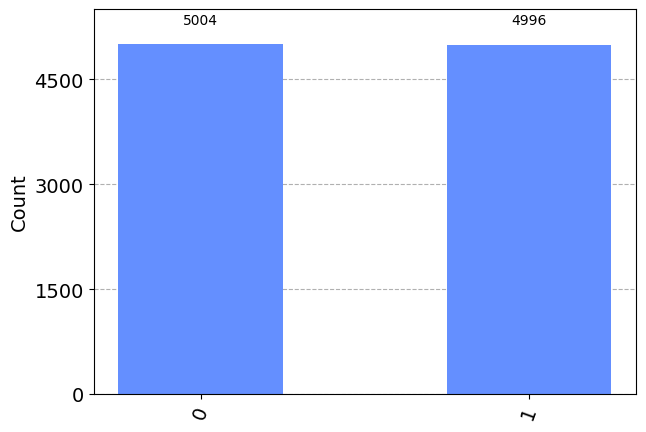

--------------------------------------------------------------------------------------------------------------


In [24]:
#Fifth experiment Swap Test
noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,1,['id','h','rz','sx'])

swap_test = get_swap_test(3,
                    [sqrt(0.01),sqrt(0.1),sqrt(0.12),sqrt(0.13),sqrt(0.04),sqrt(0),sqrt(0.35),sqrt(0.25)],
                    [0,sqrt(0.2),sqrt(0.2),sqrt(0.1),sqrt(0.2),sqrt(0.05),sqrt(0.05),sqrt(0.2)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('Fifth experiment Swap Test:')
display(swap_test.draw('mpl'))
print('Fifth experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

results = []
for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,1,['id','h','rz','sx'])
    print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('Fifth Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')

In [25]:
#SIMILARITIES CALCULATIONS FOR EACH EXPERIMENT
successCounts5=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts5.append(count)
#print(results)
#print(successCounts5)

In [26]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 49), ('cx', 36), ('sx', 27), ('h', 8), ('measure', 1)])


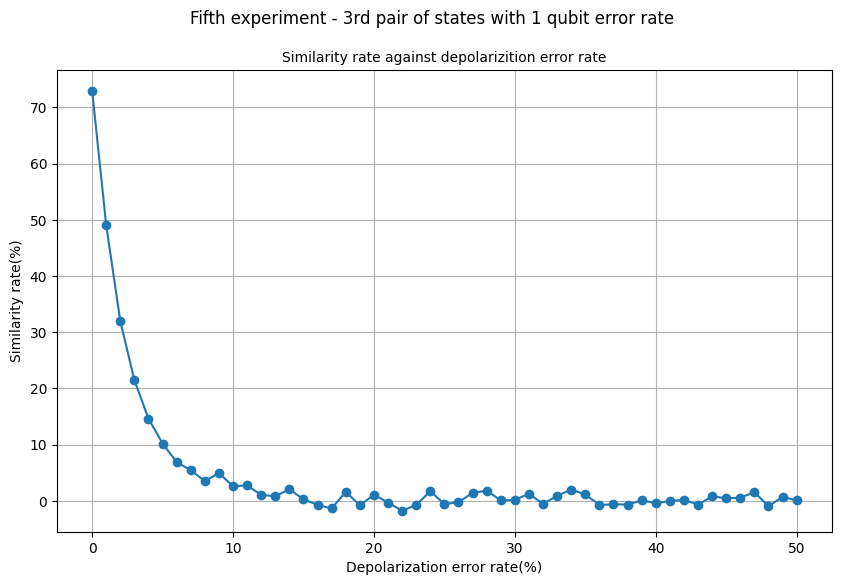

In [27]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts5, marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('Fifth experiment - 3rd pair of states with 1 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Showing plot
plt.grid(True)
plt.show()

## 4.6.   Sixth experiment - 3rd pair of states with 2 qubit error rate

QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
Sixth experiment Swap Test:


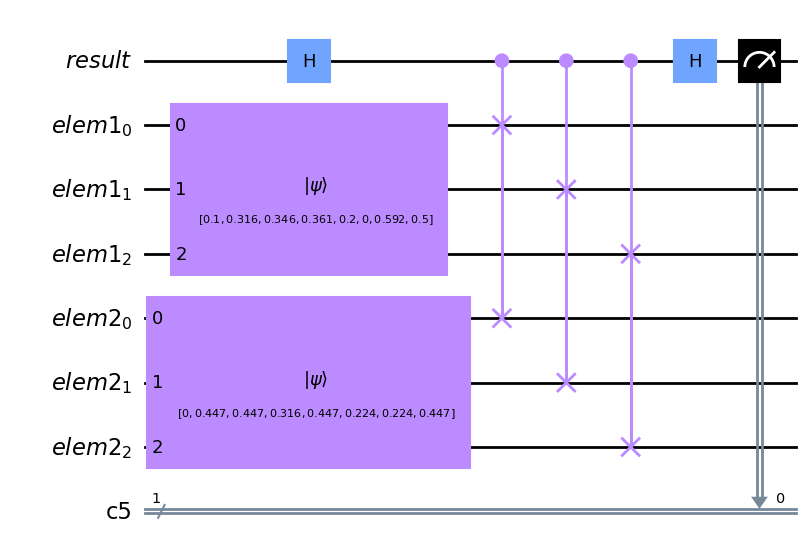

Sixth experiment TRANSPILED Swap Test:


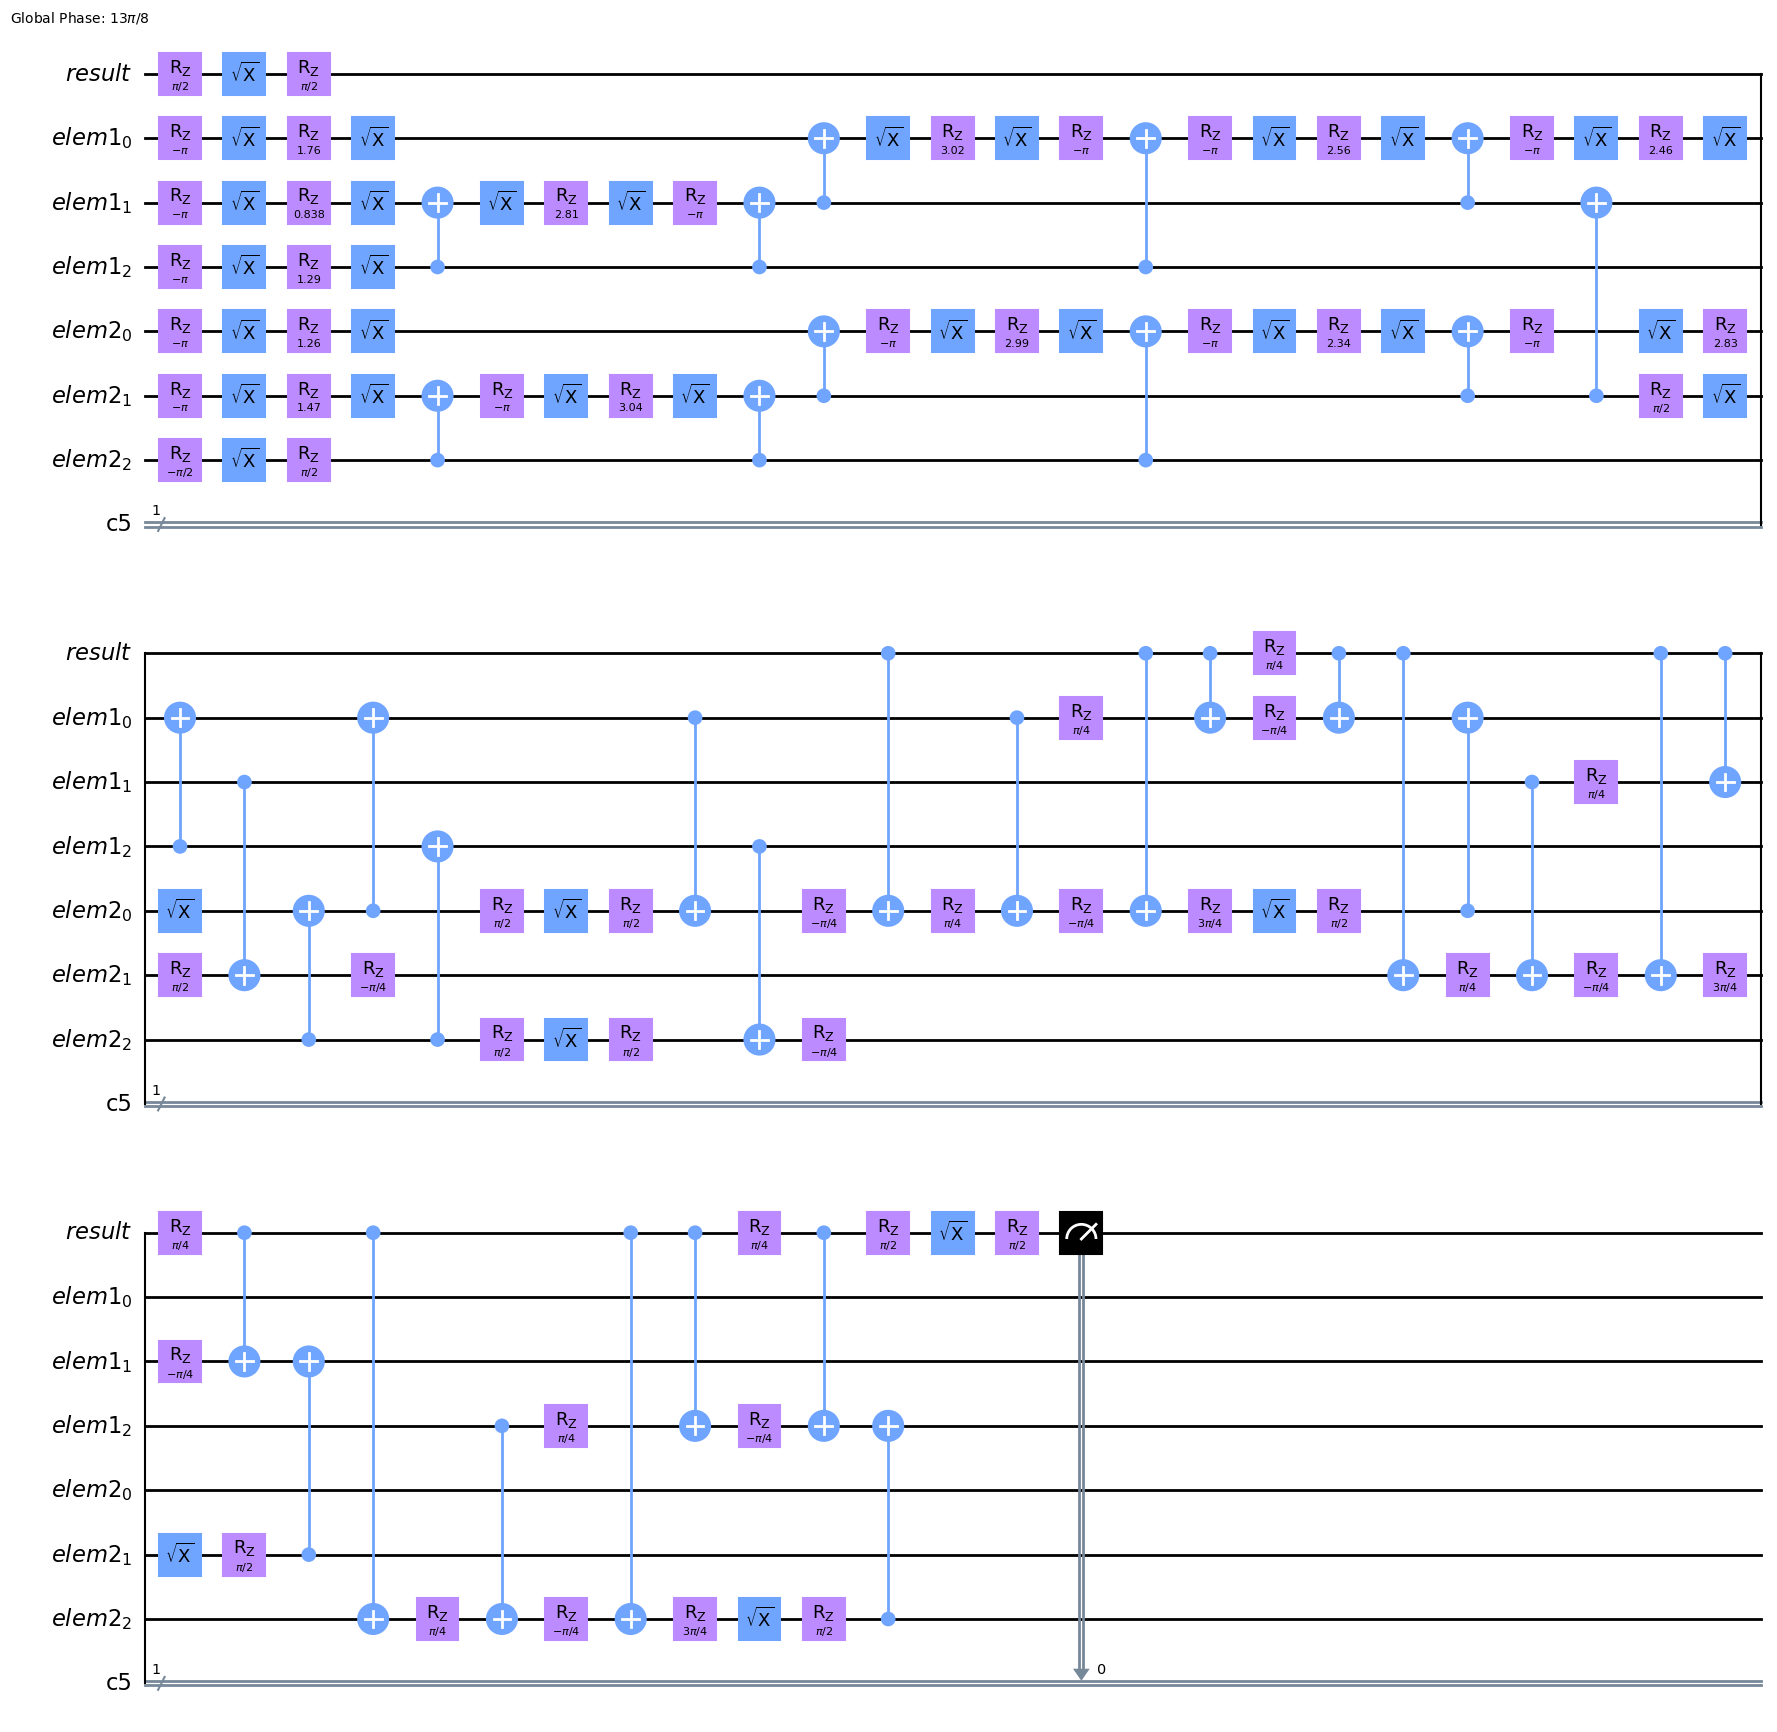

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.0
QuantumError on 2 qubits. Noise circuits:
  P(0) = 1.0, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
NoiseModel: Ideal
Sixth Experiment Counts:


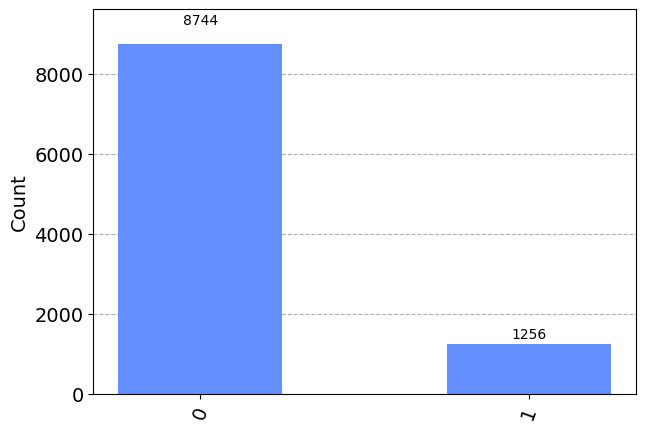

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.01
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9906250000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0006250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

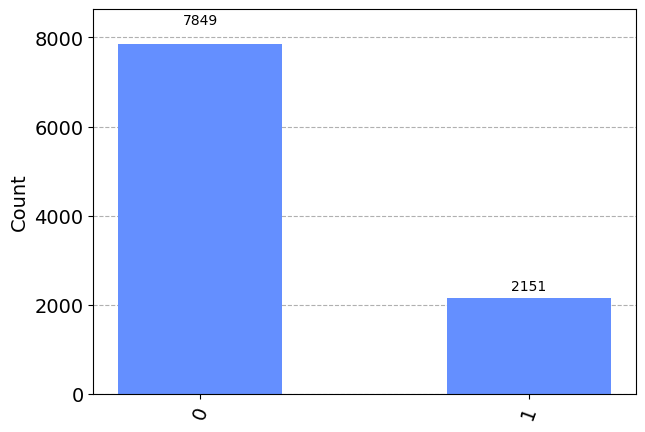

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.02
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9812500000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0012500000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

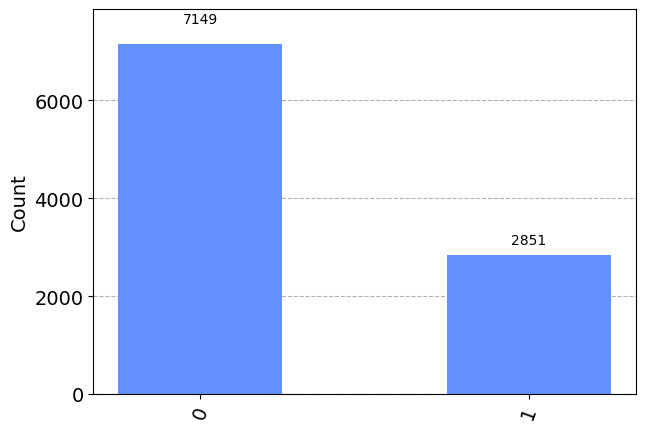

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.03
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9718750000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.001875000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

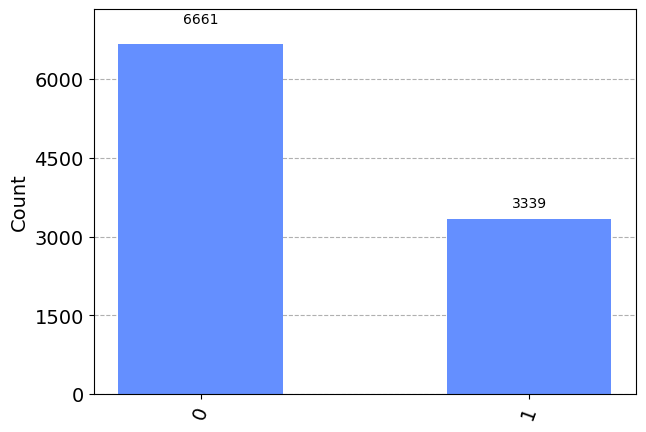

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.04
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9625000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.002500000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

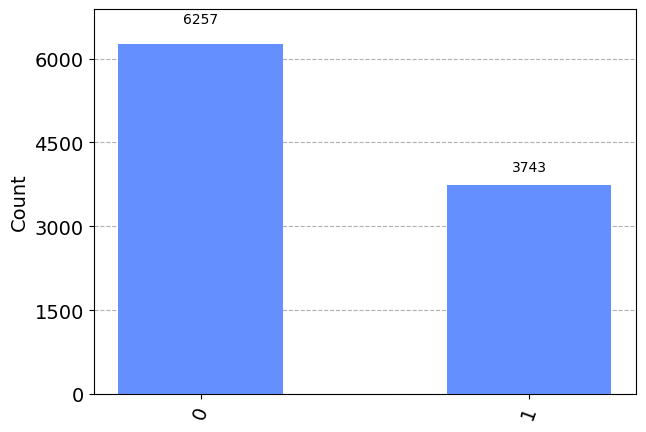

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.05
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9531249999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003124999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

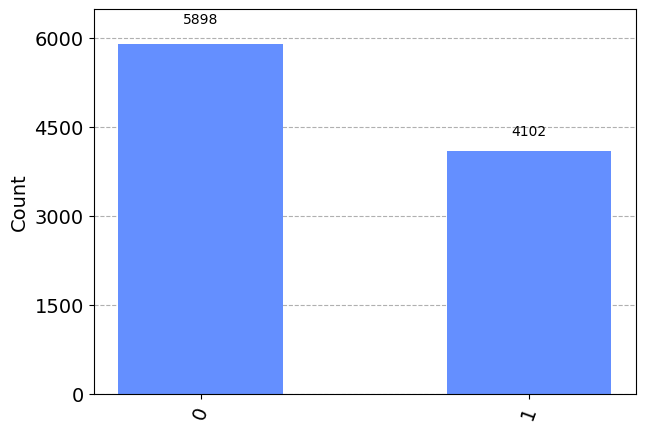

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.06
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9437499999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.003749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

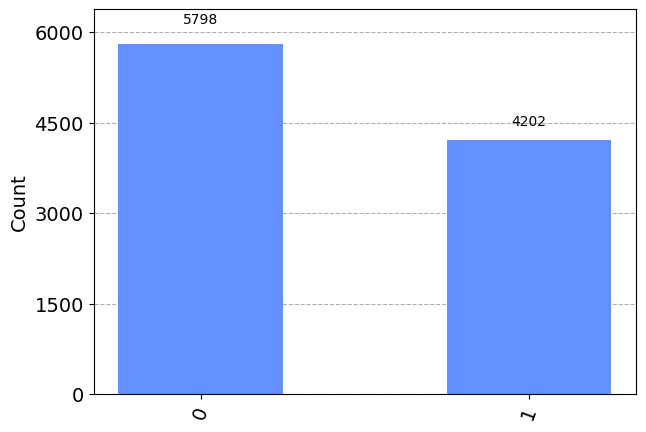

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.07
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9343749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0043749999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

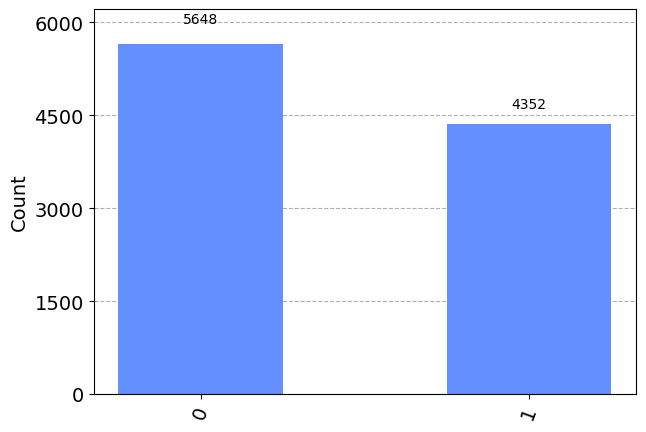

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.08
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.925, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.005, Circuit = 
     ┌───────────

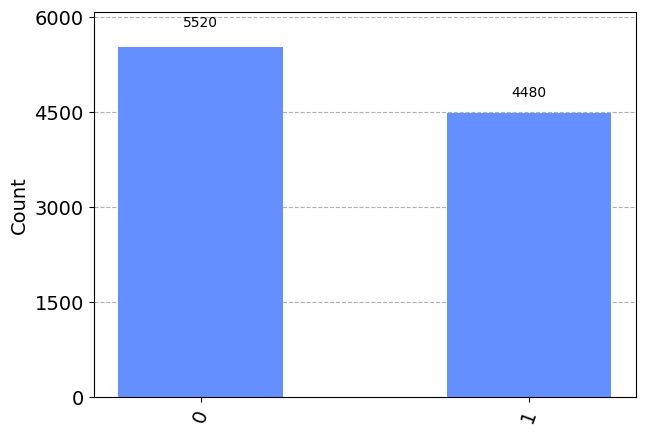

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.09
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9156250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.005625000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

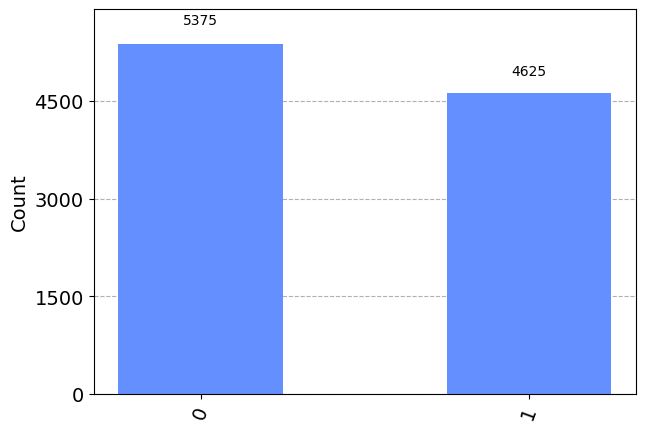

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.1
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.9062500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.006250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

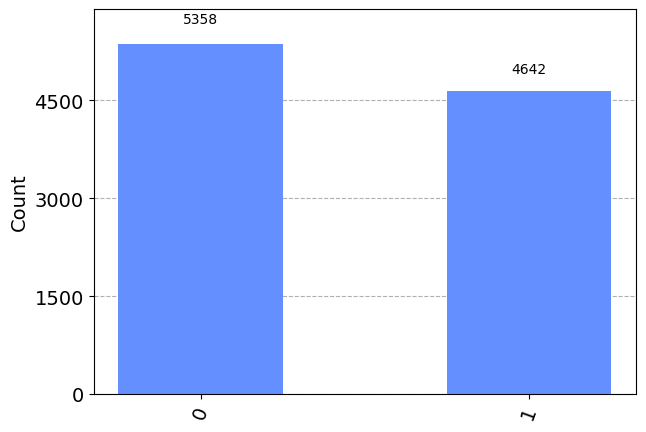

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.11
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8968750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.0068750000000000035, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pau

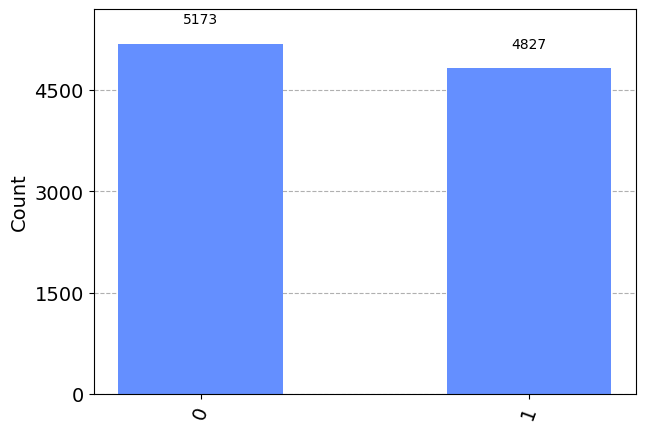

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.12
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.007500000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

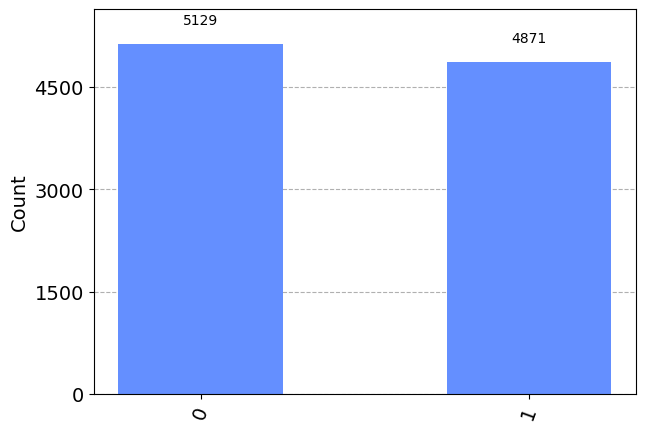

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.13
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8781249999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008124999999999995, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

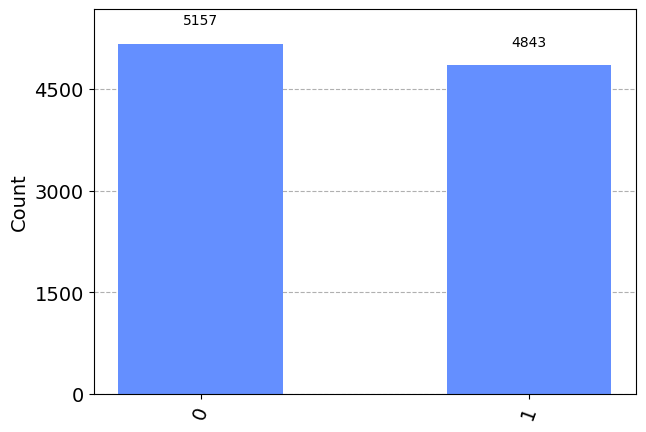

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.14
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8687499999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.008749999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

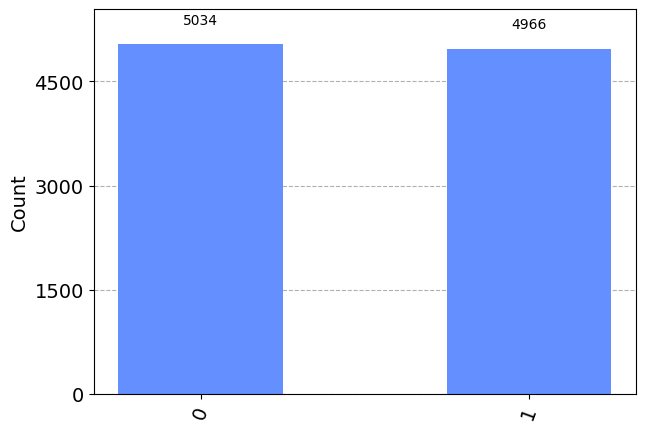

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.15
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8593749999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.009374999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

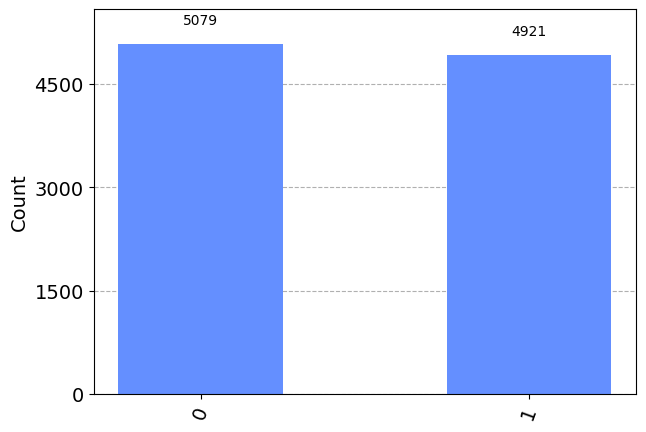

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.16
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.85, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.01, Circuit = 
     ┌────────────┐
q_0:

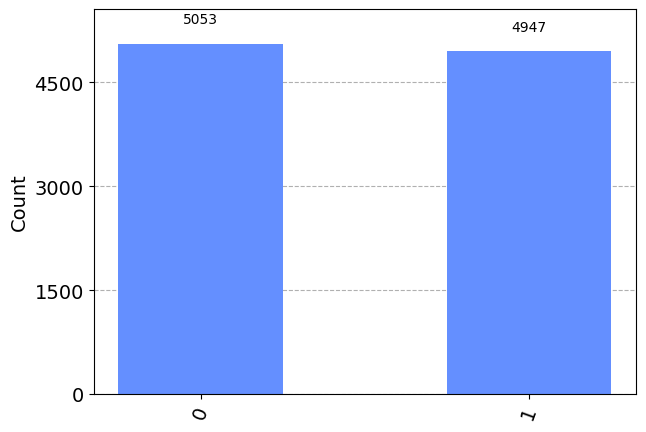

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.17
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8406250000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.010625000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

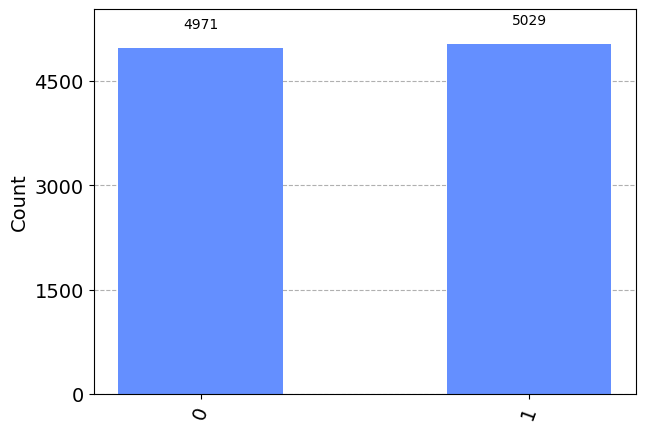

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.18
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8312500000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

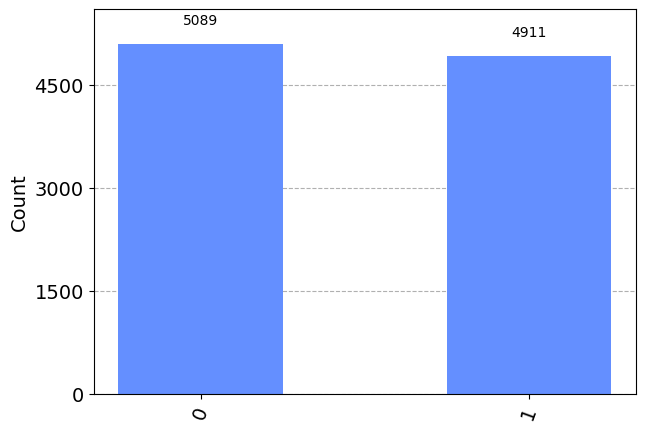

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.19
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8218750000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.011875000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

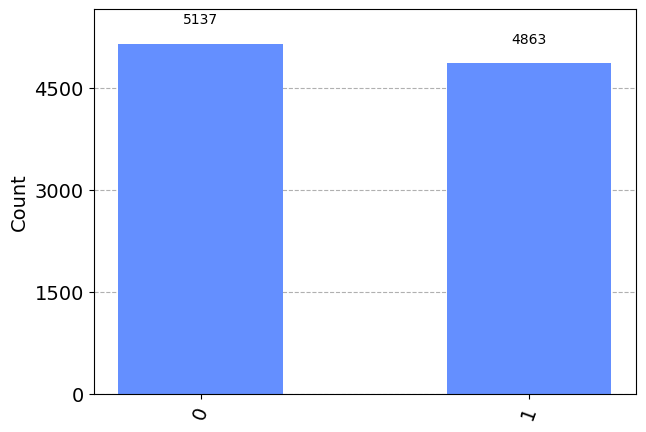

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.2
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8125000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_

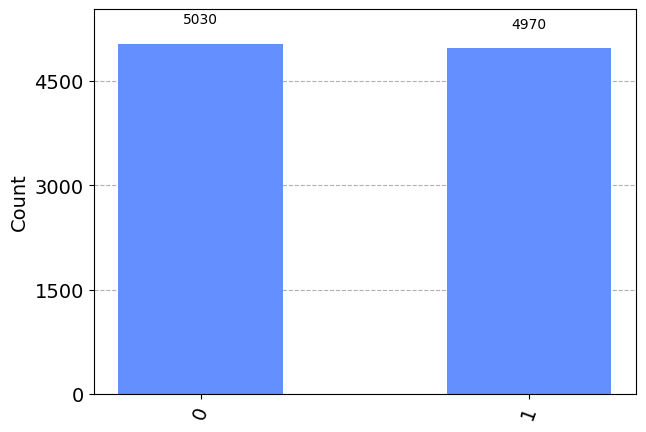

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.21
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.8031249999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.01312499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

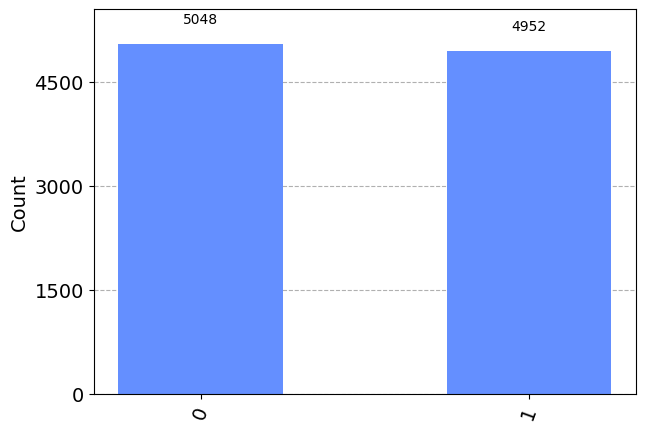

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.22
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7937499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.013749999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

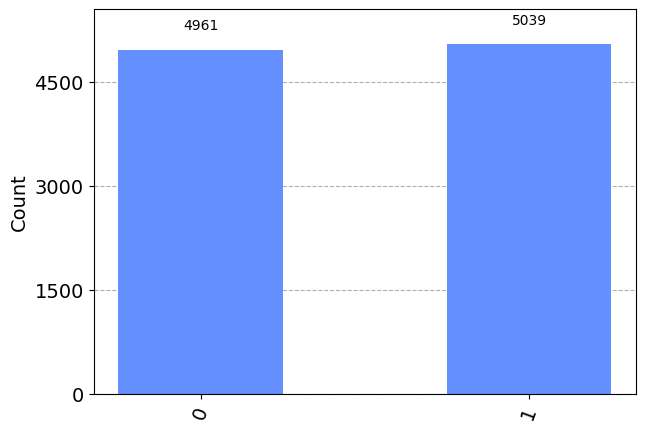

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.23
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7843749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014374999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

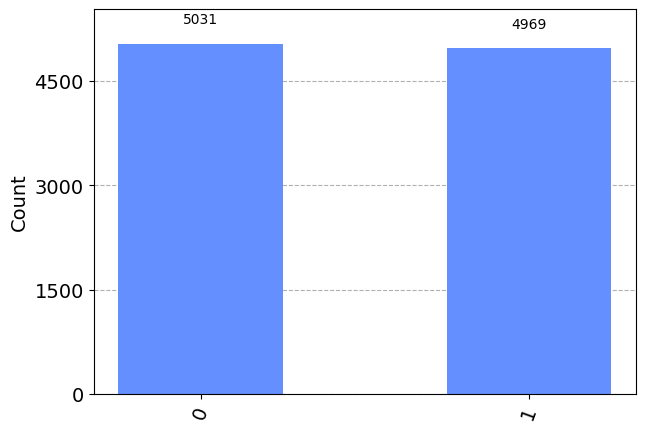

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.24
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7749999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.014999999999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

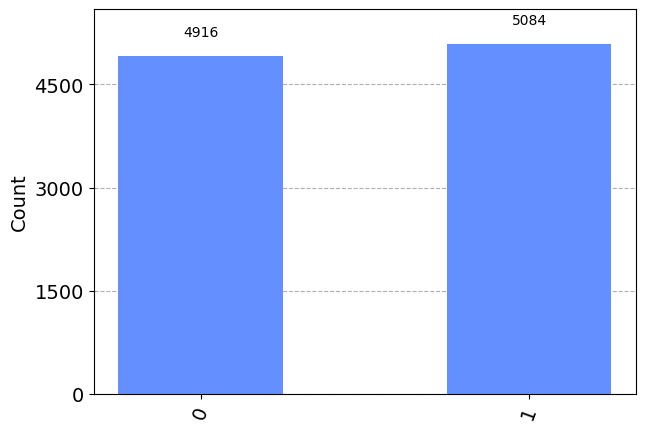

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.25
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.765625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.015625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.015625, Circuit

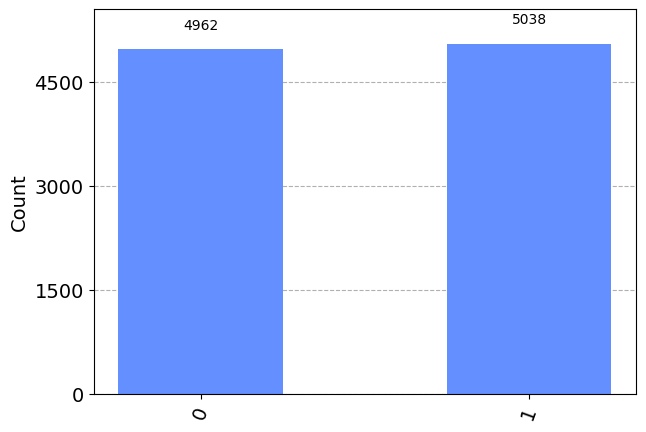

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.26
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7562500000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016250000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

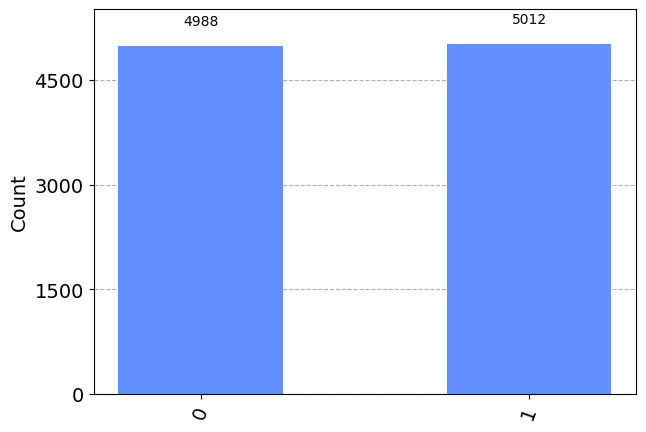

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.27
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7468750000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.016875000000000008, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

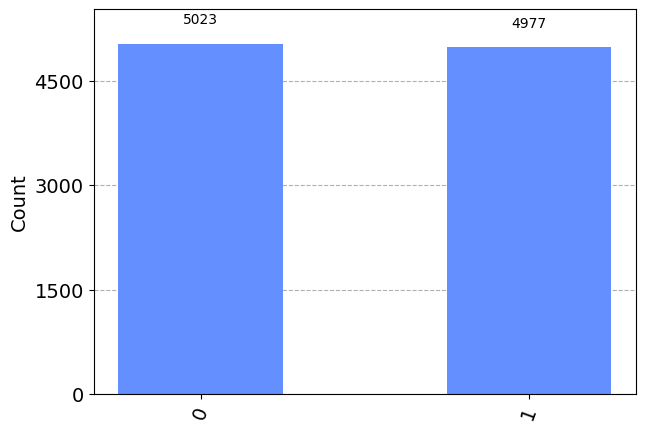

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.28
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7375000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.017500000000000012, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

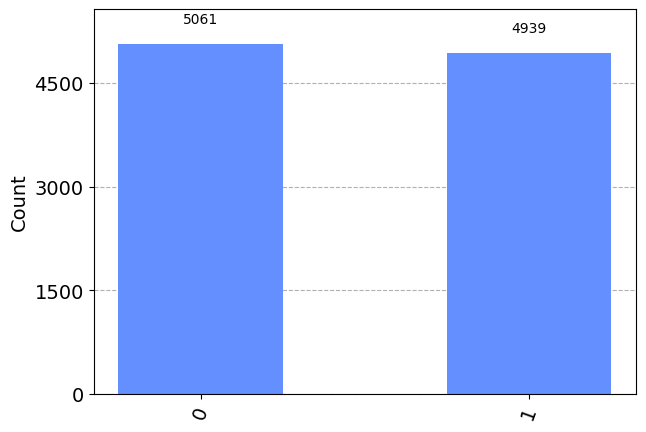

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.29
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7281250000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018125000000000013, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

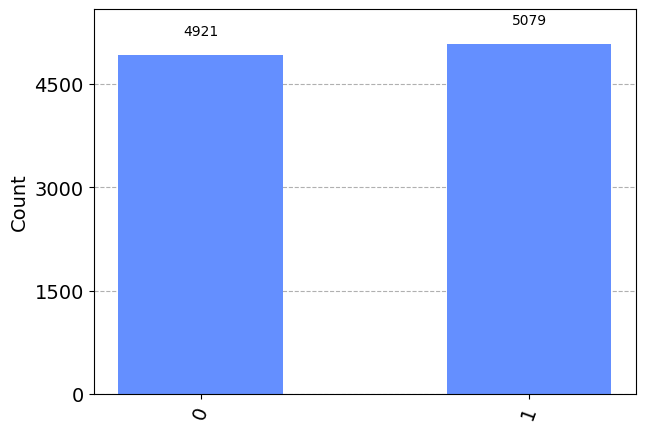

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.3
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7187499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.018749999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

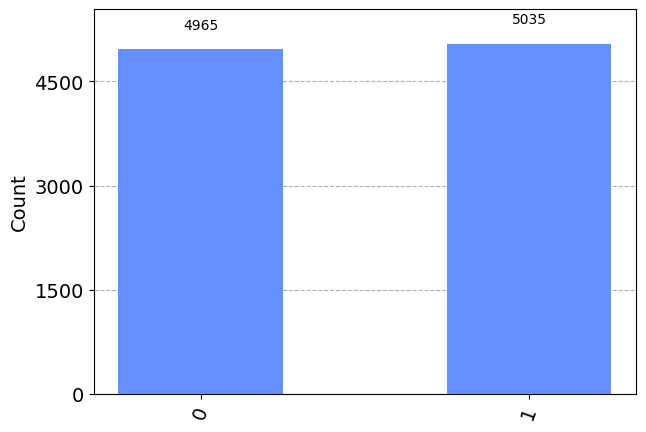

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.31
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.7093749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019374999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

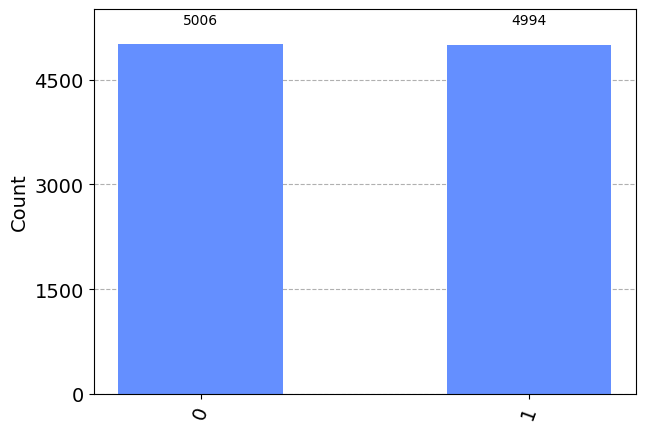

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.32
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6999999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.019999999999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

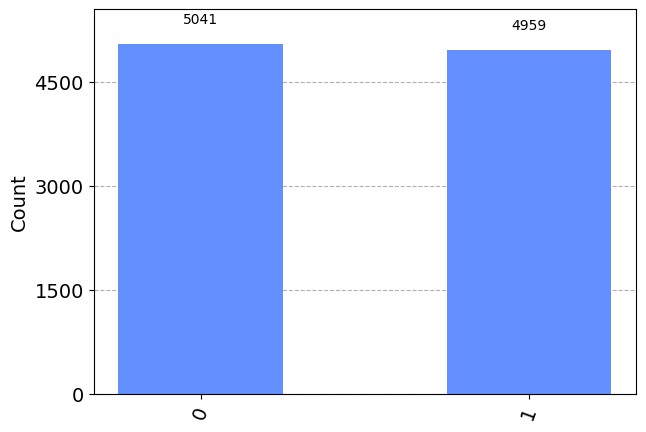

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.33
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.690625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.020625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.020625, Circuit

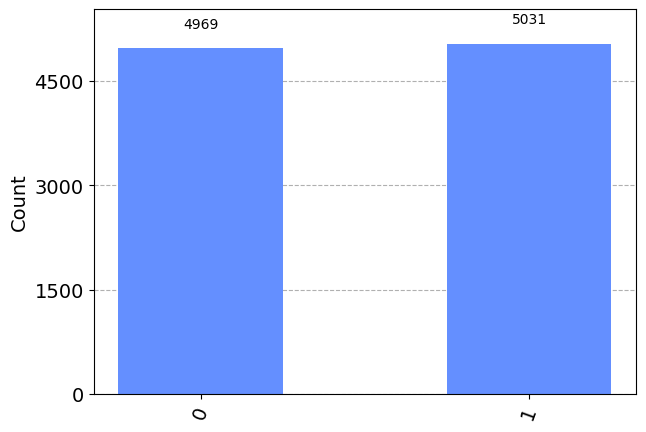

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.34
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.68125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021250000000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1

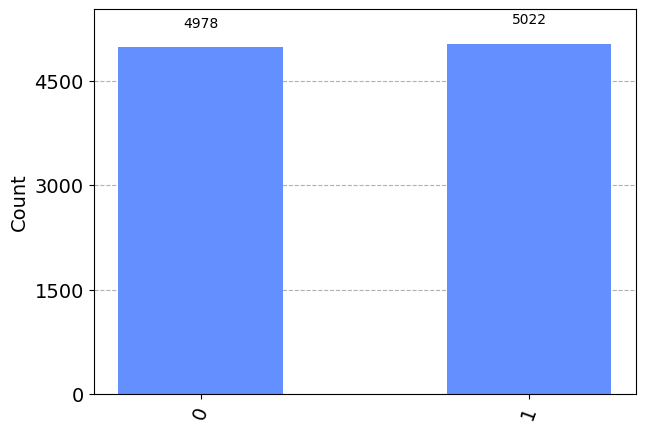

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.35
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6718750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.021875000000000006, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

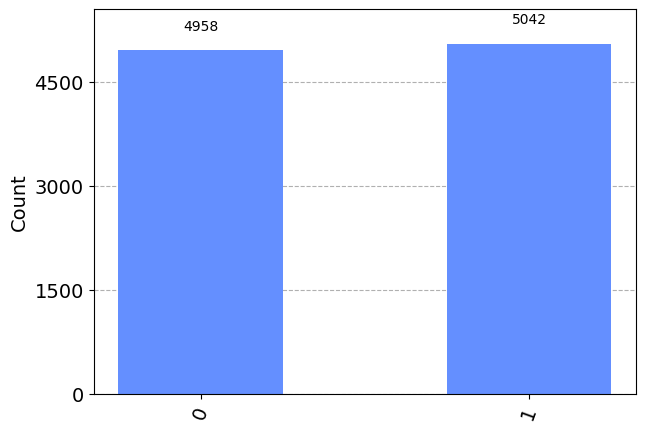

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.36
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6625000000000004, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02250000000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

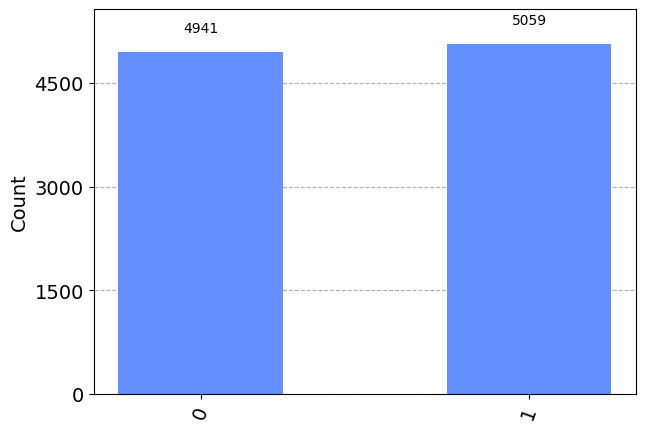

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.37
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6531250000000005, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023125000000000017, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

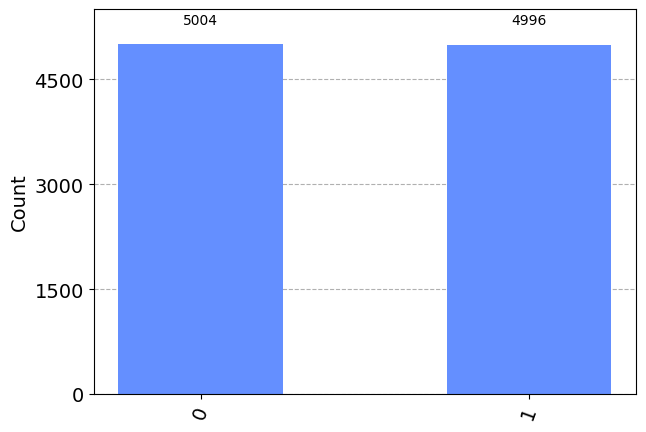

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.38
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6437499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.023749999999999983, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

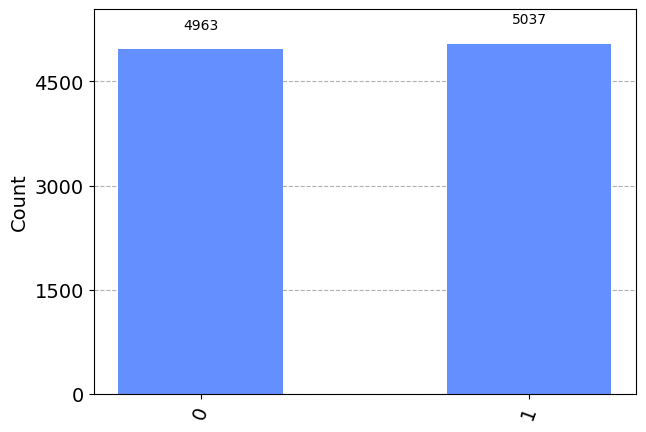

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.39
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6343749999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02437499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

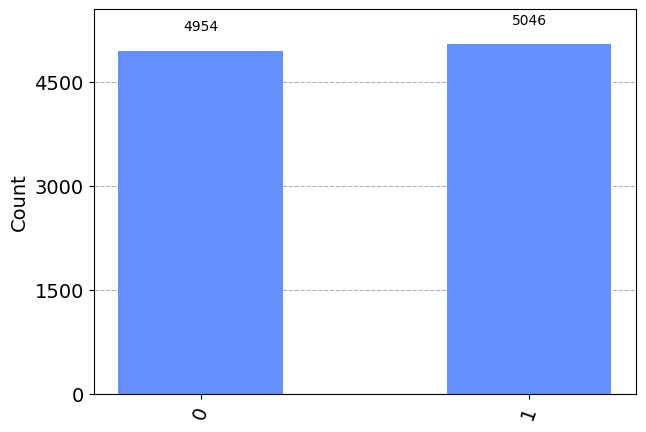

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.4
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6249999999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.024999999999999994, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX)

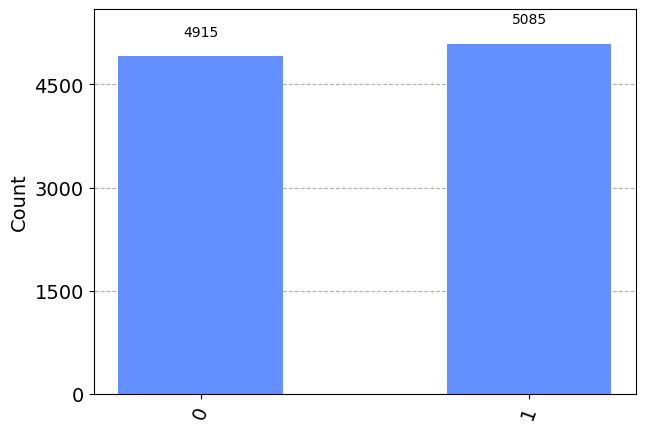

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.41
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.615625, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02562499999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1    

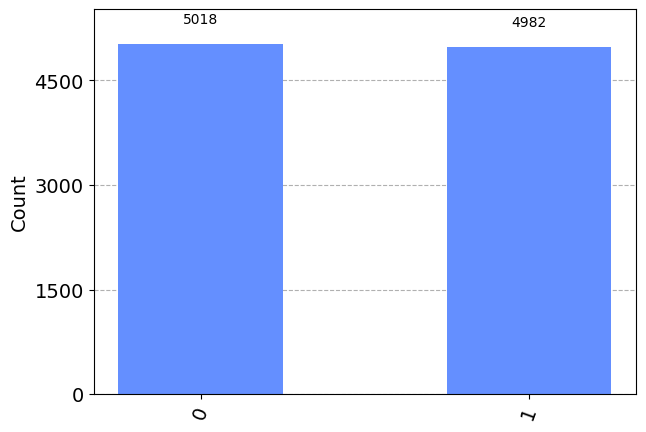

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.42
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.6062500000000001, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026250000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

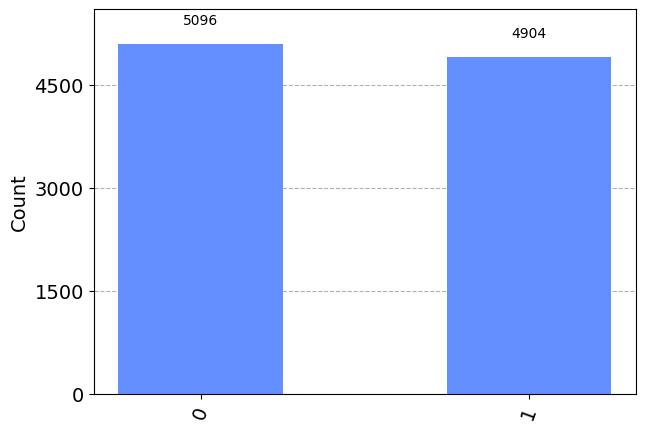

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.43
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5968750000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.026875000000000007, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

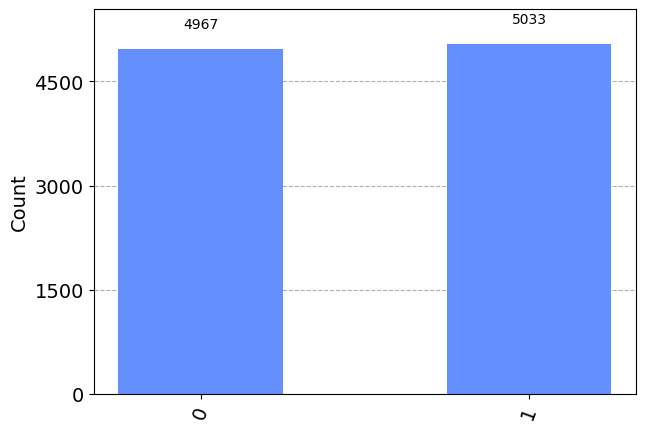

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.44
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5875000000000002, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.027500000000000014, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

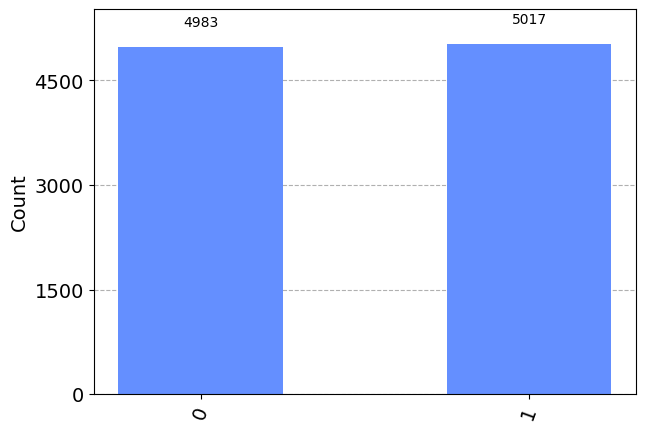

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.45
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5781250000000003, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.028125000000000018, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

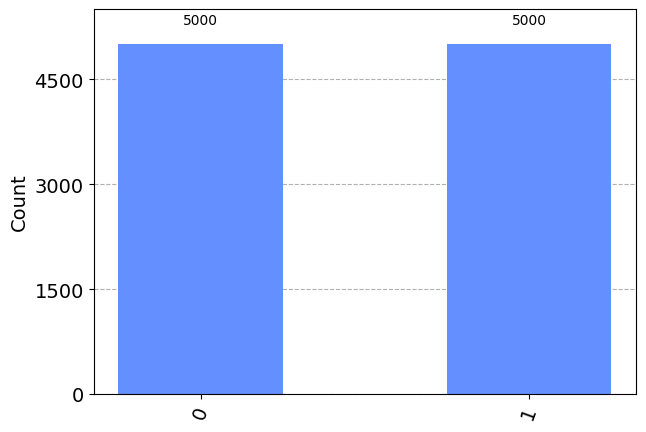

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.46
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5687499999999996, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.02874999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q

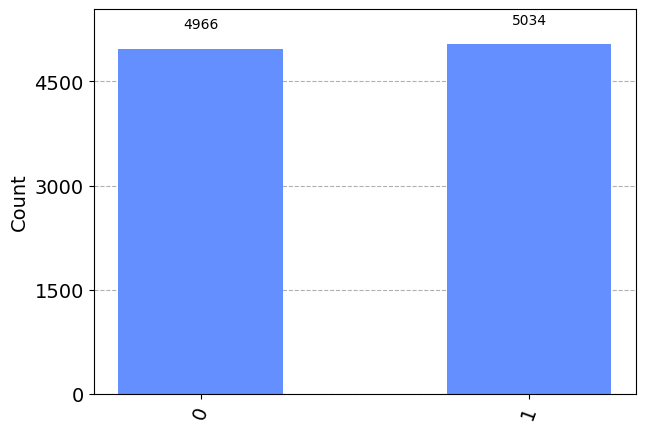

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.47
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5593749999999997, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029374999999999984, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

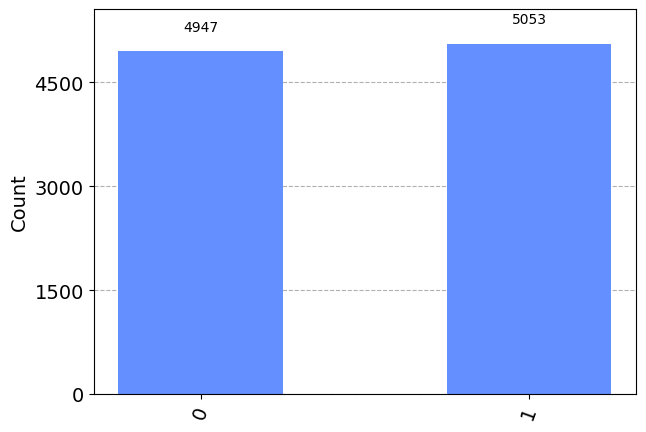

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.48
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5499999999999998, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.029999999999999985, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

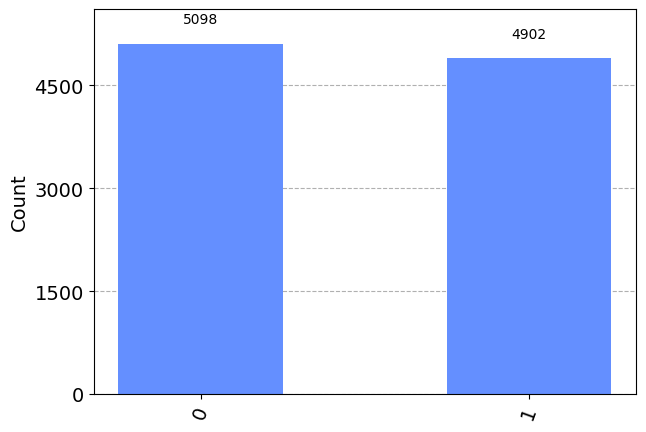

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.49
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.5406249999999999, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.030624999999999993, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX

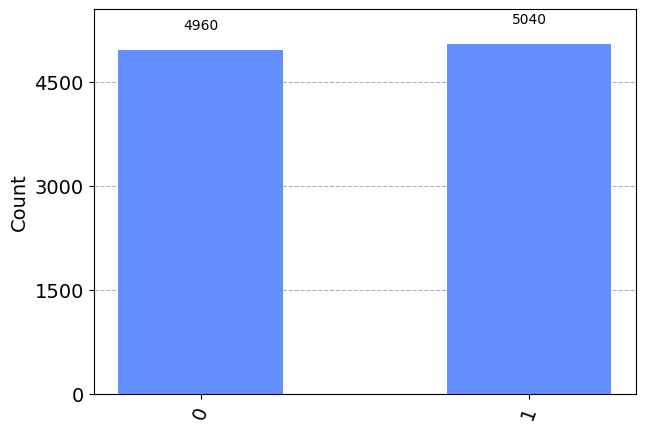

--------------------------------------------------------------------------------------------------------------
CURRENT DEPOLARIZATION ERROR RATE:  0.5
QuantumError on 2 qubits. Noise circuits:
  P(0) = 0.53125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(II) │
q_1: ┤1           ├
     └────────────┘
  P(1) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IX) │
q_1: ┤1           ├
     └────────────┘
  P(2) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IY) │
q_1: ┤1           ├
     └────────────┘
  P(3) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(IZ) │
q_1: ┤1           ├
     └────────────┘
  P(4) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XI) │
q_1: ┤1           ├
     └────────────┘
  P(5) = 0.03125, Circuit = 
     ┌────────────┐
q_0: ┤0           ├
     │  Pauli(XX) │
q_1: ┤1           ├
     └────────────┘
  P(6) = 0.03125, Circuit = 
    

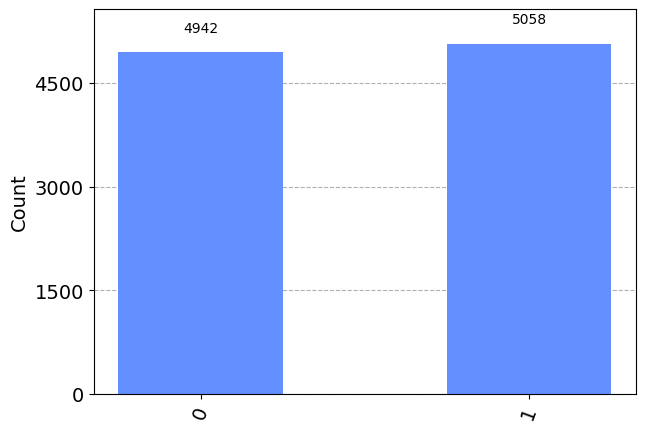

--------------------------------------------------------------------------------------------------------------


In [28]:
#Sixth experiment Swap Test
noise_model = NoiseModel()
noise_model = add_depolarization_error(noise_model,0,2,['cx'])

swap_test = get_swap_test(3,
                    [sqrt(0.01),sqrt(0.1),sqrt(0.12),sqrt(0.13),sqrt(0.04),sqrt(0),sqrt(0.35),sqrt(0.25)],
                    [0,sqrt(0.2),sqrt(0.2),sqrt(0.1),sqrt(0.2),sqrt(0.05),sqrt(0.05),sqrt(0.2)])

sim = AerSimulator(noise_model=noise_model)
swap_test_transpiled = transpile(swap_test, sim)

print('Sixth experiment Swap Test:')
display(swap_test.draw('mpl'))
print('Sixth experiment TRANSPILED Swap Test:')
display(swap_test_transpiled.draw('mpl'))

print('--------------------------------------------------------------------------------------------------------------')

results = []
for i in range(maxErrorRate):
    currentRate = i / 100
    print('CURRENT DEPOLARIZATION ERROR RATE: ',currentRate)
    
    noise_model = NoiseModel()
    noise_model = add_depolarization_error(noise_model,currentRate,2,['cx'])
    print(noise_model)

    #Running the circuit
    sim_noise = AerSimulator(noise_model=noise_model)
    circ_tnoise = transpile(swap_test, sim_noise)
    result_simulation = sim_noise.run(circ_tnoise,shots=shots).result()
    counts_simulation = result_simulation.get_counts(0)

    #Displaying results
    print('Sixth Experiment Counts:')
    display(plot_histogram(counts_simulation))
    results.append(counts_simulation)
    print('--------------------------------------------------------------------------------------------------------------')

In [29]:
#SIMILARITIES CALCULATIONS FOR EACH EXPERIMENT
successCounts6=[]
for i in results:
    count =  (i['0'] - i['1'])/100
    #if count < 0:
    #    count=0
    successCounts6.append(count) 
#print(results)
#print(successCounts6)

In [30]:
#NUMBER OF 1 AND 2 QUBIT GATES CALCULATION
ops=circ_tnoise.count_ops()
print(ops)

one_qubit_gates_count=ops['rz']+ops['sx']
two_qubits_gates_count=ops['cx']

one_qubit_gates_list.append(one_qubit_gates_count)
two_qubits_gates_list.append(two_qubits_gates_count)

OrderedDict([('rz', 62), ('cx', 36), ('sx', 35), ('measure', 1)])


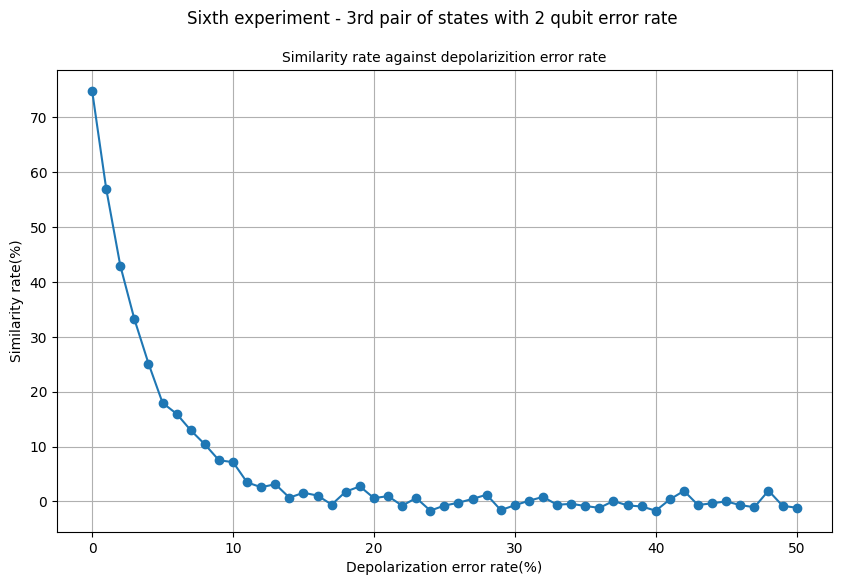

In [31]:
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts6
         , marker='o', linestyle='-')

# Tagging axis
plt.xlabel('Depolarization error rate(%)')
plt.ylabel('Similarity rate(%)')

# Plot title
plt.suptitle('Sixth experiment - 3rd pair of states with 2 qubit error rate')
plt.title('Similarity rate against depolarizition error rate',fontsize='medium')
# Showing plot
plt.grid(True)
plt.show()

##  5. Results Comparison

Now is time compare the results measured before in a same plot. This will show us the similarity rate against depolarization error rate correlation on the previous experiments. Apart from that, we are going to show some new parameters that could help through the analysis.

First of all, we are going to calculate the $\textbf{result relative error}$ for each simulation on each experiment. Its formula is

$|realvalue - observedvalue| \cdot 100 \div realvalue$ , where:

    -the result of the simulation without error is the real value.
    -the result of the simulations with the different error rates are the observed values.

After that, we are going to plot the amount of one qubit and two qubits gates that the transpiled circuit has per experiment. For the third comparison, we are going to calculate the $\textbf{maximum 'result relative error difference'}$ (called as $max-reldiff$ from now on) between experiments that use the same pair of states. That means, calculating the $max-reldiff$ between:

* $\textit{Experiments 1 and 2}$
* $\textit{Experiments 3 and 4}$
* $\textit{Experiments 5 and 6}$

The $max-reldiff$ parameter between two experiments is the biggest difference between result relative errors with the same error rate. Please notice that $\textbf{we are just using the abosolute difference, not the percentual difference}$. Its formula is is $|a - b|$, where $a,b$ are the two result relative errors to compare. $max-reldiff$ parameter is useful for comparing the point where one qubit and two qubits gates error simulations are as different as possible in term of result relative error. This will help us to conclude different aspects about how the different qubits gates error simulations affect the result of the circuit.

The final comparison will be the $\textbf{'result relative error difference' mean}$(called as $mean-reldiff$ from now on) between experiments that use the same pair of states. This value is calculated as the mean of all the differences of result relative errors with the same error rate.

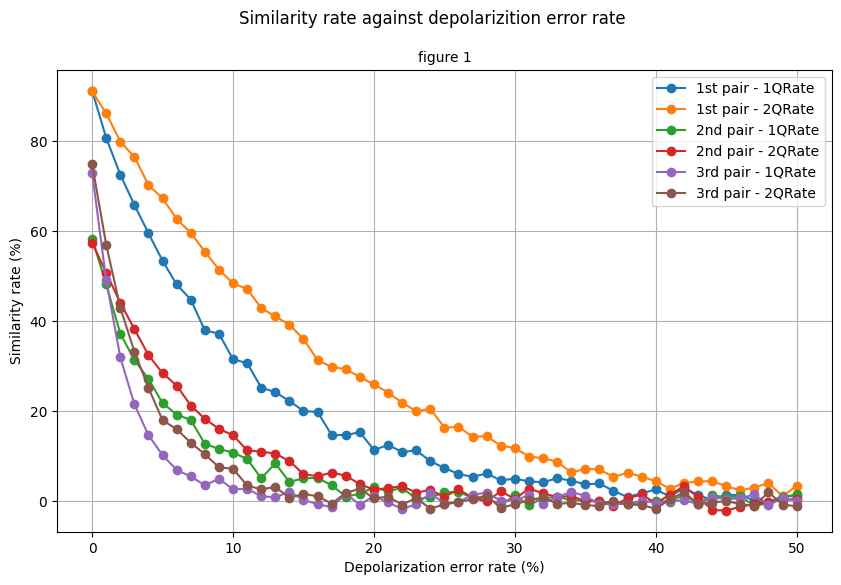

In [56]:
labels=['1st pair - 1QRate','1st pair - 2QRate',
        '2nd pair - 1QRate','2nd pair - 2QRate',
        '3rd pair - 1QRate','3rd pair - 2QRate']

#FIRST PLOT
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
plt.plot(range(maxErrorRate), successCounts1
     , marker='o', linestyle='-', label='1st pair - 1QRate')
plt.plot(range(maxErrorRate), successCounts2
     , marker='o', linestyle='-', label='1st pair - 2QRate')
plt.plot(range(maxErrorRate), successCounts3
     , marker='o', linestyle='-', label='2nd pair - 1QRate')
plt.plot(range(maxErrorRate), successCounts4
     , marker='o', linestyle='-', label='2nd pair - 2QRate')
plt.plot(range(maxErrorRate), successCounts5
     , marker='o', linestyle='-', label='3rd pair - 1QRate')
plt.plot(range(maxErrorRate), successCounts6
     , marker='o', linestyle='-', label='3rd pair - 2QRate')

# Tagging axis
plt.xlabel('Depolarization error rate (%)')
plt.ylabel('Similarity rate (%)')

# Plot title
plt.suptitle('Similarity rate against depolarizition error rate')
plt.title('figure 1',fontsize=10)
plt.legend()

# Showing plot
plt.grid(True)
plt.show()

In [32]:
#GETTING RESULT RELATIVE ERROR FOR EACH SIMULATION OF EACH EXPERIMENT

success_counts_list = [successCounts1,successCounts2,successCounts3,successCounts4,successCounts5,successCounts6]
relative_errors_list = []

#For each success_counts list, we will count their relative error rates.
for success_counts_elem in success_counts_list:
    #print(successCountsElem)
    
    #Create current relative_error list for each simulation of the current experiment.
    relative_errors = []
    
    #Get the real_value for the current experiment. This will be the value of the simulation without error.
    real_value = success_counts_elem[0]
    
    #For each simulation of the current experiment, we calculate the relative error
    for observed_value in success_counts_elem:
        #print(count)
        rel_err_calculated = (abs(real_value - observed_value) / real_value) * 100
        #print(rel_err_calculated)
        relative_errors.append(rel_err_calculated)
    
    #We append the relative error list of the current experiment
    relative_errors_list.append(relative_errors)

### 5.1.   Similarity rate and Result relative error

The first fact we observe is that the bigger the quantum states to compare, the bigger the slope of the respective result relative error function. In other words, quantum noise affects more the correctness of the result when talking about comparing big quantum states.

Another fact to observe is that, in the first and second experiments (1st pair with 1QRate and 2QRate respectively), the error rate in which the result relative error of both experiments start being almost equal is near the 40%. For the third and fourth experiments (2nd pair with 1QRate and 2QRate respectively), the same situation happens in an error rate near the 22%. For the last two experiments, the same situation happens in an error rate near the 12%. A conclusion for this analysis is that, the bigger the quantum states to compare, the earlier the time where one qubit gates error rate and two qubit gates error rate start having the same importance when incrementing the result relative error.

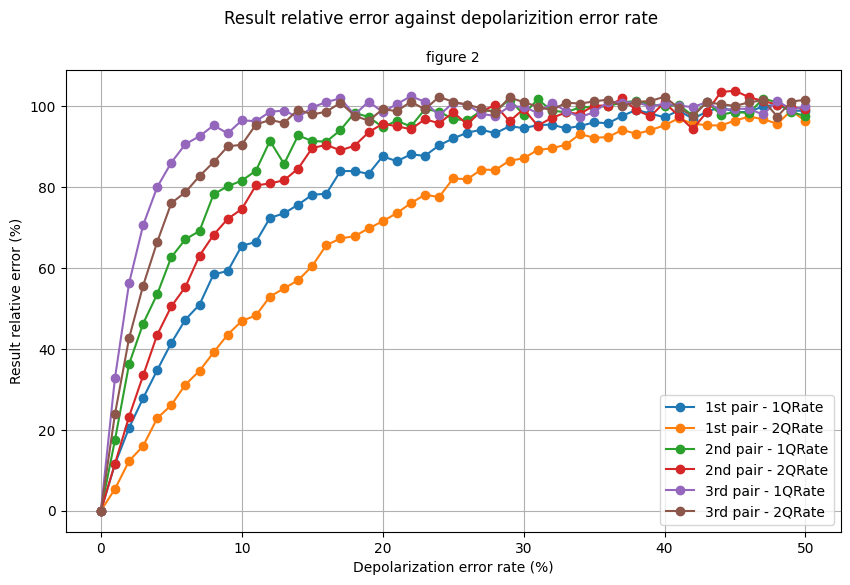

In [57]:
#SECOND PLOT
plt.figure(figsize=(10, 6))  # Adjust the values as needed

# Creating plot
for i in range(len(relative_errors_list)):
    plt.plot(range(maxErrorRate), relative_errors_list[i]
     , marker='o', linestyle='-', label=labels[i])

# Tagging axis
plt.xlabel('Depolarization error rate (%)')
plt.ylabel('Result relative error (%)')

# Plot title
plt.suptitle('Result relative error against depolarizition error rate')
plt.title('figure 2',fontsize=10)

plt.legend()

# Showing plot
plt.grid(True)
plt.show()

### 5.2.   Amount of gates

The other parameter that explains slope differences between experiments is the number of gates of the transpiled circuit. Although the quantum states size explain differences between, e.g., experiment 1 and 3 or experiment 2 and 4, the number of gates is also important when comparing experiments with the same states size. The above plot show that:

    -In the first experiment, the amount of one qubit gates is bigger than the amount of two qubits gates.
    -The difference between one qubit gates amount and two qubits gates amount keep increasing through experiments.

This explains why experiments with same states but with one qubit gates noise simulation ends having a bigger result relative error slope than their two qubits gates noise simulation counterpart.

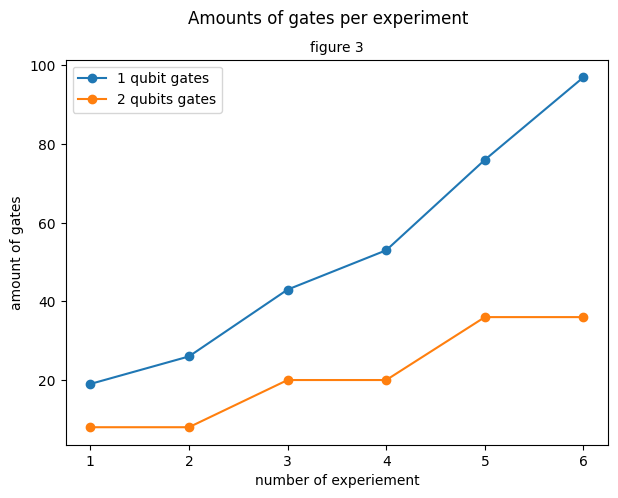

In [59]:
#THIRD PLOT
plt.figure(figsize=(7, 5))

# Creating plots
plt.plot(range(1,7), one_qubit_gates_list
     , marker='o', linestyle='-', label='1 qubit gates')
plt.plot(range(1,7), two_qubits_gates_list
     , marker='o', linestyle='-', label='2 qubits gates')

# Tagging axe
plt.xlabel("number of experiement")
plt.ylabel("amount of gates")
plt.suptitle("Amounts of gates per experiment")
plt.title('figure 3',fontsize=10)

plt.legend()

#Showwing plot
plt.show()

There is one relation that we are not going deep in this comparison, but would be interesting to analyze in future notebooks. The number of one qubit gates in experiment 1 is bigger in an amount of 10-15 compared to the amount of two qubits gates in experiment 2. On the other hand, The number of one qubit gates in experiment 3 is bigger in an amount of 20-25 compared to the amount of 2 qubits gates in experiment 4. This difference increase even more when comparing experiments 5 and 6. This means that the difference of the amount of gates where noise is applied keeps increasing through experiments with the same states size. But, if this happens, why the $mean-reldiff$ keeps decreasing? Under our analysis, while the transpiled circuit gets bigger, there should be more and more difference between one qubit gates and two qubits gates noise simulation, causing that the $mean-reldiff$ increase,not decrease.

For understanding better this question, we recommend you to keep reading the following comparisons, where we explain more about the $max-reldiff$ and $mean-reldiff$ parameters. After that, you can come back here to reread the question.

In [60]:
#GETTING THE MAX-RELDIFF AND MEAN-RELDIFF PARAMETERS BETWEEN EXPERIMENTS 1,2; 3,4; 5,6
max_reldiffs_list = []
mean_reldiffs_list = []

for i in range(0,len(relative_errors_list),2):
    first_list = relative_errors_list[i]
    second_list = relative_errors_list[i+1]
    
    current_max_reldiff = 0
    current_mean_reldiff = 0
    for j in range(1,len(first_list),1):
        possible_max_reldiff = ((abs(first_list[j] - second_list[j])))
        if (possible_max_reldiff > current_max_reldiff):
            current_max_reldiff = possible_max_reldiff
        
        current_mean_reldiff +=  abs(first_list[j] - second_list[j])
    #print('RESULT',current_reldiff)
    current_mean_reldiff = current_mean_reldiff / len(first_list)
    
    max_reldiffs_list.append(current_max_reldiff)
    mean_reldiffs_list.append(current_mean_reldiff)
    #print('-------------')

### 5.3.   max-reldiff and mean-reldiff parameters

The last fact to observe is relatated to the $max-reldiff$ and $mean-reldeff$ analysis. For this we will also use information from $\textit{figure 1}$, where it shows the similarity rate for an ideal simulation on each experiment. It can be seen that the less similar the states of the pair are between them (that means, measuring a smaller amount of 0s on the first simulation of an experiment), the smaller is their respective $max-reldiff$ parameter. While for the second pair (the two qubits pair of states) the maximum difference between simulating one qubit gates noise against two qubit gates noise is near 12.5%, for the first pair(the one qubit pair of states) that difference is near a 20%.

On the other hand, the correlation for the $mean-reldiff$ parameter is, again, with the size of the states to compare. The smaller the states to compare, the bigger the parameter calculated. This is consistent with the previous fact that explains correlation between the size of the compared states and where the result relative errors start beeing almost the same. We concluded that for bigger states, earlier the time where there is no difference between relative error for one qubit gates error simulation and two qubit gates error simulation. That means that for bigger states, the interval where there is a significant result relative error difference is smaller, resulting in a lower $mean-reldiff$.

To finish the comparisons, is important to notice that $max-reldiff$ and $mean-reldiff$ parameters are obtained comparing the experiments that use the same pair of states as input, so we were only able to obtain three $max-reldiff$ and $mean-reldiffs$ values. That means that all the analysis related to this values should be use carefully when going into conclussions, because the correlations observed can be just a coincidence. In future analysis, it would be convenient adding more pair of states to compare, so as to have a more reliable observation of this parameter.


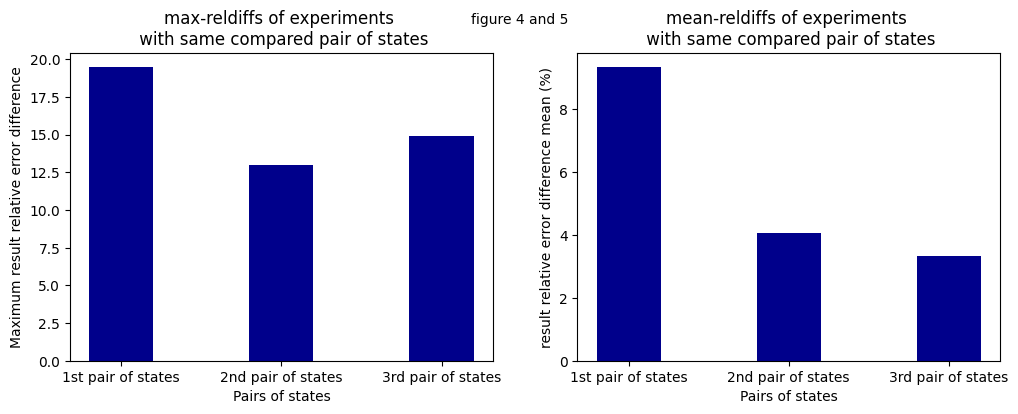

In [67]:
#THIRD COMPARISON AND FOURTH COMPARISON
fig,(plot3,plot4) = plt.subplots(1,2,figsize=(12, 4))  # Adjust the values as needed

# Creating plot3
pairs = ['1st pair of states','2nd pair of states','3rd pair of states']
plot3.bar(pairs, max_reldiffs_list, color ='darkblue',
        width = 0.4)
# Tagging axes flor plot3
plot3.set_xlabel("Pairs of states")
plot3.set_ylabel("Maximum result relative error difference")
plot3.set_title("max-reldiffs of experiments \n with same compared pair of states")
plt.suptitle('figure 4 and 5',fontsize=10)
# Creating plot4
plot4.bar(pairs, mean_reldiffs_list, color ='darkblue',
        width = 0.4)

# Tagging axes for plot4
plot4.set_xlabel("Pairs of states")
plot4.set_ylabel("result relative error difference mean (%)")
plot4.set_title("mean-reldiffs of experiments \n with same compared pair of states")

#Showwing plot
plt.show()

## 6.   Conclussions

Lastly, we will give some final conclussions about limiting factor of our experiments, and some possible solutions to experiment with in further notebooks.

We have found that the main factor that increase the result error in a swap gate circuit is the compared states size. Many negative conditions gets worse when the compared states size is bigger, such as

* the result relative error slope.
* the time where one qubit gates and two qubits gates error simulation start affecting the same to the result.

In the first case, this obviously negative because, for the same depolarization error rate, the result will be worst with bigger quantum states as inputs. In the second case is worse because is affect one of the possible error mitigation techniques that we could propose. This technique involves trying to keep the depolarization error rate in the sweet spot interval where the difference between one qubit gates and two qubits gates error simulation is maximize. In particular, the best error rate would be the one that verify the $max-reldiff$ parameter. Having that situation, one qubit gates errors will affect much more that two qubit gates error, so you could focus mitigating this first type of error (one qubit gates errors) and the result correctness will be maximizied. Compared to just focusing in this error in a error rate that doesn't belong to the sweet point, the correctness will be better. It's the same effort for having better results.

Also, seeing that smaller states have more accurate results than bigger ones, it would be interesting to trying this modification of the circuit:

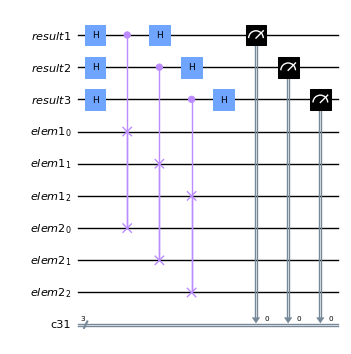

In [98]:
result= [QuantumRegister(1,'result1'),QuantumRegister(1,'result2'),QuantumRegister(1,'result3')]

elem1 = QuantumRegister(3,'elem1')
elem2=  QuantumRegister(3,'elem2')
cr = ClassicalRegister(3)

swap_test = QuantumCircuit(result[0],result[1],result[2],elem1,elem2,cr)
    
for i in range(3):
    swap_test.h(result[i])
    swap_test.cswap(result[i],elem1[i],elem2[i])
    swap_test.h(result[i])
    swap_test.measure(result[i],cr[0])
    
display(swap_test.draw('mpl',scale=0.5))


As you see, this compares a pair of three qubits states as in experiment 5 and 6, but with difference that there is three result qubits instead of one. What we are trying to do here is to emulate the swap test for one qubit quantum states (experiments 1 and 2). Instead of affecting a unique result qubit with the three similarity comparisons done during the circuit, we have one result qubit per comparison. This could aislate the error in different qubits,helping in dividing the total error that one reslt qubit receive into different results qubits.

If this modification works or not it's still unknown and will not be tried in this notebook, but we encouraged you to tried it and contact me so as share your results. 